In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import warnings
warnings.filterwarnings('ignore')
import plotly
plotly.io.orca.config.executable = 'Chart'
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [108]:
pd.set_option('display.max_colwidth', None)

In [109]:
df = pd.read_csv('dseb63_columns_description.csv', encoding='ISO-8859-1')

In [110]:
df

Unnamed: 0                         Table                    Row  \
0             1  application_{train|test}.csv             SK_ID_CURR   
1             2  application_{train|test}.csv                 TARGET   
2             5  application_{train|test}.csv     NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv            CODE_GENDER   
4             7  application_{train|test}.csv           FLAG_OWN_CAR   
..          ...                           ...                    ...   
214         217     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215         218     installments_payments.csv        DAYS_INSTALMENT   
216         219     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217         220     installments_payments.csv         AMT_INSTALMENT   
218         221     installments_payments.csv            AMT_PAYMENT   

                                                                                                                                                                                     Description  \
0                                                                                                                                                                       ID of loan in our sample   
1    Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                    Identification if loan is cash or revolving   
3                                                                                                                                                                           Gender of the client   
4                                                                                                                                                                  Flag if the client owns a car   
..                                                                                                                                                                                           ...   
214                                                                                                                                                      On which installment we observe payment   
215                                                                               When the installment of previous credit was supposed to be paid (relative to application date of current loan)   
216                                                                                    When was the installments of previous credit paid actually (relative to application date of current loan)   
217                                                                                                            What was the prescribed installment amount of previous credit on this installment   
218                                                                                                                         What the client actually paid on previous credit on this installment   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 5 columns]

In [111]:
df['Table'].unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [112]:
application_train = pd.read_csv('dseb63_application_train.csv')

In [113]:
application_test = pd.read_csv('dseb63_application_test.csv')

In [114]:
bureau = pd.read_csv('dseb63_bureau.csv')

In [115]:
bureau_balance = pd.read_csv('dseb63_bureau_balance.csv')

In [116]:
credit_card_balence = pd.read_csv('dseb63_credit_card_balance.csv')

In [117]:
installments_payments = pd.read_csv('dseb63_installments_payments.csv')

In [118]:
POS_CASH_balance = pd.read_csv('dseb63_POS_CASH_balance.csv')

In [119]:
previous_application = pd.read_csv('dseb63_previous_application.csv')

# A.FUNCTION


a. Function to create a dataframe of percentage of NaN values for each column of the dataframe

In [120]:
def nan_df_create(data):

    nan_percentages = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})

    df.sort_values(by = 'percent', ascending = False, inplace = True)
    
    return df

b. Function to plot Bar Plots of NaN percentages for each Column with missing values 

In [121]:
def plot_nan_percent(df_nan, title_name, tight_layout = True, figsize = (20,8), grid = False, rotation = 90):
    # Lọc các cột không có giá trị NaN
    columns_no_nan = df_nan[df_nan['percent'] == 0]['column'].tolist()
    
    if len(columns_no_nan) > 0:
        print(f"Columns with no NaN values: {', '.join(columns_no_nan)}")
    else:
        print("There are no columns without NaN values.")
    
    # Kiểm tra và hiển thị nếu có các cột chứa NaN
    if df_nan.percent.sum() != 0:
        print(f"Number of columns having NaN values: {df_nan[df_nan['percent'] != 0].shape[0]} columns")

        plt.figure(figsize=figsize, tight_layout=tight_layout)
        sns.barplot(x='column', y='percent', data=df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation=rotation)
        plt.xlabel('Column Name')
        plt.ylabel('Percentage of NaN values')
        plt.title(f'Percentage of NaN values in {title_name}')
        if grid:
            plt.grid()
        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")

c. Class to plot heatmap of Correlation Matrix and print Top Correlated Features with Target


In [122]:
class correlation_matrix:
    
    def __init__(self, data, columns_to_drop, figsize = (25,23), mask_upper = True, tight_layout = True, 
                  linewidth = 0.1, fontsize = 10, cmap = 'Blues'):  
      
        self.data = data
        self.columns_to_drop = columns_to_drop
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.tight_layout = tight_layout
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap 

    def plot_correlation_matrix(self):
        
        print('-' * 100)
        #building the correlation dataframe
        self.corr_data = self.data.drop(self.columns_to_drop + ['TARGET'], axis = 1).corr()

        if self.mask_upper:
            #masking the heatmap to show only lower triangle. This is to save the RAM.
            mask_array = np.ones(self.corr_data.shape)
            mask_array = np.triu(mask_array)
        else:
            mask_array = np.zeros(self.corr_data.shape)

        plt.figure(figsize = self.figsize, tight_layout = self.tight_layout)
        sns.heatmap(self.corr_data, annot = False, mask = mask_array, linewidth = self.linewidth, cmap = self.cmap)
        plt.xticks(rotation = 90, fontsize = self.fontsize)
        plt.yticks(fontsize = self.fontsize)
        plt.title("Correlation Heatmap for Numerical features")
        plt.show()
        print("-"*100)
    
    def target_top_corr(self, target_top_columns = 10):
        
        phik_target_arr = np.zeros(self.corr_data.shape[1])
        #calculating the Phik-Correlation with Target
        for index, column in enumerate(self.corr_data.columns):
            phik_target_arr[index] = self.data[['TARGET', column]].phik_matrix().iloc[0,1]
        #getting the top correlated columns and their values
        top_corr_target_df = pd.DataFrame({'Column Name': self.corr_data.columns, 'Phik-Correlation' : phik_target_arr})
        top_corr_target_df = top_corr_target_df.sort_values(by = 'Phik-Correlation', ascending = False)
        
        return top_corr_target_df.iloc[:target_top_columns]    

d. Function to Phi_k matrix for categorical features

In [123]:
def plot_phik_matrix(data, categorical_columns, figsize = (20,20), mask_upper = True, tight_layout = True, linewidth = 0.1, fontsize = 10, cmap = 'Blues', show_target_top_corr = True, target_top_columns = 30):
    
    
    #first fetching only the categorical features
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()
    
    print('-'*100)
    
    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)
        
    plt.figure(figsize = figsize, tight_layout = tight_layout)
    sns.heatmap(phik_matrix, annot = False, mask = mask_array, linewidth = linewidth, cmap = cmap)
    plt.xticks(rotation = 90, fontsize = fontsize)
    plt.yticks(rotation = 0, fontsize = fontsize)
    plt.title("Phi-K Correlation Heatmap for Categorical Features")
    plt.show()
    print("-"*100)

    if show_target_top_corr:
        #Seeing the top columns with highest correlation with the target variable in application_train
        print("Categories with highest values of Phi-K Correlation value with Target Variable are:")
        phik_df = pd.DataFrame({'Column Name' : phik_matrix.TARGET.index[1:], 'Phik-Correlation' : phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by = 'Phik-Correlation', ascending = False)
        display(phik_df.head(target_top_columns))
        print("-"*100) 

e. Function to plot Categorical Variables Bar Plots

In [124]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
    plt.show()

f. Function to plot categorical variables Pie Plots

In [125]:
def plot_categorical_variables_pie_and_bar(data, column_name, plot_defaulter=True, hole=0):
    # Subplot configuration
    cols = 2 if plot_defaulter else 1
    specs = [[{'type': 'domain'}, {'type': 'bar'}]]  # Pie chart on the left, bar chart on the right
    titles = [f'Distribution of {column_name} for all Targets']
    if plot_defaulter:
        titles.append(f'Contribution to Defaulters by {column_name}')
    
    fig = make_subplots(rows=1, cols=cols, specs=specs, subplot_titles=titles)
    
    # Plot 1: Distribution of all categories (Pie chart)
    values_categorical = data[column_name].value_counts()
    labels_categorical = values_categorical.index
    fig.add_trace(
        go.Pie(
            values=values_categorical, 
            labels=labels_categorical, 
            hole=hole, 
            textinfo='label+percent', 
            textposition='inside'
        ), 
        row=1, col=1
    )
    
    if plot_defaulter:
        # Calculate defaulter ratio for each category in column_name
        defaulters_per_category = data[data.TARGET == 1][column_name].value_counts()
        total_per_category = data[column_name].value_counts()
        
        # Calculate the defaulter percentage for each category
        defaulter_percentage = (defaulters_per_category / total_per_category * 100).fillna(0).round(2)
        
        # Convert to DataFrame for easier manipulation
        defaulter_df = defaulter_percentage.reset_index()
        defaulter_df.columns = [column_name, 'Defaulter Percentage (%)']
        
        # Plot 2: Defaulter Percentage by category (Bar Chart)
        fig.add_trace(
            go.Bar(
                x=defaulter_df[column_name].astype(str), 
                y=defaulter_df['Defaulter Percentage (%)'], 
                marker=dict(color='orange'),
                text=defaulter_df['Defaulter Percentage (%)'].apply(lambda x: f'{x}%'),
                textposition='auto'
            ),
            row=1, col=2
        )
    
    # Update layout
    fig.update_layout(title=f'Distribution of {column_name}')
    fig.show()

g. Function to print the basic stats such as unique categories and their counts for categorical variables

In [126]:
def print_unique_categories(data, column_name, show_counts = False):
    
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)

h. Function to plot CDF of a continuour variable

In [127]:
def plot_cdf(data, column_name, log_scale = False, figsize = (12,8)):
    
        
    percentile_values = data[[column_name]].dropna().sort_values(by = column_name)
    percentile_values['Percentile'] = [ele / (len(percentile_values) - 1) for ele in range(len(percentile_values))]

    plt.figure(figsize = figsize)
    if log_scale:
        plt.xscale('log')
        plt.xlabel(column_name + ' - (log-scale)')
    else:
        plt.xlabel(column_name)
    plt.plot(percentile_values[column_name], percentile_values['Percentile'], color = 'red')
    plt.ylabel('Probability')
    plt.title('CDF of {}'.format(column_name))
    plt.show()

i. Function to print percentile values for given column

In [128]:
def print_percentiles(data, column_name, percentiles = None):
    
    
    print('-'*100)
    if not percentiles:
        percentiles = list(range(0,80,25)) + list(range(90,101,2))
    for i in percentiles:
        print(f'The {i}th percentile value of {column_name} is {np.percentile(data[column_name].dropna(), i)}')
    print("-"*100)

k. Function to plot continuous variables distribution

In [129]:
def plot_continuous_variables(data, column_name, plots = ['distplot', 'CDF', 'box', 'violin'], scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):
   

    data_to_plot = data.copy()
    if scale_limits:
        #taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        
        if ele == 'CDF':
            #making the percentile DataFrame for both positive and negative Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            
            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color = 'red', label = 'Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color = 'black', label = 'Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probability')
            plt.title('CDF of {}'.format(column_name))
            plt.legend(fontsize = 'medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')
            
        if ele == 'distplot':  
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'violin':  
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

# B. EDA

 ## I. Application train and test

### 1. STAT

In [130]:
print('-'*100)
print(f'The shape of application_train.csv is: {application_train.shape}')
print('-'*100)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*100)
display(application_train.head())

----------------------------------------------------------------------------------------------------
The shape of application_train.csv is: (246009, 123)
----------------------------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
----------------------------------------------------------------------------------------------------


Unnamed: 0  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0       0         Cash loans           F            N   
1           1       0         Cash loans           F            N   
2           2       0         Cash loans           M            N   
3           3       0         Cash loans           M            N   
4           4       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               N             0          270000.0   1293502.5      35698.5   
1               Y             0          135000.0    312682.5      29686.5   
2               Y             0          121500.0    513000.0      21865.5   
3               Y             0           99000.0    490495.5      27517.5   
4               Y             0          360000.0   1530000.0      42075.0   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        NaN                       NaN   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        NaN                        NaN   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_CURR  
0                        0.0                         0.0      278621  
1                        NaN                         NaN      139008  
2                        0.0                         0.0      138348  
3                        1.0                         1.0       64140  
4                        0.0                         0.0      219374  

[5 rows x 123 columns]

In [131]:
application_train.describe()

Unnamed: 0         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  246009.000000  246009.000000  246009.000000      2.460090e+05   
mean   123004.000000       0.080794       0.416229      1.684589e+05   
std     71016.825524       0.272519       0.720664      1.045297e+05   
min         0.000000       0.000000       0.000000      2.565000e+04   
25%     61502.000000       0.000000       0.000000      1.125000e+05   
50%    123004.000000       0.000000       0.000000      1.462500e+05   
75%    184506.000000       0.000000       1.000000      2.025000e+05   
max    246008.000000       1.000000      19.000000      1.350000e+07   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.460090e+05  245999.000000     2.457850e+05   
mean   5.996410e+05   27120.238129     5.389827e+05   
std    4.030980e+05   14510.634712     3.700520e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16506.000000     2.385000e+05   
50%    5.147775e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34654.500000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               246009.000000  246009.000000  246009.000000  ...   
mean                     0.020855  -16038.946343   63852.612441  ...   
std                      0.013818    4361.265483  141306.376949  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2758.000000  ...   
50%                      0.018850  -15755.000000   -1212.000000  ...   
75%                      0.028663  -12418.000000    -288.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     246009.000000     246009.000000     246009.000000   
mean           0.000581          0.000496          0.000309   
std            0.024103          0.022264          0.017574   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               212798.000000              212798.000000   
mean                     0.006480                   0.006729   
std                      0.084239                   0.106693   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      3.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               212798.000000              212798.000000   
mean                     0.034211                   0.266647   
std                      0.204336                   0.911957   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR     SK_ID_CURR  
count              212798.000000               212798.000000  246009.000000  
mean                    0.266920                    1.901127  153580.509542  
std                     0.834132                    1.870269   88764.127645  
min                     0.000000                    0.000000       0.000000  
25%                     0.000000                    0.000000   76772.000000  
50%                     0.

In [132]:
print('-'*100)
print(f'The shape of application_test.csv is: {application_test.shape}')
print('-'*100)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)
display(application_test.head())

----------------------------------------------------------------------------------------------------
The shape of application_test.csv is: (61502, 122)
----------------------------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
----------------------------------------------------------------------------------------------------


Unnamed: 0 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           0         Cash loans           M            Y               N   
1           1         Cash loans           F            Y               Y   
2           2         Cash loans           F            Y               N   
3           3         Cash loans           F            N               Y   
4           4         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             2          207000.0    465457.5      52641.0         418500.0   
1             0          247500.0   1281712.5      48946.5        1179000.0   
2             0          202500.0    495000.0      39109.5         495000.0   
3             0          247500.0    254700.0      24939.0         225000.0   
4             0          112500.0    308133.0      15862.5         234000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0   
1  ...                0                0                0   
2  ...                0                0                0   
3  ...                0                0                0   
4  ...                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        1.0   
2                         0.0                        1.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_CURR  
0                        0.0                         1.0       83659  
1                        0.0                         3.0      174814  
2                        0.0                         3.0      179486  
3                        0.0                         0.0       57038  
4                        0.0                         4.0       25672  

[5 rows x 122 columns]

In [133]:
application_test.describe()

Unnamed: 0  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  61502.000000  61502.000000      6.150200e+04  6.150200e+04   
mean   30750.500000      0.420344      1.701541e+05  5.965660e+05   
std    17754.242465      0.727919      4.872706e+05  4.000463e+05   
min        0.000000      0.000000      2.610000e+04  4.500000e+04   
25%    15375.250000      0.000000      1.125000e+05  2.700000e+05   
50%    30750.500000      0.000000      1.485000e+05  5.099220e+05   
75%    46125.750000      1.000000      2.025000e+05  8.086500e+05   
max    61501.000000     12.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   61500.000000     6.144800e+04                61502.000000   
mean    27061.917220     5.360502e+05                    0.020921   
std     14425.973334     3.670081e+05                    0.013884   
min      1980.000000     4.500000e+04                    0.000290   
25%     16582.500000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34465.500000     6.795000e+05                    0.028663   
max    230161.500000     4.050000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_19  \
count  61502.000000   61502.000000       61502.000000  ...      61502.000000   
mean  -16029.189929   63664.779145       -4989.712660  ...          0.000650   
std     4374.891140  141154.306001        3528.886091  ...          0.025495   
min   -25201.000000  -17522.000000      -24672.000000  ...          0.000000   
25%   -19680.000000   -2768.000000       -7467.000000  ...          0.000000   
50%   -15730.000000   -1218.000000       -4501.000000  ...          0.000000   
75%   -12395.000000    -292.000000       -2023.000000  ...          0.000000   
max    -7673.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count      61502.000000      61502.000000                53194.000000   
mean           0.000553          0.000439                    0.006091   
std            0.023506          0.020948                    0.082270   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count               53194.000000                53194.000000   
mean                    0.008084                    0.034966   
std                     0.125704                    0.206076   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     8.000000                    6.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count               53194.000000               53194.000000   
mean                    0.270388                   0.259691   
std                     0.932013                   0.607831   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    22.000000                   8.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR     SK_ID_CURR  
count                53194.000000   61502.000000  
mean                     1.895364  154452.964668  
std                      1.865405   88795.395500  
min                      0.000000    

### Tổng quan và Phân tích Bảng Dữ liệu

#### a. Tổng quan về bảng
- **Số cột:** 106 cột.
- **Số bản ghi:** 61,502 bản ghi.

---

#### b. Các đặc điểm quan trọng
##### CNT_CHILDREN (Số lượng con cái của khách hàng)
- **Mean (Trung bình):** 0.42 → Phần lớn khách hàng có dưới 1 con.
- **Max (Giá trị lớn nhất):** 12 → Có khách hàng báo cáo có đến 12 con, nhưng cần kiểm tra thêm để xác định đây có phải dữ liệu bất thường hay không.

##### AMT_INCOME_TOTAL (Tổng thu nhập hàng năm của khách hàng)
- **Mean (Trung bình):** 170,154 → Thu nhập trung bình của khách hàng là khoảng 170 triệu VNĐ.
- **Max (Giá trị lớn nhất):** 117 triệu USD (~ hơn 2.7 nghìn tỷ VNĐ), giá trị này không hợp lý và có thể là outlier (giá trị ngoại lai).
- **Min (Giá trị nhỏ nhất):** 26,100 → Thu nhập thấp nhất.

##### AMT_CREDIT (Số tiền vay)
- **Mean (Trung bình):** 596,566 → Số tiền vay trung bình là gần 600 triệu VNĐ.
- **Max:** 4,050,000 (4 tỷ đồng) → Số tiền vay lớn nhất.

##### DAYS_BIRTH (Tuổi khách hàng)
- **Mean (Trung bình):** -16,029 (~ 44 tuổi).
- **Min (Giá trị nhỏ nhất):** -7,673 (~ 21 tuổi).
- **Max (Giá trị lớn nhất):** -25,201 (~ 69 tuổi).

##### DAYS_EMPLOYED (Số ngày làm việc)
- **Mean (Trung bình):** 63,665 (~ 174 năm, không hợp lý).
- **Max:** 365,243 (~ 1,000 năm), đây rõ ràng là outlier.

##### REGION_POPULATION_RELATIVE (Tỷ lệ dân cư trong vùng)
- **Mean (Trung bình):** 0.0209 (~2% dân số của quốc gia).
- **Max (Giá trị lớn nhất):** 0.0725 → Có khách hàng sống trong khu vực dân cư đông nhất.

---

#### c. Một số điểm bất thường cần lưu ý
- **CNT_CHILDREN (12 con):** Có thể là giá trị ngoại lai hoặc lỗi nhập liệu.
- **AMT_INCOME_TOTAL (117 triệu USD):** Giá trị không hợp lý, có thể là giá trị ngoại lai.
- **DAYS_EMPLOYED (365,243 ngày):** Giá trị không thực tế, cần kiểm tra hoặc loại bỏ khỏi phân tích.


### 2. NaN Columns and Percentages

Columns with no NaN values: FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_11, FLAG_DOCUMENT_10, FLAG_DOCUMENT_14, FLAG_DOCUMENT_9, FLAG_DOCUMENT_15, FLAG_DOCUMENT_5, FLAG_DOCUMENT_8, FLAG_DOCUMENT_7, FLAG_DOCUMENT_6, FLAG_DOCUMENT_19, FLAG_DOCUMENT_21, FLAG_DOCUMENT_4, FLAG_DOCUMENT_3, FLAG_DOCUMENT_2, FLAG_DOCUMENT_17, FLAG_DOCUMENT_20, FLAG_DOCUMENT_18, FLAG_DOCUMENT_16, Unnamed: 0, TARGET, NAME_INCOME_TYPE, DAYS_EMPLOYED, DAYS_BIRTH, REGION_POPULATION_RELATIVE, NAME_HOUSING_TYPE, NAME_FAMILY_STATUS, NAME_EDUCATION_TYPE, AMT_CREDIT, DAYS_ID_PUBLISH, AMT_INCOME_TOTAL, CNT_CHILDREN, FLAG_OWN_REALTY, FLAG_OWN_CAR, CODE_GENDER, NAME_CONTRACT_TYPE, DAYS_REGISTRATION, FLAG_MOBIL, ORGANIZATION_TYPE, HOUR_APPR_PROCESS_START, LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY, REG_CITY_NOT_LIVE_CITY, LIVE_REGION_NOT_WORK_REGION, REG_REGION_NOT_WORK_REGION, REG_REGION_NOT_LIVE_REGION, WEEKDAY_APPR_PROCESS_START, FLAG_EMP_PHONE, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, FLAG_EMAIL, FL

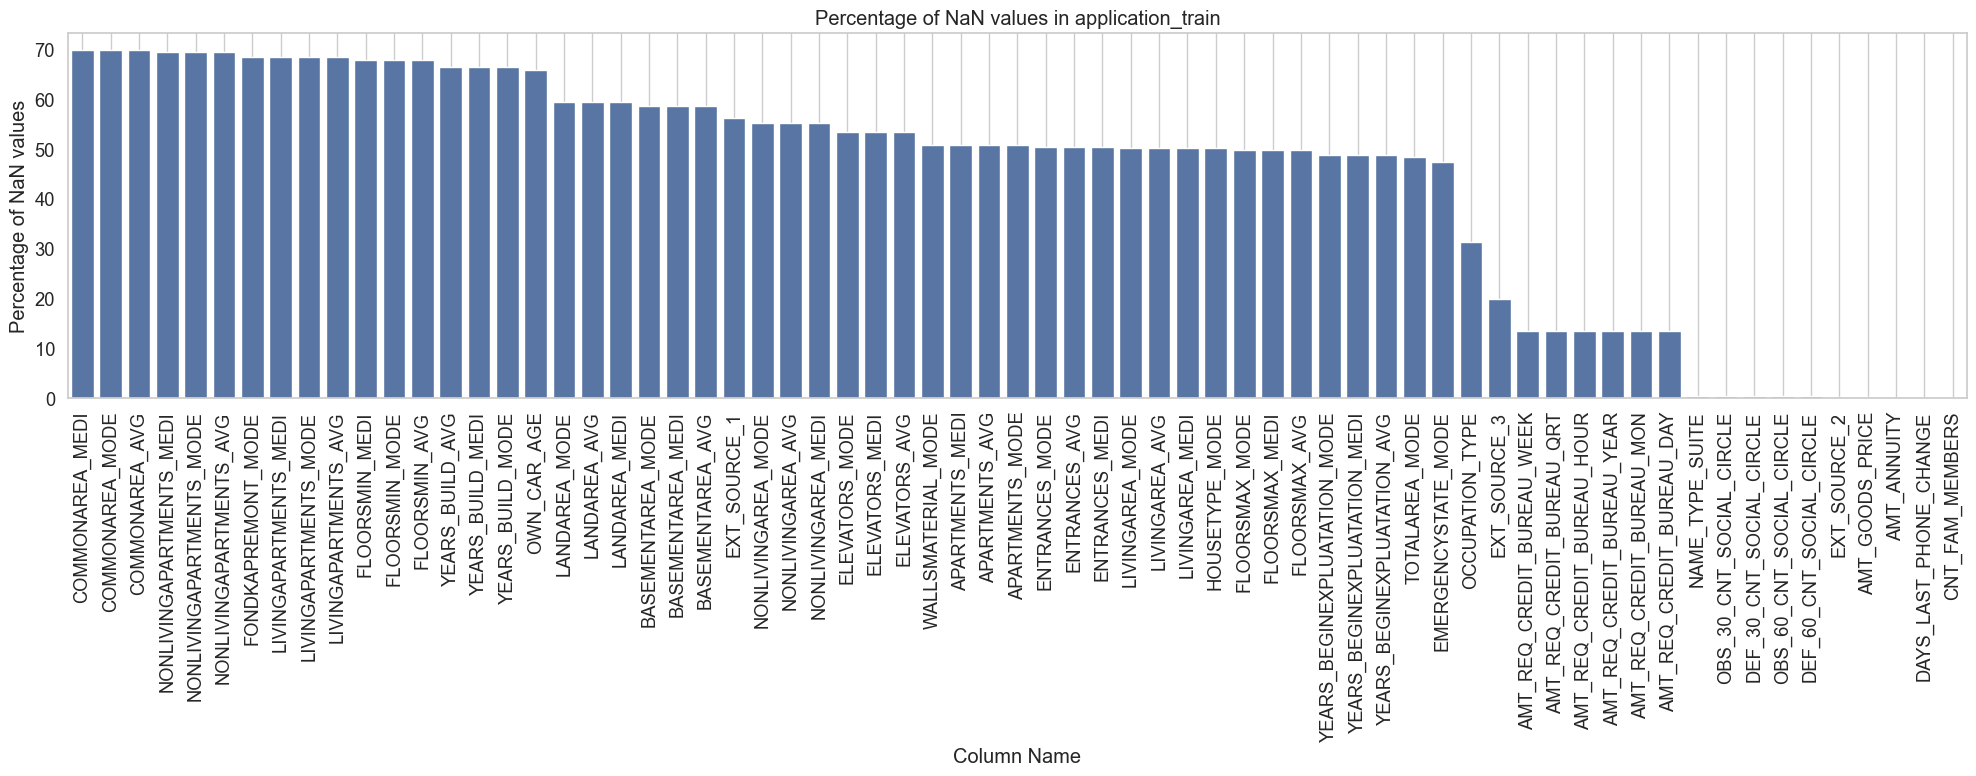

In [134]:
plot_nan_percent(nan_df_create(application_train), 'application_train', grid = True)

#### Nhận xét và Kết luận từ Dữ liệu `application_train.csv`:

##### Tình trạng dữ liệu thiếu:
a. **Số lượng cột chứa giá trị thiếu (NaN):**
   - **67 cột trong tổng số 122 đặc trưng** có chứa giá trị NaN.
   - Đây là một tỷ lệ khá lớn. Nếu chỉ có 1-2 cột chứa giá trị NaN, chúng ta có thể cân nhắc loại bỏ chúng. Tuy nhiên, với số lượng lớn như vậy, việc loại bỏ sẽ dẫn đến mất mát thông tin đáng kể.

b. **Các cột có tỷ lệ NaN cao:**
   - Một số cột, như **"COMMONAREA"**, **"NONLIVINGAPARTMENT"**, v.v., có **gần 70% giá trị thiếu**.
   - Các cột này chủ yếu liên quan đến **thống kê căn hộ của người vay** (apartment statistics).  
   - Điều này cho thấy những giá trị này có thể không được ghi nhận trong quá trình nhập liệu và có thể là **thông tin không bắt buộc**.

---

##### Hướng xử lý dữ liệu thiếu:
c. Với tỷ lệ giá trị thiếu lớn, cần áp dụng các kỹ thuật xử lý như:
   - **Loại bỏ cột (Drop Columns):** Nếu các cột có tỷ lệ NaN cực kỳ cao (>70%), có thể cân nhắc loại bỏ các cột này.  
   - **Điền giá trị thay thế (Imputation):**  
     - Sử dụng **trung bình (mean)**, **trung vị (median)** hoặc **giá trị phổ biến nhất (mode)** để điền.  
     - Với các cột liên quan đến căn hộ, có thể sử dụng giá trị **0** nếu giá trị thiếu phản ánh rằng khách hàng không có căn hộ tương ứng.
   - **Xây dựng mô hình dự đoán (Predictive Imputation):** Sử dụng các thuật toán học máy để dự đoán giá trị bị thiếu dựa trên các đặc trưng khác.

---

##### Các cột không chứa giá trị NaN:
d. **Danh sách các cột không chứa giá trị NaN:**
  FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_11, FLAG_DOCUMENT_10, FLAG_DOCUMENT_14, FLAG_DOCUMENT_9, FLAG_DOCUMENT_15, FLAG_DOCUMENT_5, FLAG_DOCUMENT_8, FLAG_DOCUMENT_7, FLAG_DOCUMENT_6, FLAG_DOCUMENT_19, FLAG_DOCUMENT_21, FLAG_DOCUMENT_4, FLAG_DOCUMENT_3, FLAG_DOCUMENT_2, FLAG_DOCUMENT_17, FLAG_DOCUMENT_20, FLAG_DOCUMENT_18, FLAG_DOCUMENT_16, Unnamed: 0, TARGET, NAME_INCOME_TYPE, DAYS_EMPLOYED, DAYS_BIRTH, REGION_POPULATION_RELATIVE, NAME_HOUSING_TYPE, NAME_FAMILY_STATUS, NAME_EDUCATION_TYPE, AMT_CREDIT, DAYS_ID_PUBLISH, AMT_INCOME_TOTAL, CNT_CHILDREN, FLAG_OWN_REALTY, FLAG_OWN_CAR, CODE_GENDER, NAME_CONTRACT_TYPE, DAYS_REGISTRATION, FLAG_MOBIL, ORGANIZATION_TYPE, HOUR_APPR_PROCESS_START, LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY, REG_CITY_NOT_LIVE_CITY, LIVE_REGION_NOT_WORK_REGION, REG_REGION_NOT_WORK_REGION, REG_REGION_NOT_LIVE_REGION, WEEKDAY_APPR_PROCESS_START, FLAG_EMP_PHONE, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, FLAG_EMAIL, FLAG_PHONE, FLAG_CONT_MOBILE, FLAG_WORK_PHONE, SK_ID_CURR

Columns with no NaN values: FLAG_DOCUMENT_19, FLAG_DOCUMENT_21, FLAG_DOCUMENT_20, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_18, FLAG_DOCUMENT_8, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_9, FLAG_DOCUMENT_17, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_12, Unnamed: 0, NAME_CONTRACT_TYPE, NAME_EDUCATION_TYPE, DAYS_REGISTRATION, DAYS_EMPLOYED, DAYS_BIRTH, REGION_POPULATION_RELATIVE, NAME_HOUSING_TYPE, NAME_FAMILY_STATUS, NAME_INCOME_TYPE, ORGANIZATION_TYPE, AMT_CREDIT, AMT_INCOME_TOTAL, CNT_CHILDREN, FLAG_OWN_REALTY, FLAG_OWN_CAR, CODE_GENDER, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT

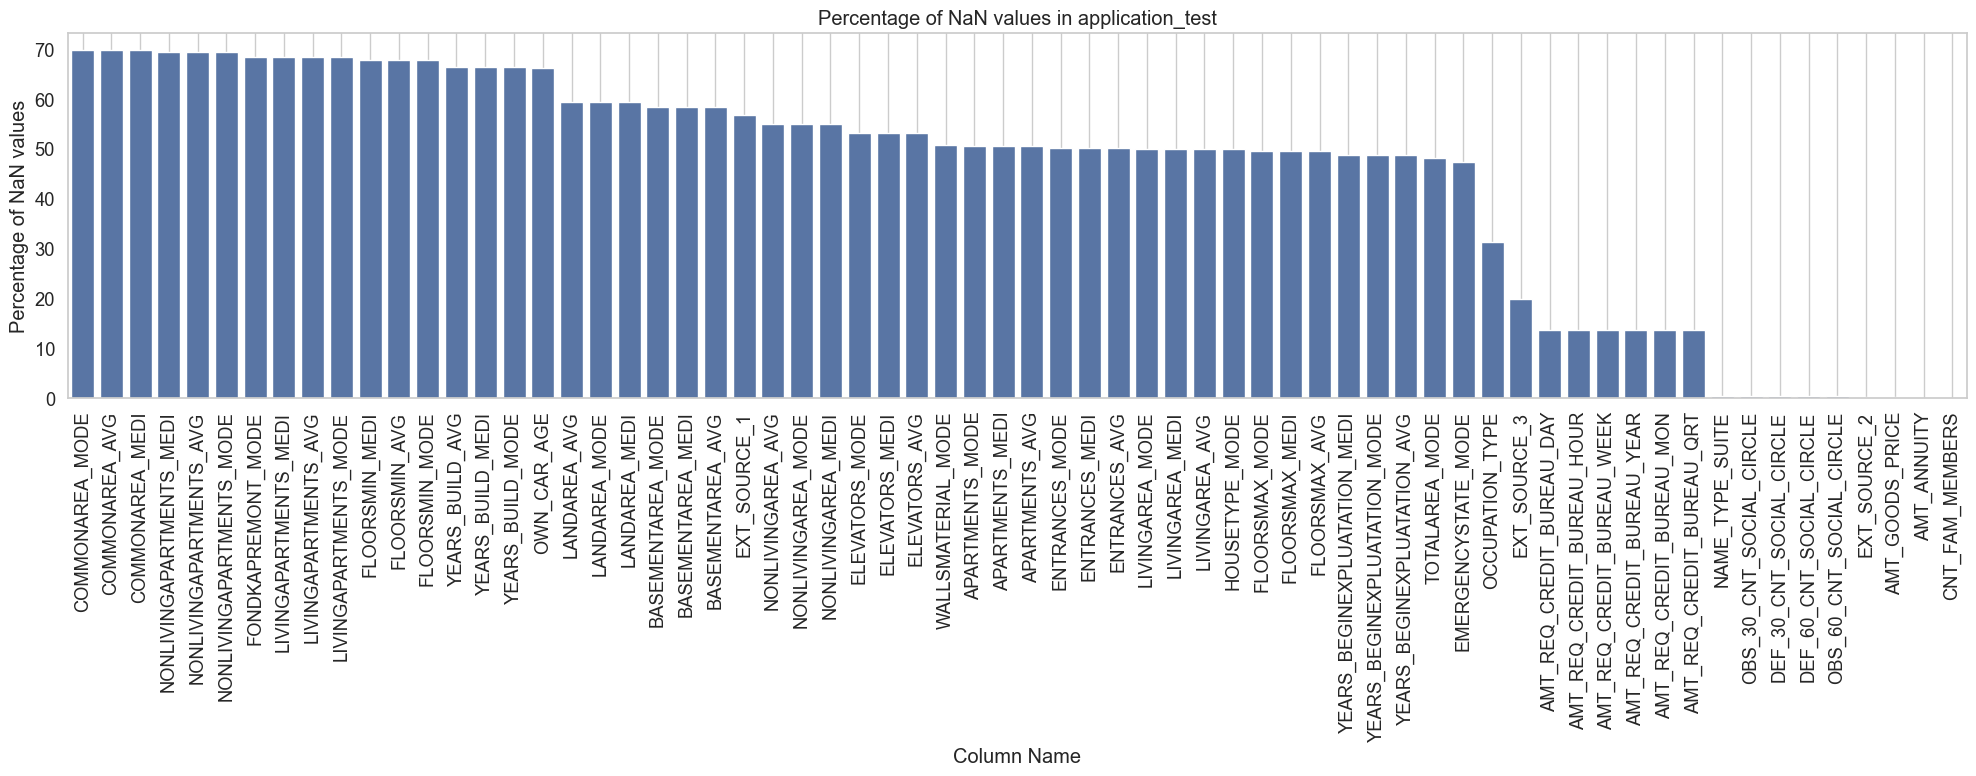

In [135]:
plot_nan_percent(nan_df_create(application_test), 'application_test', grid = True)

### 3. Distribution of Target Variable

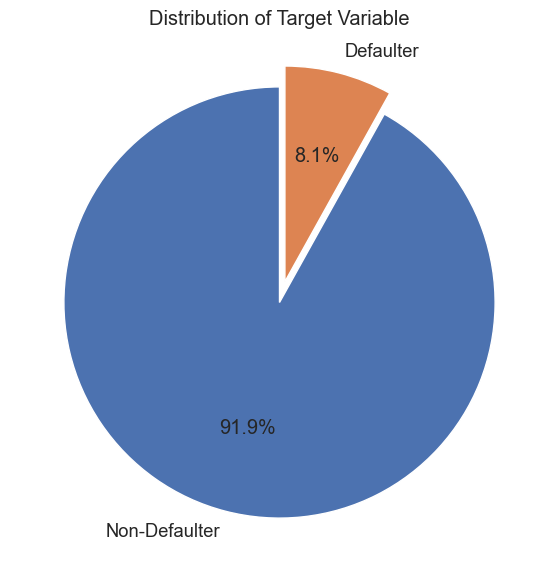

In [136]:
# Assuming application_train is your DataFrame and 'TARGET' is your target column
target_distribution = application_train['TARGET'].value_counts()
labels = ['Non-Defaulter', 'Defaulter']

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(target_distribution, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Target Variable')

# Display the pie chart
plt.show()

### Nhận xét và Kết luận:

#### Mất cân bằng dữ liệu:
a. **Biểu đồ cho thấy sự mất cân bằng đáng kể trong biến mục tiêu**:  
   - Chỉ có **8.1% khoản vay** được phân loại là **Người vay không trả được nợ (Defaulters)**, làm cho nhóm này trở thành **lớp thiểu số**.  
   - Ngược lại, có tới **91.9% khoản vay** thuộc nhóm **Người vay trả nợ đầy đủ (Non-Defaulters)**, đây là **lớp đa số**.

---

#### Gán nhãn biến mục tiêu:
b. Trong trường hợp này:  
   - **Người vay không trả được nợ (Defaulters):** Gán giá trị mục tiêu là **1**.  
   - **Người vay trả nợ đầy đủ (Non-Defaulters):** Gán giá trị mục tiêu là **0**.

---

#### Ảnh hưởng của mất cân bằng dữ liệu đến mô hình học máy:
c. **Nhiều thuật toán học máy nhạy cảm với sự mất cân bằng dữ liệu**, nếu sử dụng trực tiếp dữ liệu mà không xử lý trước, có thể dẫn đến dự đoán bị lệch về **lớp đa số (Non-Defaulters)**.  
   - Để giải quyết vấn đề này, có thể áp dụng các kỹ thuật xử lý như:  
     - **Oversampling** lớp thiểu số (tăng số lượng mẫu cho lớp Defaulters).  
     - **Undersampling** lớp đa số (giảm số lượng mẫu cho lớp Non-Defaulters).  
     - Sử dụng các mô hình có trọng số để xử lý sự mất cân bằng giữa các lớp.

---

#### Chỉ số đánh giá hiệu suất:
d. **Độ chính xác (Accuracy)** không phải là chỉ số phù hợp cho bài toán này:  
   - Mô hình có thể đạt độ chính xác cao chỉ bằng cách luôn dự đoán **lớp đa số (Non-Defaulters)**, nhưng lại bỏ qua lớp thiểu số quan trọng.  
   - Thay vào đó, nên sử dụng các chỉ số sau để đánh giá hiệu suất mô hình một cách chính xác hơn:  
     - **ROC-AUC**: Đánh giá khả năng phân biệt giữa hai lớp.  
     - **Precision-Recall**: Quan trọng trong các bài toán có sự mất cân bằng cao.  
     - **F1-Score**: Thể hiện sự cân bằng giữa Precision và Recall.  
     - **Ma trận nhầm lẫn (Confusion Matrix):** Hiển thị chi tiết số lượng dự đoán đúng và sai cho từng lớp.

---

#### Tập trung vào lớp thiểu số:
e. **Lớp thiểu số (Người vay không trả được nợ - Defaulters):**  
   - Dù hiếm gặp, nhưng các sự kiện không trả nợ **rất quan trọng** và cần được nhận diện chính xác.  
   - Những sự kiện này thường biểu hiện các **hành vi hoặc mẫu dữ liệu khác biệt**, do đó cần đặc biệt chú ý trong các bài toán:  
     - **Phát hiện gian lận (Fraud Detection).**  
     - **Phân tích rủi ro tín dụng (Credit Risk Analysis).**  
     - **Phát hiện bất thường (Anomaly Detection).**


### 4. Correlation of categorical variables

Chúng ta sẽ vẽ một heatmap thể hiện giá trị của hệ số tương quan Phi-K giữa từng cặp biến.

Hệ số tương quan Phi-K tương tự như hệ số tương quan Pearson nhưng có thể áp dụng cho các cặp biến phân loại. Nó giúp kiểm tra xem một biến phân loại có mối quan hệ nào đó với một biến phân loại khác hay không. Giá trị tối đa của Phi-K là 1, biểu thị mối quan hệ mạnh nhất giữa hai biến phân loại.

----------------------------------------------------------------------------------------------------


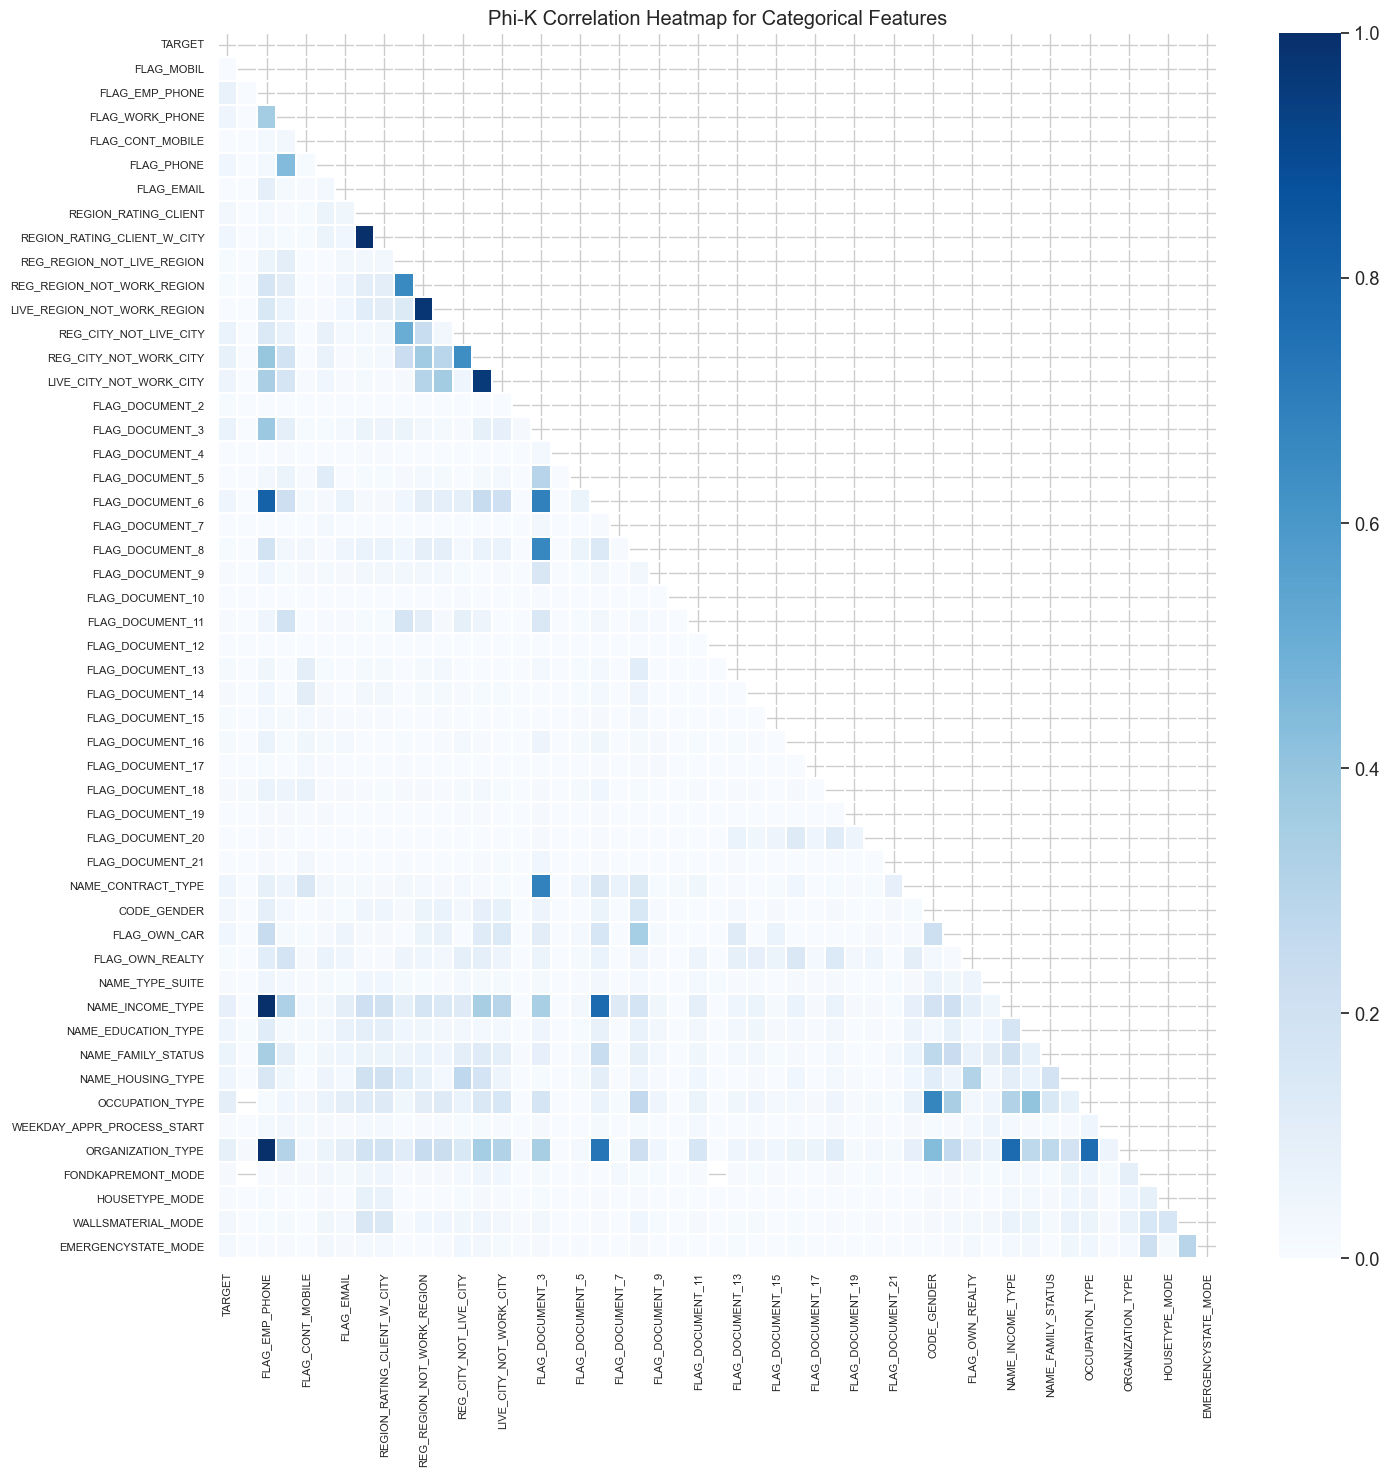

----------------------------------------------------------------------------------------------------
Categories with highest values of Phi-K Correlation value with Target Variable are:


Column Name  Phik-Correlation
43              OCCUPATION_TYPE          0.100618
45            ORGANIZATION_TYPE          0.089738
39             NAME_INCOME_TYPE          0.082585
12       REG_CITY_NOT_WORK_CITY          0.079965
1                FLAG_EMP_PHONE          0.071581
15              FLAG_DOCUMENT_3          0.069821
11       REG_CITY_NOT_LIVE_CITY          0.069703
41           NAME_FAMILY_STATUS          0.056126
13      LIVE_CITY_NOT_WORK_CITY          0.051984
34           NAME_CONTRACT_TYPE          0.049651
42            NAME_HOUSING_TYPE          0.049082
40          NAME_EDUCATION_TYPE          0.046317
2               FLAG_WORK_PHONE          0.045513
18              FLAG_DOCUMENT_6          0.044370
4                    FLAG_PHONE          0.036878
7   REGION_RATING_CLIENT_W_CITY          0.036538
36                 FLAG_OWN_CAR          0.036240
6          REGION_RATING_CLIENT          0.034941
35                  CODE_GENDER          0.032971
48           WALLSMATERIAL_MODE          0.028330
49          EMERGENCYSTATE_MODE          0.022274
28             FLAG_DOCUMENT_16          0.018731
25             FLAG_DOCUMENT_13          0.016923
46           FONDKAPREMONT_MODE          0.015092
26             FLAG_DOCUMENT_14          0.014383
30             FLAG_DOCUMENT_18          0.012408
20              FLAG_DOCUMENT_8          0.011499
14              FLAG_DOCUMENT_2          0.011289
37              FLAG_OWN_REALTY          0.010443
9    REG_REGION_NOT_WORK_REGION          0.009324

----------------------------------------------------------------------------------------------------


In [137]:
categorical_columns = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                                'LIVE_CITY_NOT_WORK_CITY'] + ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + application_train.dtypes[
                                    application_train.dtypes == 'object'].index.tolist()
plot_phik_matrix(application_train, categorical_columns, figsize = (15,15), fontsize = 8)

### Nhận xét và Kết luận chi tiết:

#### Từ bảng Phi-K Correlation, chúng ta thấy rằng:
a. **Phần lớn các đặc trưng phân loại (categorical features)** không có sự tương quan cao với nhau hoặc với biến mục tiêu `TARGET`.
b. Tuy nhiên, một số đặc trưng cho thấy **mối tương quan tương đối mạnh**, có thể ảnh hưởng đáng kể đến bài toán phân loại.

---

#### Các cặp đặc trưng có sự tương quan đáng chú ý với nhau:

##### +. **NAME_INCOME_TYPE, ORGANIZATION_TYPE với FLAG_EMP_PHONE**
- **NAME_INCOME_TYPE (Loại thu nhập):**  
  Loại thu nhập của khách hàng (ví dụ: làm công ăn lương, tự kinh doanh, lương hưu...) thường phản ánh tính chất công việc hoặc nguồn thu nhập chính của họ. Điều này có thể liên quan đến việc sử dụng hoặc không sử dụng điện thoại làm việc (`FLAG_EMP_PHONE`).
  
- **ORGANIZATION_TYPE (Loại tổ chức):**  
  Tổ chức mà khách hàng làm việc có thể cho biết tính chất công việc (ví dụ: lĩnh vực kinh doanh, tổ chức nhà nước, doanh nghiệp tư nhân, hoặc các tổ chức tự do). Tính chất tổ chức này có thể quyết định xem khách hàng có cần cung cấp điện thoại làm việc hay không.
  
- **FLAG_EMP_PHONE (Có cung cấp số điện thoại làm việc)**  
  Việc khách hàng cung cấp số điện thoại công việc cho thấy họ có thể gặp khó khăn tài chính và muốn tránh bị làm phiền qua điện thoại cá nhân.

---

##### +. **REGION_RATING_CLIENT_W_CITY với REGION_RATING_CLIENT**
- **REGION_RATING_CLIENT:**  
  Phản ánh mức đánh giá khu vực mà khách hàng sinh sống. Thông thường, đây là một chỉ số định lượng cho mức độ phát triển, an toàn, hoặc chất lượng của khu vực đó.

- **REGION_RATING_CLIENT_W_CITY:**  
  Phản ánh mức đánh giá khu vực mà khách hàng sinh sống bao gồm cả thành phố. Điều này có thể liên quan đến việc khu vực của khách hàng có thuộc đô thị hay không, và chất lượng khu vực này khi xét trong bối cảnh toàn thành phố.

---

##### +. **LIVE_REGION_NOT_WORK_REGION với REG_REGION_NOT_WORK_REGION**
- **LIVE_REGION_NOT_WORK_REGION:**  
  Biến này cho biết khách hàng sống ở khu vực không trùng với khu vực làm việc. Nó là một cờ (boolean) phản ánh sự khác biệt giữa nơi ở hiện tại và nơi làm việc.

- **REG_REGION_NOT_WORK_REGION:**  
  Biến này cho biết khu vực đăng ký (nơi đăng ký hộ khẩu hoặc cư trú hợp pháp) không trùng với khu vực làm việc. Nó phản ánh sự khác biệt giữa nơi đăng ký và nơi làm việc.

---

##### +. **LIVE_CITY_NOT_WORK_CITY với REG_CITY_NOT_WORK_CITY**
- **LIVE_CITY_NOT_WORK_CITY:**  
  Biến này là một cờ (boolean) cho biết thành phố nơi khách hàng đang sinh sống hiện tại không trùng với thành phố nơi họ làm việc.

- **REG_CITY_NOT_WORK_CITY:**  
  Biến này là một cờ (boolean) cho biết thành phố nơi khách hàng đăng ký cư trú (hộ khẩu) không trùng với thành phố nơi họ làm việc.

---

#### Các đặc trưng có hệ số tương quan cao nhất với `TARGET`:

- **OCCUPATION_TYPE (0.100618):**  
   Loại nghề nghiệp có thể ảnh hưởng đến khả năng vỡ nợ của khách hàng, chẳng hạn một số nghề nghiệp có rủi ro tài chính cao hơn.

- **ORGANIZATION_TYPE (0.089738):**  
   Loại tổ chức mà khách hàng làm việc có thể liên quan đến mức độ ổn định thu nhập của họ.

- **NAME_INCOME_TYPE (0.082585):**  
   Loại thu nhập (như làm công, kinh doanh tự do, lương hưu) có thể là yếu tố quan trọng phân loại nhóm khách hàng.

- **REG_CITY_NOT_WORK_CITY (0.079965):**  
   Việc khách hàng không làm việc tại khu vực đăng ký cư trú có thể tác động đến khả năng trả nợ của họ.

---

#### Các đặc trưng khác có sự tương quan đáng kể với `TARGET`:

- **REG_CITY_NOT_LIVE_CITY (0.069703):**  
  Điều này phản ánh rằng khách hàng không sống tại khu vực đăng ký của họ, có thể ảnh hưởng đến khả năng quản lý tài chính hoặc tiếp cận tín dụng.

- **FLAG_EMP_PHONE (0.071581):**  
  Khả năng khách hàng có hoặc không có điện thoại công việc có thể liên quan đến đặc điểm công việc và mức độ tin cậy tín dụng.

- **FLAG_DOCUMENT_3 (0.069821):**  
  Các tài liệu pháp lý có thể là yếu tố quyết định trong việc phân loại mức độ rủi ro tín dụng.


### 5. Correlation of numeric features

Chúng ta sẽ vẽ một biểu đồ nhiệt (heatmap) để hiển thị mức độ tương quan giữa các đặc trưng số (numeric features) với các đặc trưng khác. Cột SK_ID_CURR sẽ bị loại trừ vì nó không có sự liên quan trực tiếp trong phân tích này. Biểu đồ nhiệt này sẽ giúp chúng ta nhận diện các đặc trưng số có mức độ tương quan cao với nhau và cũng giúp chúng ta xác định những đặc trưng có mức độ tương quan mạnh với biến mục tiêu (Target Variable).

----------------------------------------------------------------------------------------------------


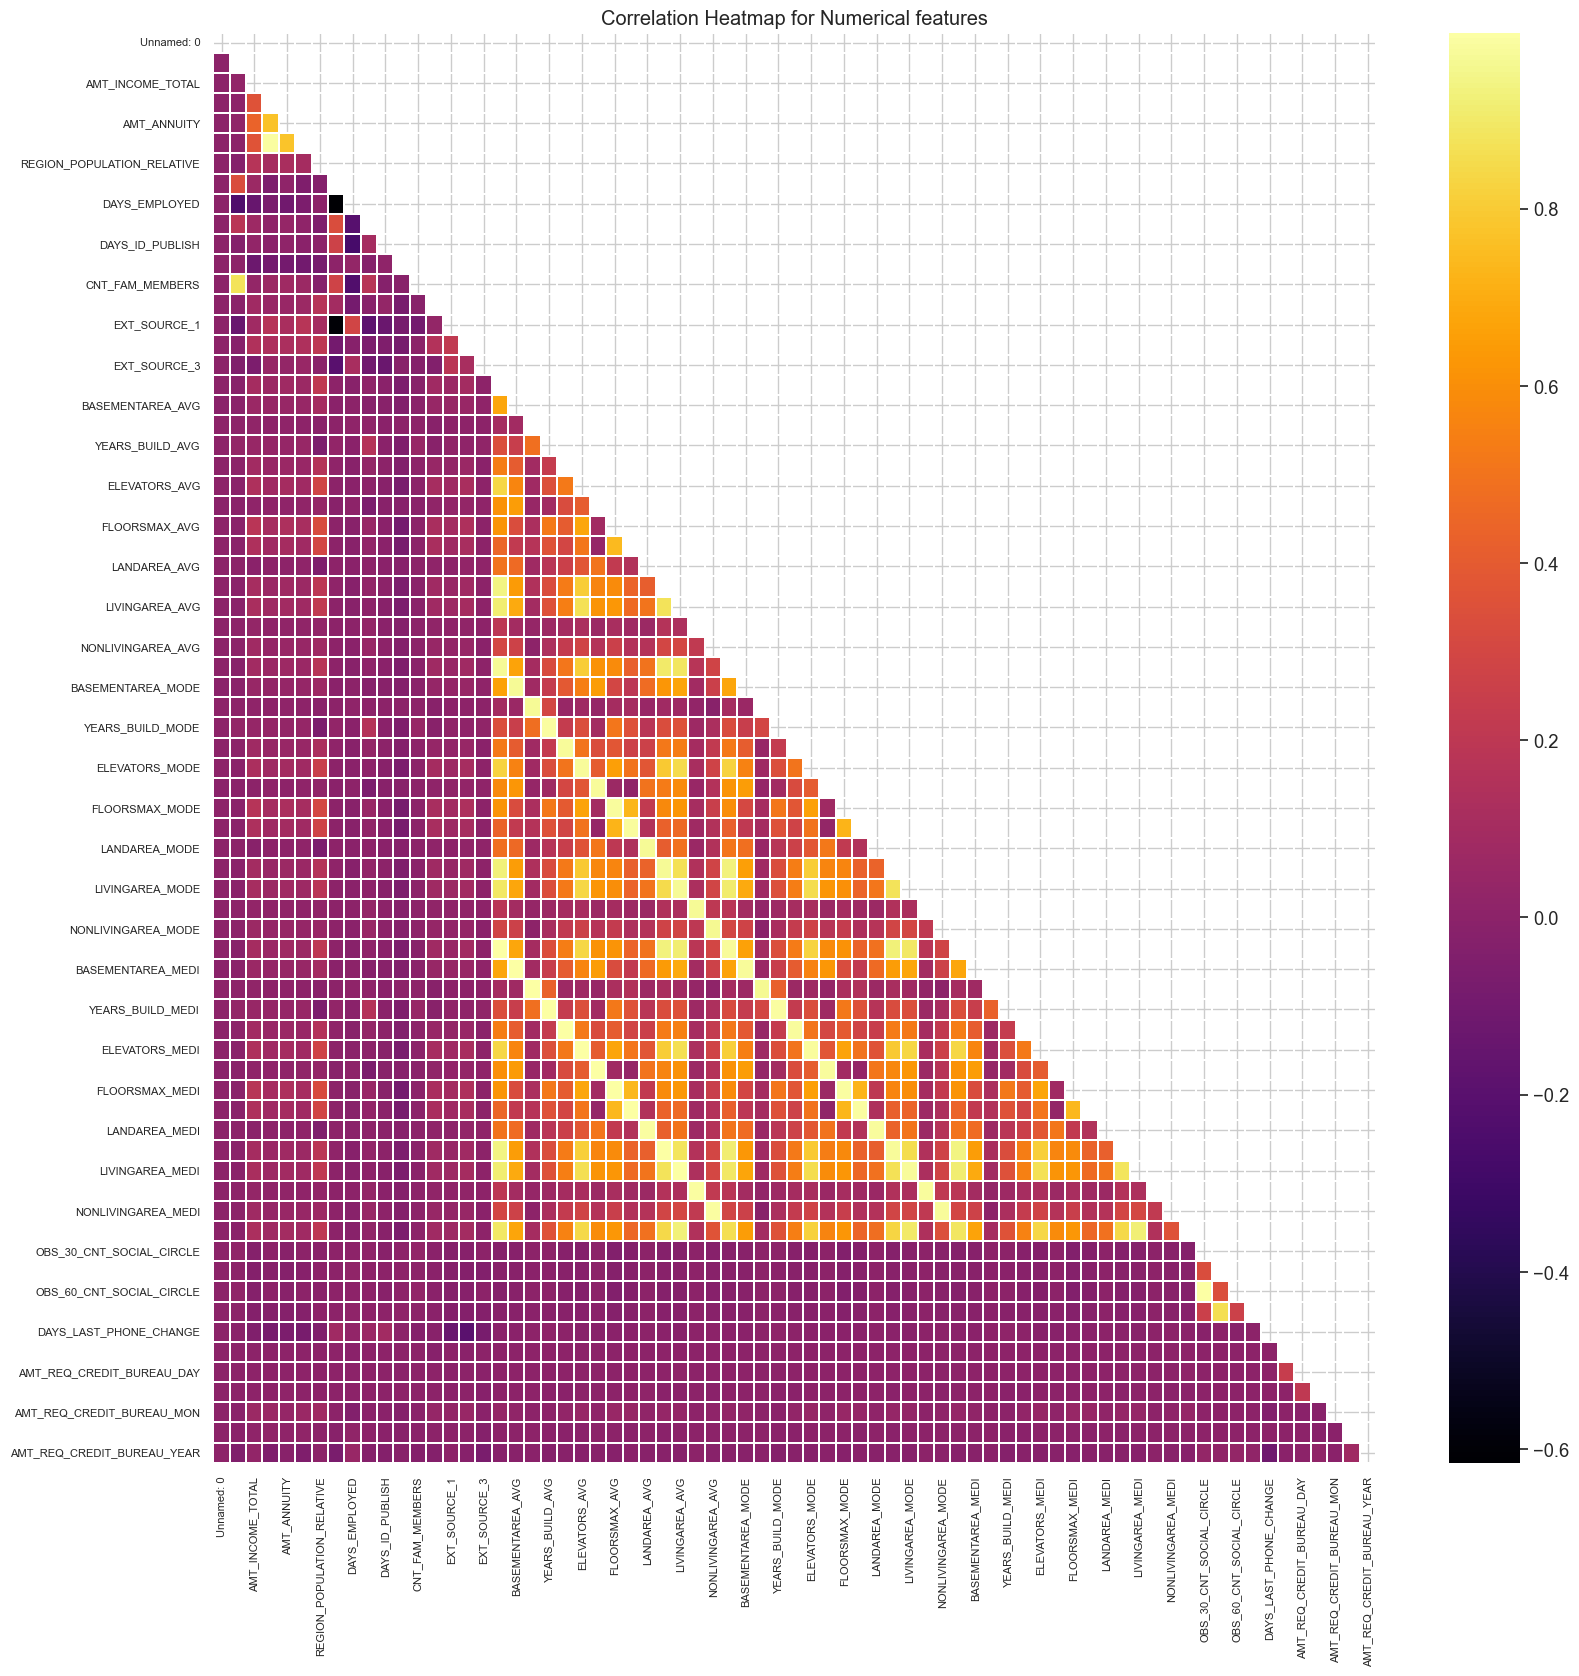

----------------------------------------------------------------------------------------------------


In [138]:
columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns) - set(['TARGET']))
corr_mat = correlation_matrix(application_train, columns_to_drop, figsize = (17,17), fontsize = 8, cmap = 'inferno')
corr_mat.plot_correlation_matrix()

In [139]:
#Seeing the top columns with highest phik-correlation with the target variable in application_train table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'Unnamed: 0']
interval columns not set, guessing: ['TARGET', 'CNT_CHILDREN']
interval columns not set, guessing: ['TARGET', 'AMT_INCOME_TOTAL']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'REGION_POPULATION_RELATIVE']
interval columns not set, guessing: ['TARGET', 'DAYS_BIRTH']
interval columns not set, guessing: ['TARGET', 'DAYS_EMPLOYED']
interval columns not set, guessing: ['TARGET', 'DAYS_REGISTRATION']
interval columns not set, guessing: ['TARGET', 'DAYS_ID_PUBLISH']
interval columns not set, guessing: ['TARGET', 'OWN_CAR_AGE']
interval columns not set, guessing: ['TARGET', 'CNT_FAM_MEMBERS']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_1']
interval columns no

Column Name  Phik-Correlation
16            EXT_SOURCE_3          0.249366
14            EXT_SOURCE_1          0.213658
15            EXT_SOURCE_2          0.211522
7               DAYS_BIRTH          0.101565
8            DAYS_EMPLOYED          0.071599
64  DAYS_LAST_PHONE_CHANGE          0.071180
10         DAYS_ID_PUBLISH          0.068400
5          AMT_GOODS_PRICE          0.060560
24           FLOORSMAX_AVG          0.058875
3               AMT_CREDIT          0.058758

----------------------------------------------------------------------------------------------------


### Nhận xét và Kết luận:

#### Heatmap thể hiện rất tốt giá trị hoặc mức độ tương quan mà mỗi đặc trưng có với tất cả các đặc trưng khác.

- **a.** Nhìn vào heatmap, chúng ta có thể thấy phần lớn các ô có màu tím, điều này cho thấy mức độ tương quan rất thấp. Điều này có nghĩa là hầu hết các đặc trưng thực sự không có mối tương quan với nhau.  
  Tuy nhiên, chúng ta cũng có thể nhận thấy những vùng có màu sắc tương phản ở giữa heatmap. Những vùng này thể hiện mức độ tương quan cao giữa các đặc trưng. Các đặc trưng này thường liên quan đến các thống kê của căn hộ.

- **b.** Nếu chúng ta nhìn vào các đặc trưng trong `application_train`, chúng ta có thể thấy rõ rằng các thống kê của căn hộ được đưa ra dưới dạng Trung bình, Trung vị và Mode, do đó có thể kỳ vọng rằng Trung bình, Trung vị và Mode sẽ có sự tương quan với nhau.  
  Một điều cần lưu ý là các đặc trưng trong cùng một nhóm, ví dụ như Trung bình, cũng có sự tương quan với các đặc trưng Trung bình khác, chẳng hạn như Số thang máy, Diện tích sống, Diện tích không sống, Diện tích tầng hầm, v.v.

- **c.** Chúng ta cũng nhận thấy có sự tương quan mạnh giữa `AMT_GOODS_PRICE` và `AMT_CREDIT`, và giữa `DAYS_EMPLOYED` và `DAYS_BIRTH`.

- **d.** Chúng ta không muốn các đặc trưng có sự tương quan quá cao vì điều này có thể làm tăng độ phức tạp của mô hình mà không đem lại giá trị bổ sung. Vì vậy, chúng ta sẽ loại bỏ các đặc trưng có sự tương quan cao với nhau.

- **e.** Trong số tất cả các đặc trưng, chúng ta nhận thấy các đặc trưng `EXT_SOURCE` có sự tương quan cao với biến mục tiêu. Những đặc trưng này có thể quan trọng đối với bài toán phân loại của chúng ta.


### 6. Plotting Categorical Variables

Đối với các biến phân loại, chúng ta sẽ sử dụng **Biểu đồ Thanh (Bar Plot)** và **Biểu đồ Tròn (Pie Plot)**. Việc sử dụng loại biểu đồ nào sẽ phụ thuộc vào số lượng các danh mục duy nhất trong một đặc trưng:

- Nếu một đặc trưng có **quá nhiều danh mục**, việc hiển thị chúng trên Biểu đồ Tròn sẽ trở nên khó khăn, và **Biểu đồ Thanh** sẽ làm tốt hơn trong việc thể hiện từng danh mục.
- **Biểu đồ Thanh** cũng sẽ được ưu tiên khi tỷ lệ của các danh mục gần như giống nhau, giúp dễ dàng nhận ra sự khác biệt nhỏ.

### **Chiến lược trực quan hóa các biến phân loại**
Chúng ta sẽ áp dụng chiến lược sau đây để trực quan hóa các biến phân loại có tương quan cao với biến mục tiêu :

1. **Phân phối các danh mục:**
   - Đầu tiên, vẽ biểu đồ phân phối từng danh mục trong toàn bộ dữ liệu ở **biểu đồ con thứ nhất**.

2. **Tỷ lệ Default cho từng danh mục:**
   - Tiếp theo, ở **biểu đồ con thứ hai**, vẽ tỷ lệ phần trăm khách hàng bị Default (Target = 1) từ từng danh mục.


#### a. Distribution of Categorical Variable OCCUPATION_TYPE

In [140]:
df[df['Row']=='OCCUPATION_TYPE']['Description']

28    What kind of occupation does the client have
Name: Description, dtype: object

Total Number of unique categories of OCCUPATION_TYPE = 19


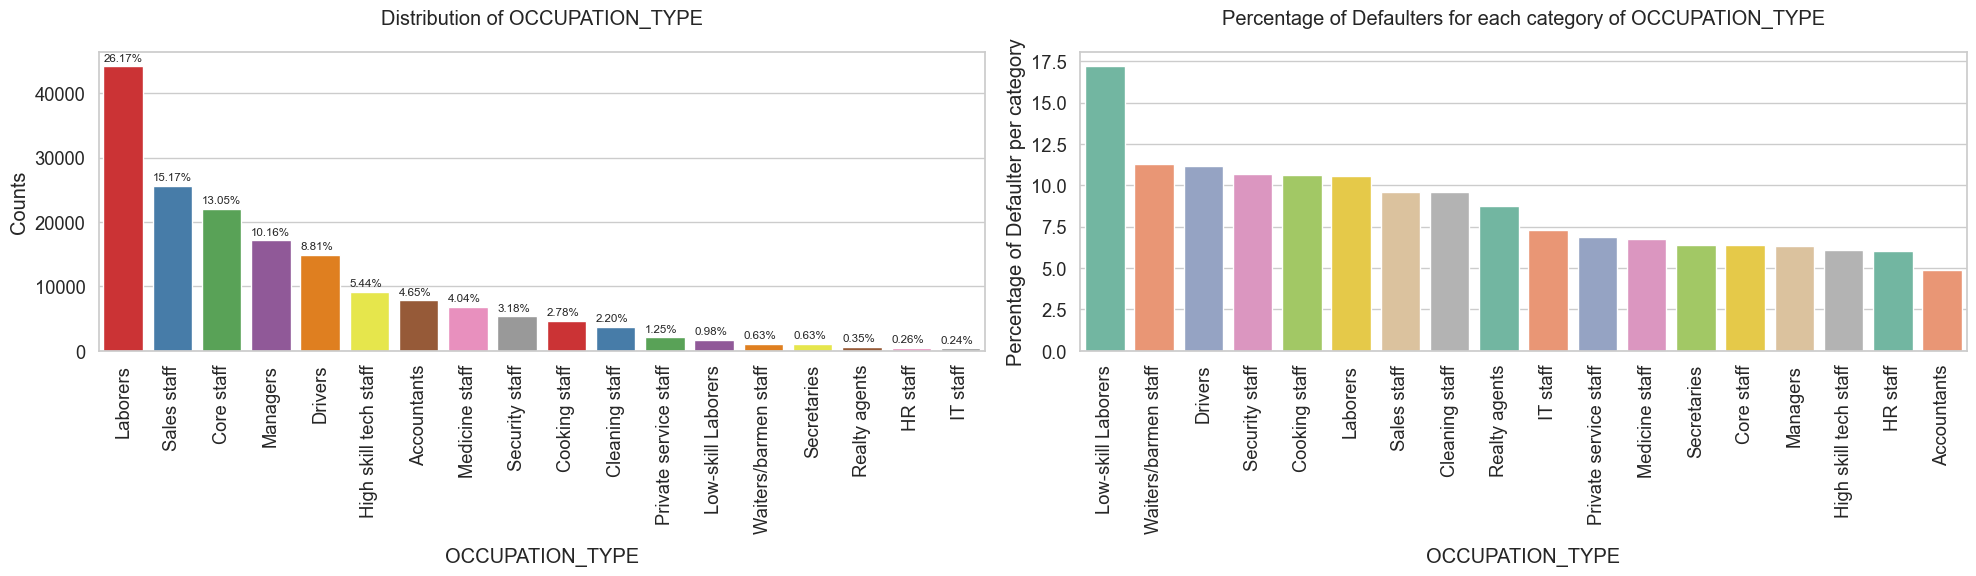

----------------------------------------------------------------------------------------------------


In [141]:
plot_categorical_variables_bar(application_train, column_name = 'OCCUPATION_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

### **Quan sát và Kết luận**

Từ các biểu đồ về loại nghề nghiệp, chúng ta có thể rút ra các nhận xét sau:

1. Trong số các ứng viên, loại nghề nghiệp phổ biến nhất là **Lao động phổ thông**, chiếm gần **26%** số lượng hồ sơ. Nghề nghiệp phổ biến tiếp theo là **Nhân viên bán hàng**, sau đó là **Nhân viên cốt lõi** và **Quản lý**.

2. **Tỷ lệ vỡ nợ (Defaulting Rate)** cao nhất thuộc về nhóm **Lao động kỹ năng thấp**, khoảng **17,5%**. Tiếp theo là các nghề như **Lái xe, Phục vụ, Nhân viên bảo vệ, Lao động phổ thông, Đầu bếp**, v.v. Tất cả đều là những công việc ở mức độ thấp. Điều này cho thấy những người làm công việc ở mức độ thấp có xu hướng vỡ nợ cao hơn.

3. **Tỷ lệ vỡ nợ thấp nhất** thuộc về các nhóm **Kế toán, Nhân viên cốt lõi, Quản lý, Nhân viên kỹ thuật cao, Nhân viên nhân sự**, v.v., là những công việc thuộc mức độ trung bình đến cao.

---

### **Kết luận**

Có thể kết luận rằng những người làm các công việc **ở mức độ thấp** có xu hướng vỡ nợ cao hơn so với những người làm công việc **ở mức trung bình đến cao**.


#### b. Distribution of Categorical Variable ORGANIZATION_TYPE

In [142]:
df[df['Row']=='ORGANIZATION_TYPE']['Description']

40    Type of organization where client works
Name: Description, dtype: object

Total Number of categories of ORGANIZATION_TYPE = 58


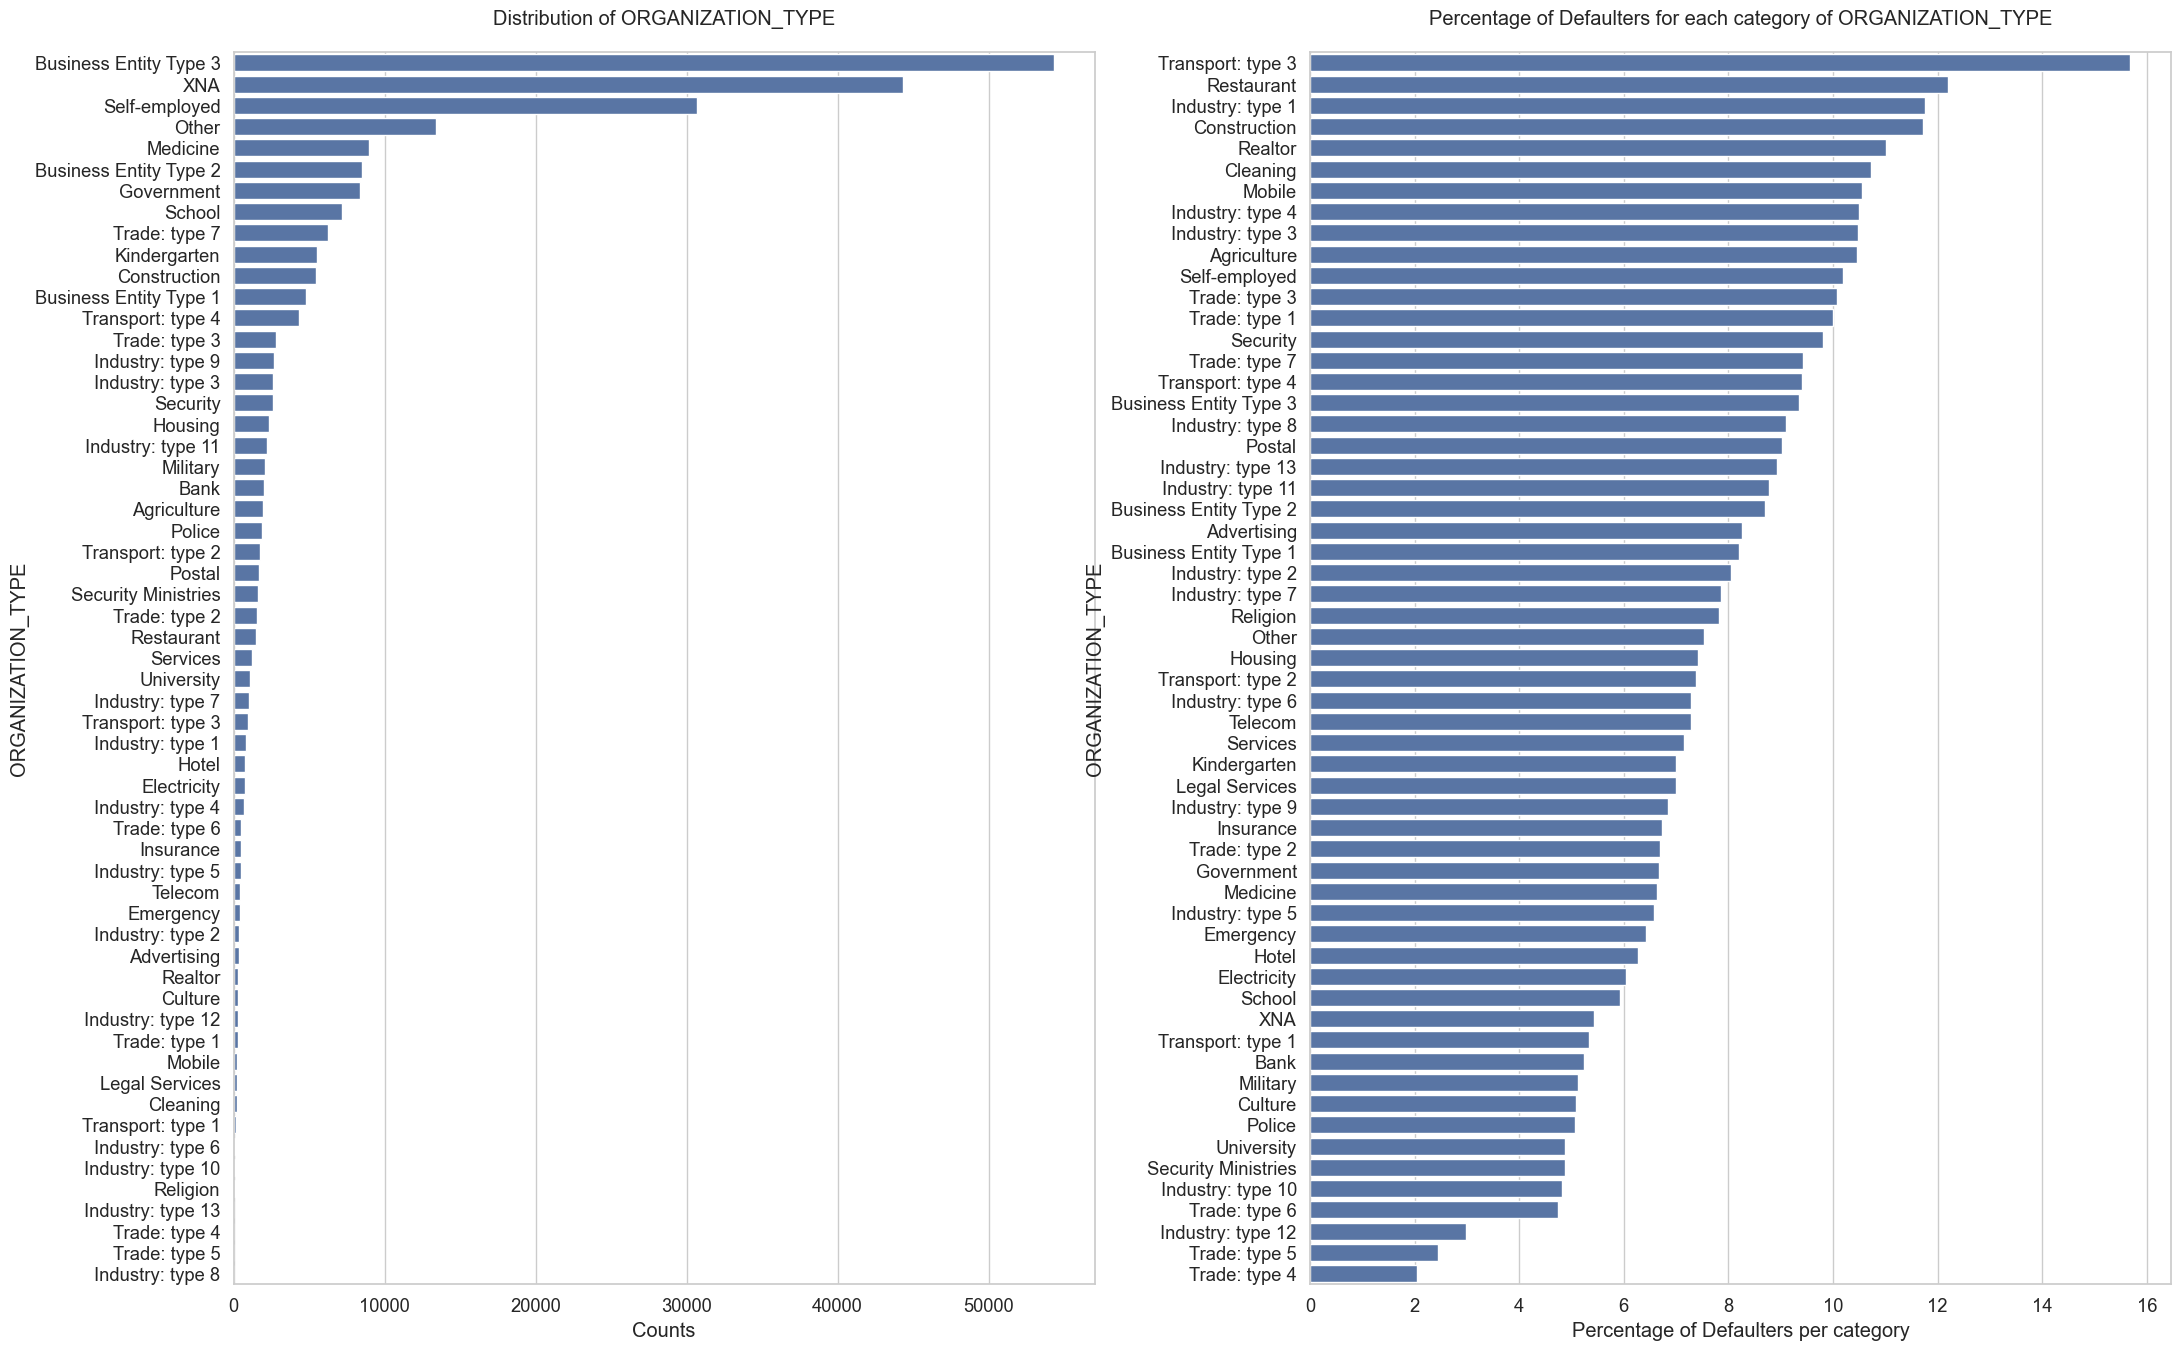

In [143]:
print(f"Total Number of categories of ORGANIZATION_TYPE = {len(application_train.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize = (25,16))
sns.set(style = 'whitegrid', font_scale = 1.2)
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
count_organization = application_train.ORGANIZATION_TYPE.value_counts().sort_values(ascending = False)
sns.barplot(x = count_organization, y = count_organization.index)
plt.title('Distribution of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Counts')
plt.ylabel('ORGANIZATION_TYPE')

plt.subplot(1,2,2)
percentage_default_per_organization = application_train[application_train.TARGET == 1].ORGANIZATION_TYPE.value_counts() * 100 / count_organization
percentage_default_per_organization = percentage_default_per_organization.dropna().sort_values(ascending = False)
sns.barplot(x = percentage_default_per_organization, y = percentage_default_per_organization.index)
plt.title('Percentage of Defaulters for each category of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Percentage of Defaulters per category')
plt.ylabel('ORGANIZATION_TYPE')

plt.show()

### **Quan sát và Kết luận**

Có rất nhiều loại tổ chức mà khách hàng thuộc về, cụ thể là 58 loại. Các biểu đồ trên đưa ra những nhận xét sau:

1. Từ biểu đồ đầu tiên, chúng ta thấy rằng hầu hết các ứng viên làm việc trong các tổ chức thuộc loại 'Business Entity Type3', 'XNA' hoặc 'Self Employed'. Loại tổ chức 'XNA' có thể là tổ chức không được phân loại.

2. Từ biểu đồ thứ hai, chúng ta nhận thấy rằng các ứng viên thuộc loại 'Transport: type 3' có xu hướng vỡ nợ cao nhất so với các loại tổ chức còn lại. Tiếp theo là các tổ chức thuộc các loại: 'Industry: type 13', 'Industry: type 8', 'Restaurant', 'Construction', v.v.

3. Các tổ chức có tỷ lệ vỡ nợ thấp nhất là 'Trade: type 4', 'Industry: type 12', v.v.

Những loại số này cũng có thể cung cấp thêm thông tin về tổ chức, tuy nhiên, vì chúng ta không có thông tin liên quan đến điều này, chúng ta chỉ sử dụng tên gọi đã được cung cấp.


#### c. Distribution of Categorical Variable NAME_INCOME_TYPE

In [144]:
df[df['Row']=='NAME_INCOME_TYPE']['Description']

12    Clients income type (businessman, working, maternity leave,
)
Name: Description, dtype: object

Total Number of unique categories of NAME_INCOME_TYPE = 8


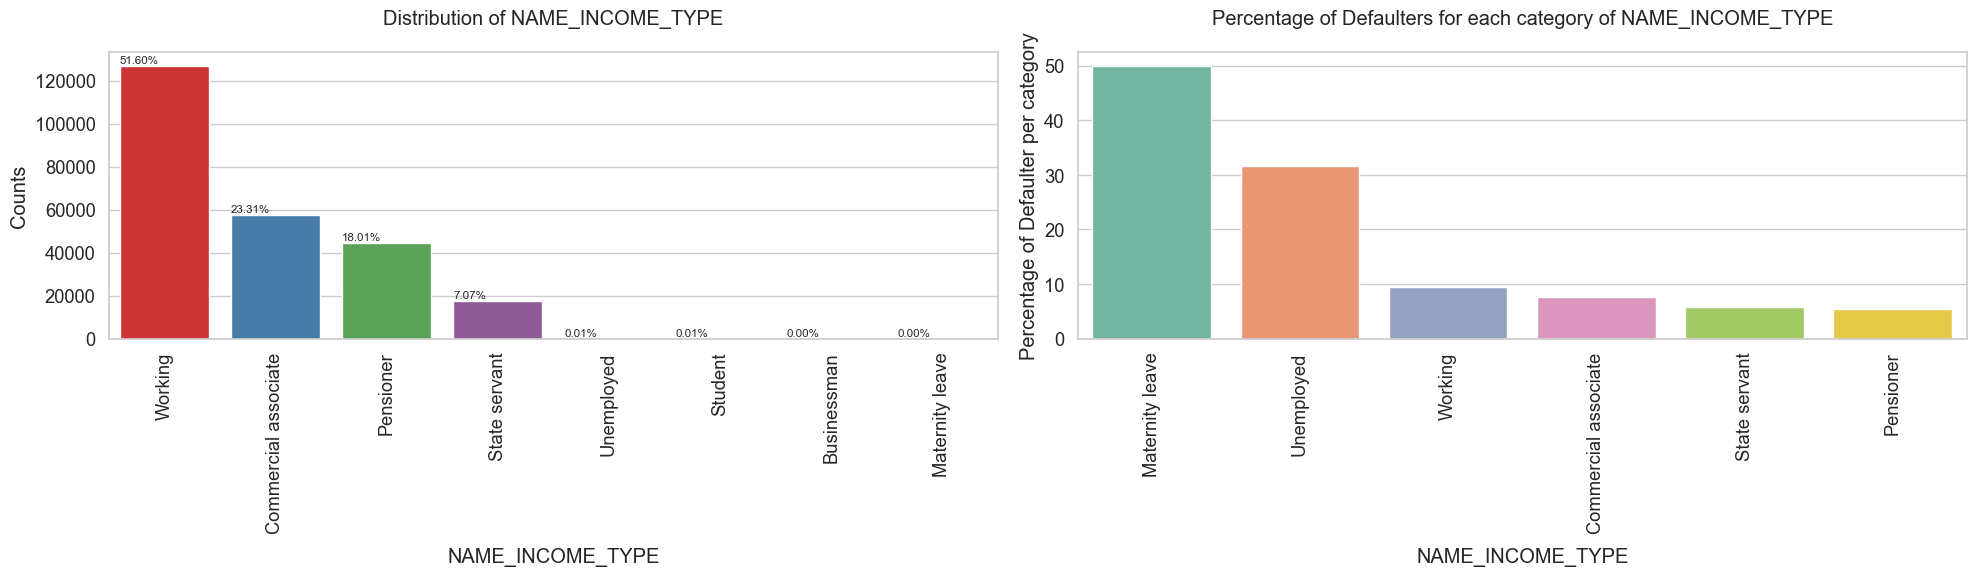

----------------------------------------------------------------------------------------------------


In [145]:
plot_categorical_variables_bar(application_train, column_name = 'NAME_INCOME_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

### **Quan sát và Kết luận**

Từ các biểu đồ về loại thu nhập, chúng ta có thể rút ra các nhận xét sau:

1. Trong số các thu nhập, loại phổ biến nhất là **Người đi làm**, chiếm gần **51,6%** số lượng hồ sơ. Nguồn thu nhập phổ biến tiếp theo là **Nhân viên kinh doanh**, sau đó là **Người hưu trí** và **Công chức**.

2. **Tỷ lệ vỡ nợ (Defaulting Rate)** cao nhất thuộc về nhóm **Nghỉ thai sản**, khoảng **50%** và **Thất nghiệp** với khoảng **31%**, cả 2 đều là nhóm không có thu nhập.

3. **Tỷ lệ vỡ nợ thấp nhất** thuộc về các nhóm **Doanh nhân, Sinh viên, Hưu trí, và Công chức**, là những người có thu nhập ổn định (ngoại trừ **Sinh viên**).




#### d. Distribution of Categorical Variable NAME_EDUCATION_TYPE

In [146]:
df[df['Row']=='NAME_EDUCATION_TYPE']['Description']

13    Level of highest education the client achieved
Name: Description, dtype: object

Total Number of unique categories of NAME_EDUCATION_TYPE = 5


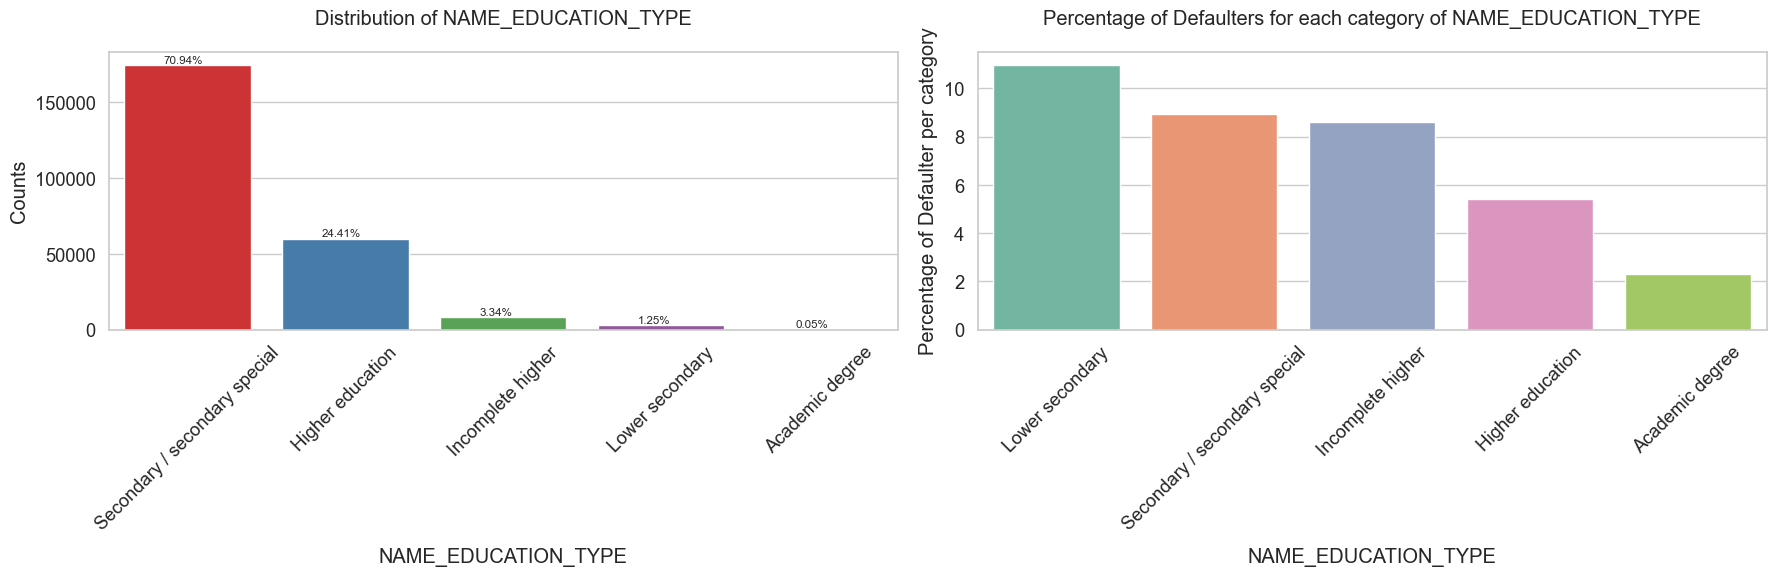

----------------------------------------------------------------------------------------------------


In [147]:
plot_categorical_variables_bar(application_train, column_name = 'NAME_EDUCATION_TYPE', rotation = 45, horizontal_adjust = 0.25)
print('-'*100)

### Quan sát và Kết luận:

Dựa trên các biểu đồ trên, chúng ta có thể rút ra các kết luận sau:

1. **Khoảng 71% khách hàng chỉ học đến trình độ Trung học/Trung học chuyên nghiệp**, và có **24.41% khách hàng có trình độ Đại học**. 
   - Điều này cho thấy phần lớn khách hàng/người vay không có trình độ học vấn cao.

2. **Biểu đồ thứ hai**:
   - Nhóm khách hàng chỉ học đến **Trung học cơ sở** có **tỷ lệ vỡ nợ cao nhất**.
   - Nhóm học đến **Trung học phổ thông** và **chưa hoàn thành Đại học** có xu hướng vỡ nợ tương tự nhau.

3. **Nhóm khách hàng có trình độ Đại học**:
   - **Xu hướng vỡ nợ thấp hơn đáng kể**, điều này phù hợp với logic.
   - **Nhóm có học vị học thuật (Academic Degree)**:
     - Có **tỷ lệ vỡ nợ thấp nhất**, nhưng số lượng nhóm này rất ít, nên dữ liệu từ nhóm này có thể không mang lại nhiều giá trị thực tiễn.


#### e. Distribution of Categorical Variable NAME_CONTRACT_TYPE

In [148]:
df[df['Row']=='NAME_CONTRACT_TYPE']['Description']

2                                                  Identification if loan is cash or revolving
175    Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
Name: Description, dtype: object

Total Number of unique categories of NAME_CONTRACT_TYPE = 2


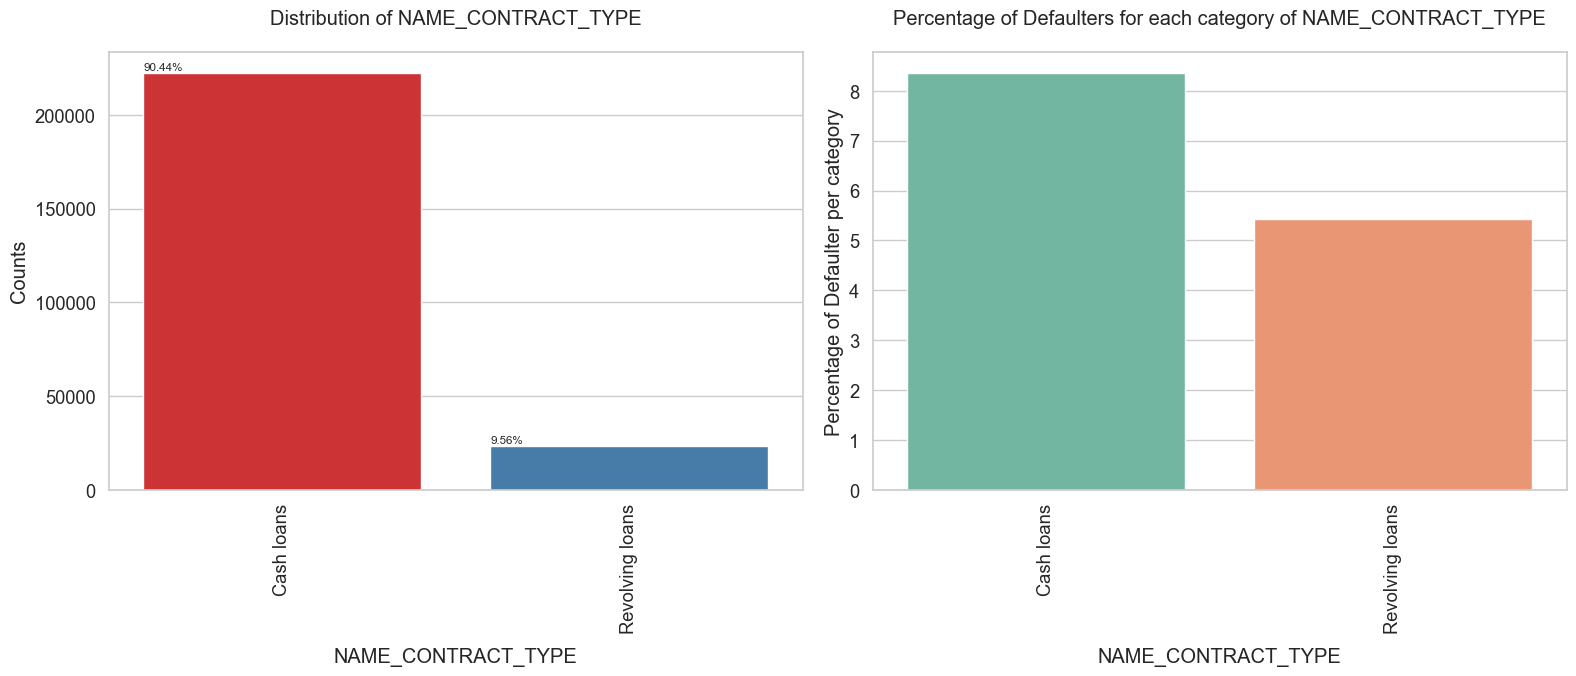

----------------------------------------------------------------------------------------------------


In [149]:
plot_categorical_variables_bar(application_train, column_name = 'NAME_CONTRACT_TYPE', figsize = (16,7), rotation = 90)
print('-'*100)

### Quan sát và Kết luận:

Từ biểu đồ trên, chúng ta có thể rút ra những quan sát và kết luận sau:

#### Từ subplot đầu tiên:
- Có thể thấy rằng phần lớn các khoản vay mà khách hàng vay là **Vay Tiền Mặt**, chiếm 90.44% tổng số vay.
- Chỉ có **9.56%** người vay **Vay Quay Vòng (Revolving Loans)**.

#### Từ subplot thứ hai (**Tỷ lệ Người Phá Sản**):
- Tỷ lệ người phá sản cao hơn đối với những người vay **Tiền Mặt (8.35%)** so với những người vay **Quay Vòng (5.48%)**.


#### f. Distribution of Categorical Variable NAME_HOUSING_TYPE

In [150]:
df[df['Row']=='NAME_HOUSING_TYPE']['Description']

15    What is the housing situation of the client (renting, living with parents, ...)
Name: Description, dtype: object

Total Number of unique categories of NAME_HOUSING_TYPE = 6


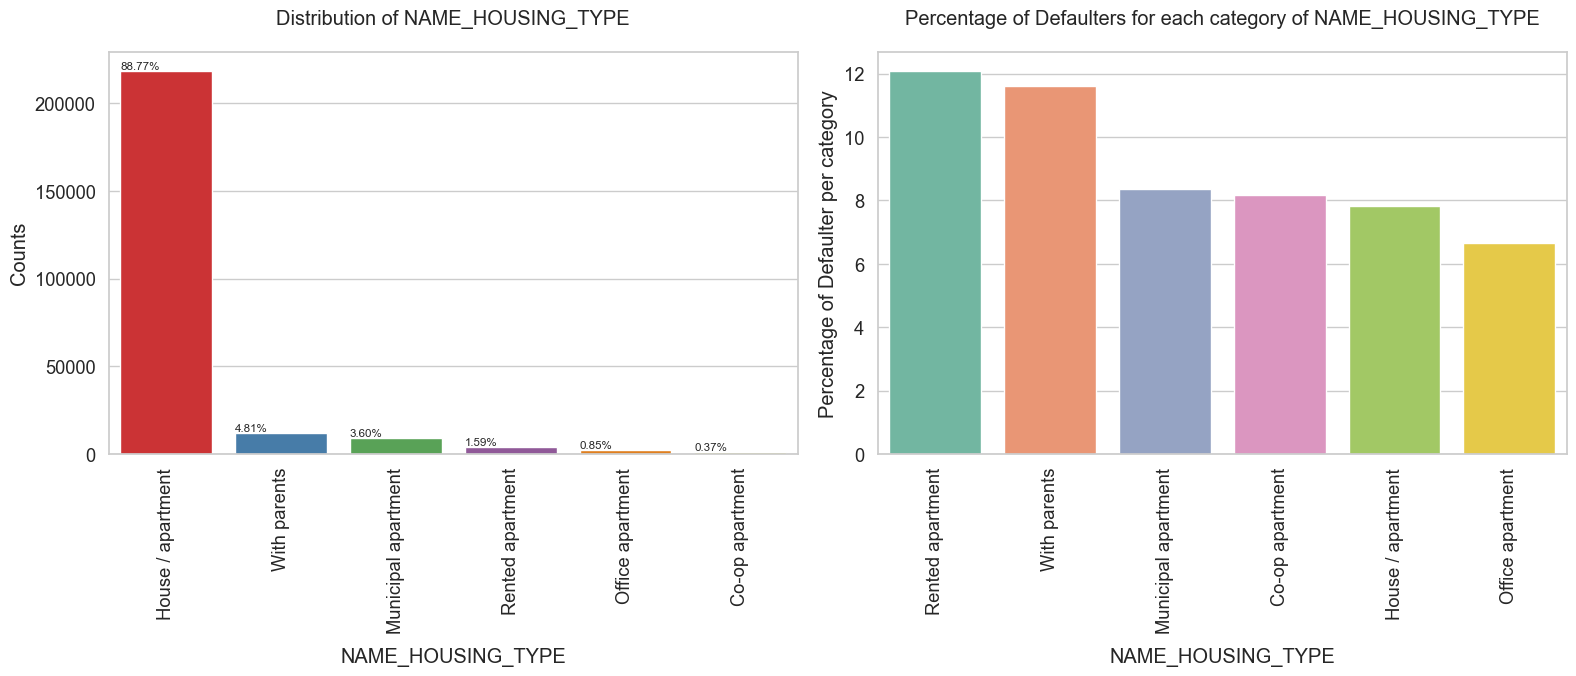

----------------------------------------------------------------------------------------------------


In [151]:
plot_categorical_variables_bar(application_train, column_name = 'NAME_HOUSING_TYPE', figsize = (16,7), rotation = 90)
print('-'*100)

### Nhận xét và kết luận từ biểu đồ

#### Biểu đồ bên trái: Phân phối loại hình nhà ở (*LOẠI_HÌNH_NHÀ_Ở*)
1. **Phân bố loại hình nhà ở**:
   - **Nhà riêng/Căn hộ**: Chiếm **88.77%**, cho thấy phần lớn khách hàng sống trong loại hình này.
   - **Sống cùng cha mẹ**: Chiếm **4.81%**, đứng thứ hai về tỷ lệ.
   - **Căn hộ chung cư nhà nước**: Chiếm **3.60%**.
   - **Nhà thuê**: Chiếm **1.59%**.
   - **Căn hộ văn phòng** và **Căn hộ hợp tác xã**: Tỷ lệ rất nhỏ, lần lượt là **0.85%** và **0.37%**.

#### Biểu đồ bên phải: Tỷ lệ vỡ nợ theo loại hình nhà ở (*TỶ_LỆ_VỠ_NỢ_THEO_LOẠI_HÌNH_NHÀ_Ở*)
2. **Tỷ lệ vỡ nợ**:
   - **Nhà thuê** và **Sống cùng cha mẹ**: Có tỷ lệ vỡ nợ cao nhất (**gần 12%**), cho thấy đây là nhóm có rủi ro tín dụng cao.
   - **Căn hộ chung cư nhà nước** và **Căn hộ hợp tác xã**: Tỷ lệ vỡ nợ thấp hơn nhưng vẫn cần chú ý.
   - **Nhà riêng/Căn hộ**: Tỷ lệ vỡ nợ trung bình.
   - **Căn hộ văn phòng**: Có tỷ lệ vỡ nợ thấp nhất, thể hiện sự ổn định tín dụng.

#### Kết luận
- **Nhóm rủi ro cao**: 
  - Nhóm sống **Nhà thuê** và **Sống cùng cha mẹ** là đối tượng có khả năng vỡ nợ cao. 
  - Nguyên nhân có thể đến từ thu nhập không ổn định hoặc độ tuổi trẻ.
- **Nhóm rủi ro thấp**: 
  - Nhóm sống tại **Căn hộ văn phòng** và **Nhà riêng/Căn hộ** có độ ổn định tín dụng cao hơn.



#### g. Distribution of Categorical Variable NAME_FAMILY_STATUS

In [152]:
df[df['Row']=='NAME_FAMILY_STATUS']['Description']

14    Family status of the client
Name: Description, dtype: object

Total Number of unique categories of NAME_FAMILY_STATUS = 6


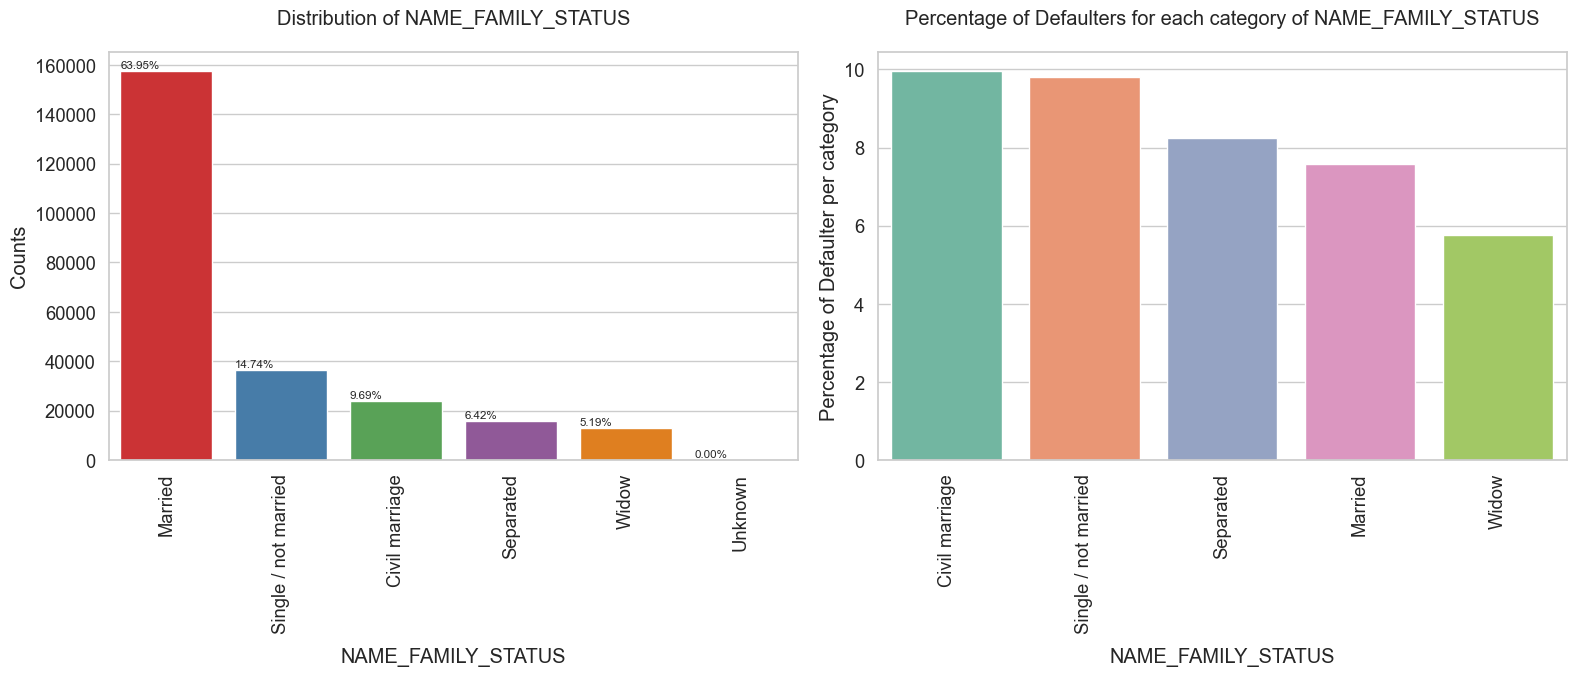

----------------------------------------------------------------------------------------------------


In [153]:
plot_categorical_variables_bar(application_train, column_name = 'NAME_FAMILY_STATUS', figsize = (16,7), rotation = 90)
print('-'*100)

### Quan sát và Kết luận:

Từ biểu đồ trên, chúng ta thấy rằng:

- **Biểu đồ con bên trái (Phân bố của `NAME_FAMILY_STATUS`):**  
  - Hầu hết các khách hàng đều thuộc nhóm "Married" (63.95%), trong khi các nhóm còn lại có tỷ lệ thấp hơn nhiều. "Single/not married" chiếm 14.74%, "Civil marriage" chiếm 9.69%, "Separated" chiếm 6.42%, và "Widow" chiếm 5.19%. Nhóm "Unknown" không có khách hàng nào.
  
- **Biểu đồ con bên phải (Tỷ lệ vỡ nợ theo từng danh mục của `NAME_FAMILY_STATUS`):**  
  - Tỷ lệ vỡ nợ ở các nhóm như "Civil marriage", "Single/not married", và "Separated" tương đối gần nhau (khoảng từ 8 đến 10%), trong khi tỷ lệ vỡ nợ của nhóm "Married" là thấp hơn (khoảng hơn 7%) và nhóm "Widow" có tỷ lệ vỡ nợ thấp nhất (khoảng gần 6%).
  - Điều này cho thấy mặc dù nhóm "Married" chiếm tỷ lệ lớn nhất trong tổng số khách hàng, nhưng nhóm "Single/not married" và "Civil marriage" có tỷ lệ vỡ nợ khá cao.

### Kết luận:
- Mặc dù nhóm "Married" có số lượng lớn nhất, nhưng các nhóm "Single/not married" và "Civil marriage" lại có tỷ lệ vỡ nợ cao hơn. Điều này có thể liên quan đến các yếu tố khác ngoài tình trạng hôn nhân, chẳng hạn như thu nhập, nghề nghiệp, hay các yếu tố xã hội và kinh tế khác.
- Nhóm "Widow" có tỷ lệ vỡ nợ thấp nhất, mặc dù có một số ít khách hàng trong nhóm này, điều này có thể phản ánh sự ổn định tài chính sau khi mất người bạn đời.


#### h. Distribution of Categorical Variable NAME_TYPE_SUITE

In [154]:
df[df['Row']=='NAME_TYPE_SUITE']['Description']

11         Who was accompanying client when he was applying for the loan
194    Who accompanied client when applying for the previous application
Name: Description, dtype: object

Total Number of unique categories of NAME_TYPE_SUITE = 8


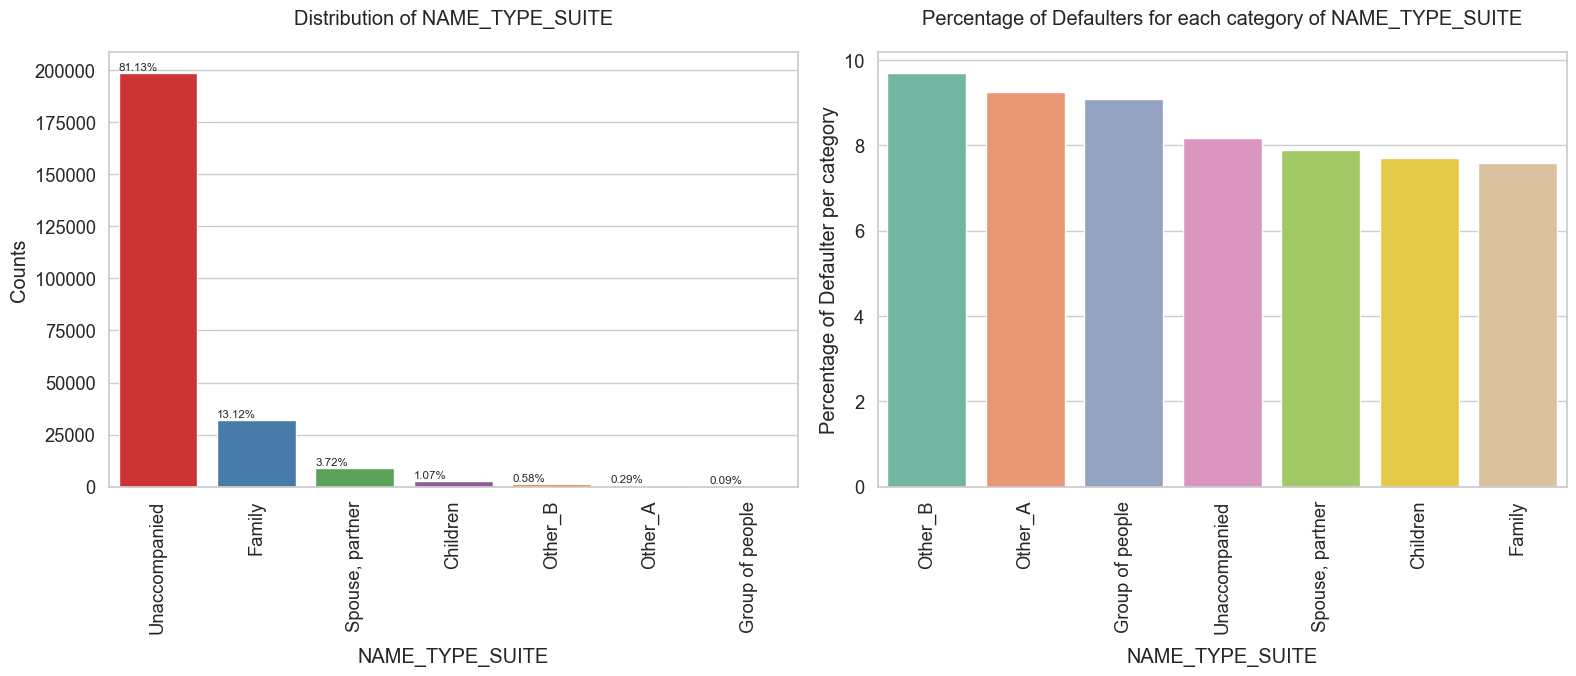

----------------------------------------------------------------------------------------------------


In [155]:
plot_categorical_variables_bar(application_train, column_name = 'NAME_TYPE_SUITE', figsize = (16,7), rotation = 90)
print('-'*100)

### Nhận xét và Kết luận

#### Biểu đồ bên trái: Phân phối loại hình khách hàng đi cùng (*NAME_TYPE_SUITE*)
1. **Khách hàng đi một mình chiếm phần lớn nhất**:
   - **Unaccompanied (Đi một mình)** chiếm **81.13%**, cho thấy phần lớn khách hàng nộp hồ sơ vay vốn một mình.
   - **Family (Gia đình)** chiếm **13.12%**, là nhóm lớn thứ hai.
   - Các nhóm khác như **Spouse, partner (Vợ/chồng, bạn đời)** (**3.72%**), **Children (Trẻ em)** (**1.07%**), và các nhóm nhỏ như **Other_A**, **Other_B**, và **Group of people** đều chiếm tỷ lệ rất nhỏ.

#### Biểu đồ bên phải: Tỷ lệ vỡ nợ theo loại hình khách hàng đi cùng (*Percentage of Defaulters per category*)
2. **Nhóm có tỷ lệ vỡ nợ cao nhất**:
   - Nhóm **Other_B**, **Other_A**, và **Group of people** có tỷ lệ vỡ nợ cao nhất (gần **9-10%**), nhưng số lượng trong các nhóm này rất nhỏ, nên có thể cần xem xét thêm.
3. **Nhóm đi một mình và đi cùng gia đình**:
   - Nhóm **Unaccompanied** và **Family** có tỷ lệ vỡ nợ trung bình, dao động trong khoảng **8-9%**, nhưng nhóm này chiếm phần lớn số lượng khách hàng.
4. **Nhóm có tỷ lệ vỡ nợ thấp hơn**:
   - **Spouse, partner (Vợ/chồng, bạn đời)**, **Children (Trẻ em)** có tỷ lệ vỡ nợ thấp hơn, nằm trong khoảng **7-8%**.

### Kết luận
1. **Nhóm đi một mình**:
   - Đây là nhóm chiếm đa số và có tỷ lệ vỡ nợ trung bình, vì vậy cần đặc biệt lưu ý trong thẩm định tín dụng.
2. **Nhóm đi cùng vợ/chồng và trẻ em**:
   - Có tỷ lệ vỡ nợ thấp hơn, có thể được xem là nhóm khách hàng ít rủi ro hơn.
3. **Nhóm nhỏ như Other_A, Other_B, Group of people**:
   - Mặc dù tỷ lệ vỡ nợ cao, số lượng rất nhỏ nên ít giá trị phân tích thực tế.
4. **Hướng xử lý**:
   - Xây dựng các tiêu chí thẩm định chặt chẽ hơn với nhóm đi một mình, do vừa có số lượng lớn vừa tiềm ẩn rủi ro tín dụng.
   

#### i. Distribution of Categorical Variable 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'

In [156]:
a=df[
    (df['Row'] == 'REG_REGION_NOT_LIVE_REGION') |
    (df['Row'] == 'REG_REGION_NOT_WORK_REGION') |
    (df['Row'] == 'LIVE_REGION_NOT_WORK_REGION') |
    (df['Row'] == 'REG_CITY_NOT_LIVE_CITY') |
    (df['Row'] == 'REG_CITY_NOT_WORK_CITY') |
    (df['Row'] == 'LIVE_CITY_NOT_WORK_CITY')
]['Description']
for desc in a:
    print(desc)


Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
Flag if client's contact address does not match work address (1=different, 0=same, at region level)
Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
Flag if client's contact address does not match work address (1=different, 0=same, at city level)


Total Number of unique categories of REG_REGION_NOT_LIVE_REGION = 2


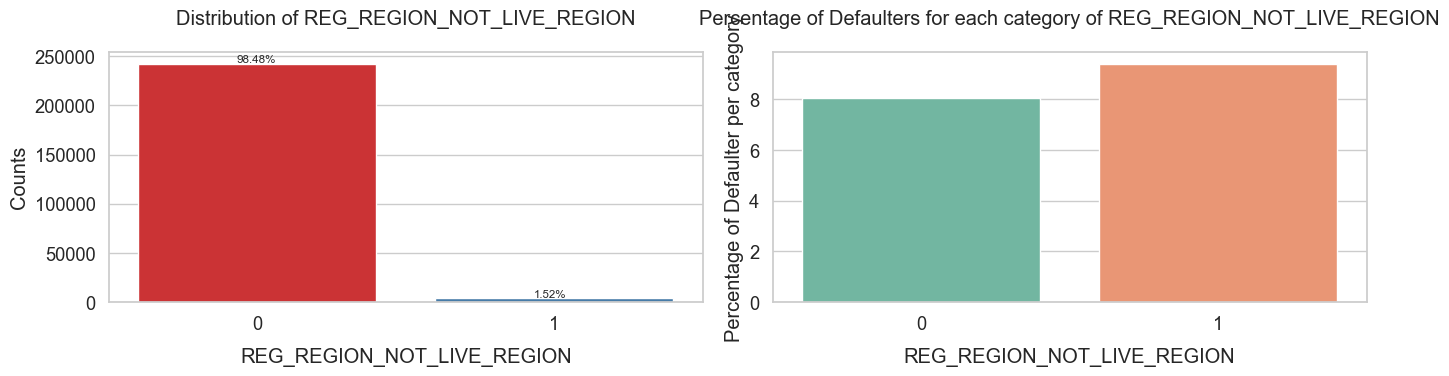

----------------------------------------------------------------------------------------------------
Total Number of unique categories of REG_CITY_NOT_LIVE_CITY = 2


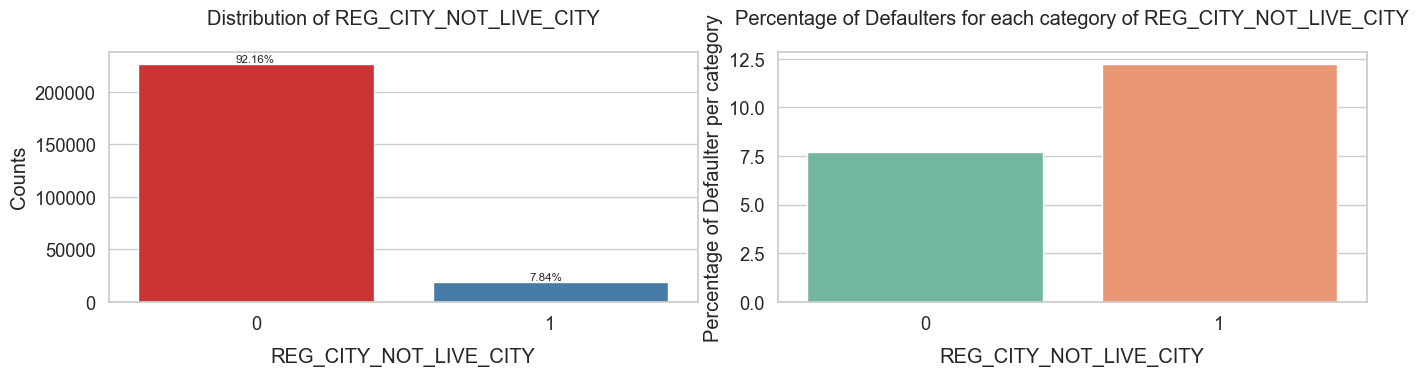

----------------------------------------------------------------------------------------------------
Total Number of unique categories of REG_REGION_NOT_WORK_REGION = 2


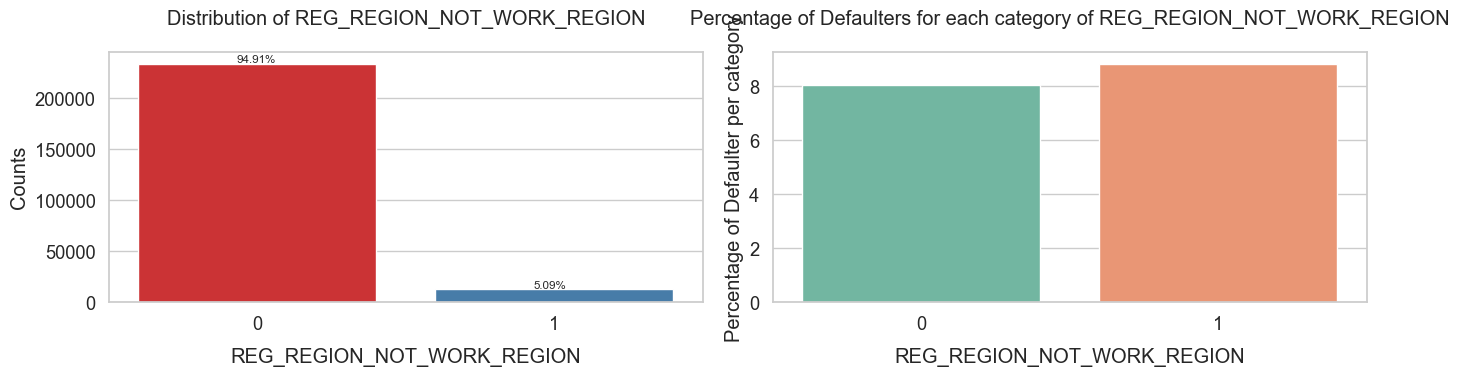

----------------------------------------------------------------------------------------------------
Total Number of unique categories of REG_CITY_NOT_WORK_CITY = 2


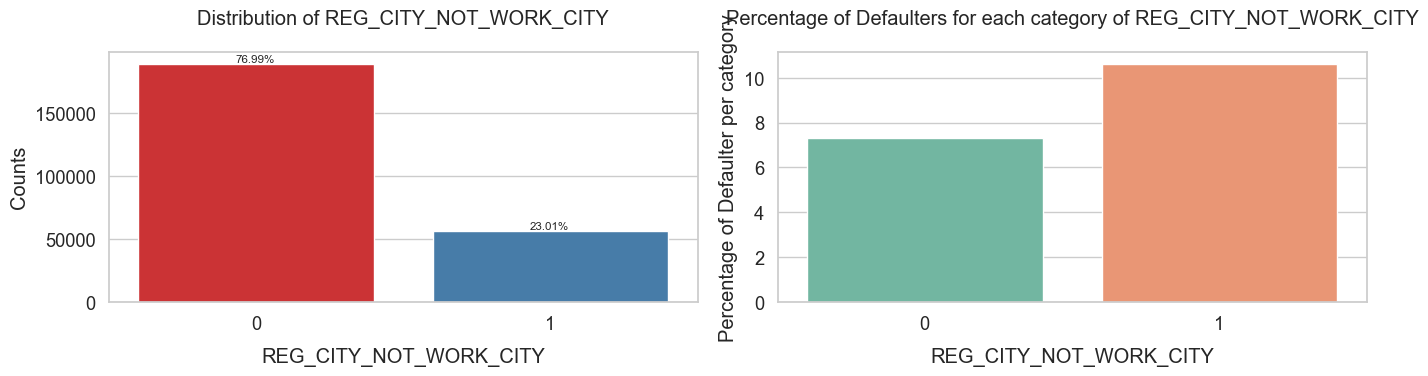

----------------------------------------------------------------------------------------------------
Total Number of unique categories of LIVE_REGION_NOT_WORK_REGION = 2


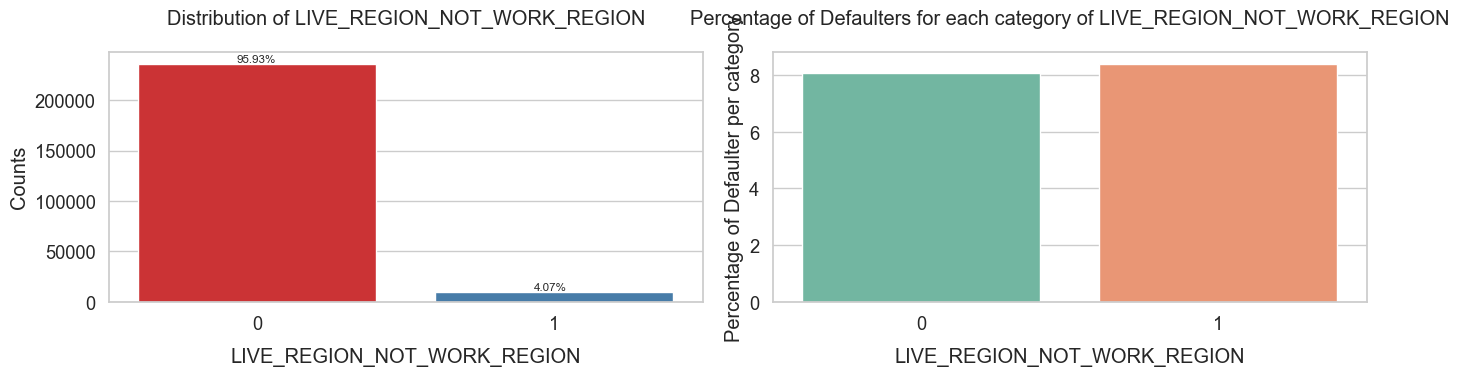

----------------------------------------------------------------------------------------------------
Total Number of unique categories of LIVE_CITY_NOT_WORK_CITY = 2


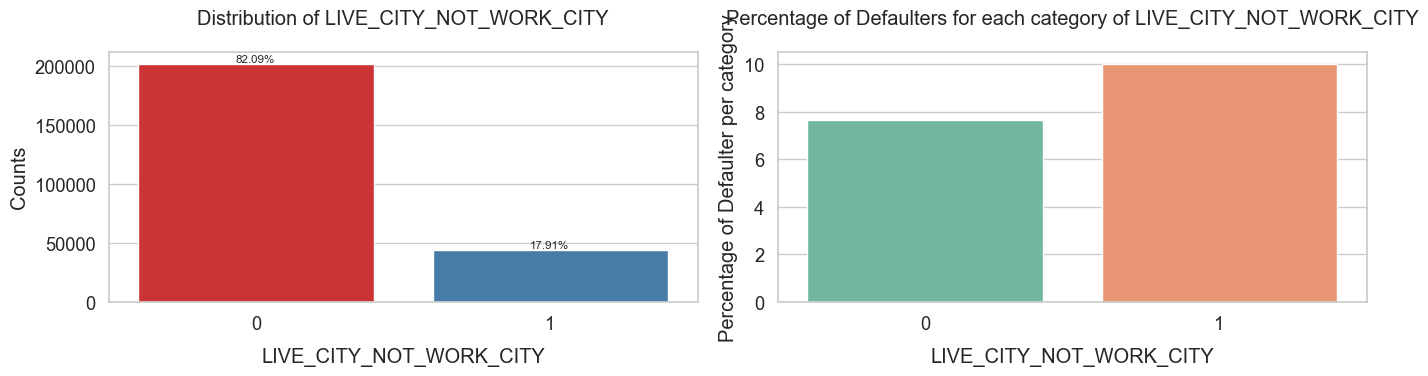

----------------------------------------------------------------------------------------------------


In [157]:

plot_categorical_variables_bar(application_train, column_name = 'REG_REGION_NOT_LIVE_REGION', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'REG_CITY_NOT_LIVE_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)

plot_categorical_variables_bar(application_train, column_name = 'REG_REGION_NOT_WORK_REGION', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'REG_CITY_NOT_WORK_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)

plot_categorical_variables_bar(application_train, column_name = 'LIVE_REGION_NOT_WORK_REGION', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'LIVE_CITY_NOT_WORK_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)

### Quan sát và Kết luận:

* Dựa trên những biểu đồ trên, có thể thấy rằng dù ở cấp độ region hay city thì có những điểm chung:

1. Trong số tất cả các ứng viên, chỉ có một số ít người có địa chỉ không khớp.
   - Đầu tiên, chỉ có 7.84% người có địa chỉ thường trú khác với địa chỉ liên hệ ở cấp độ thành phố, con số đó chỉ là 1.52% ở cấp khu vực.
   - Thứ hai, có khoảng 23.01% người có địa chỉ thường trú khác với địa chỉ làm việc ở cấp độ thành phố còn khu vực là 5.09%, đã cao hơn người có địa chỉ thường trú khác với địa chỉ liên hệ. Số lượng cao này có thể giải thích được, vì có thể họ làm việc ở khu vực khác so với địa chỉ thường trú.
   - Cuối cùng, có khoảng 17.91% người có địa chỉ liên hệ khác với địa chỉ làm việc ở cấp độ thành phố còn ở khu vực sẽ là 4.07% .

2. Nếu chúng ta xem xét đặc điểm của những người vỡ nợ, ta thấy rằng có xu hướng vỡ nợ cao nhất ở những người có địa chỉ thường trú và địa chỉ liên hệ khác nhau, tiếp theo là những người có địa chỉ thường trú và địa chỉ làm việc khác nhau, và cuối cùng là những người có địa chỉ làm việc và địa chỉ liên hệ khác nhau .
   - Đối với tất cả các trường hợp, thấy rằng xu hướng vỡ nợ của những người có địa chỉ khác nhau cao hơn những người có cùng địa chỉ. Điều này có nghĩa là sự khác biệt về địa chỉ có thể gợi ý về Rủi ro Vỡ nợ.

* Điểm khác biệt của 2 cấp độ đó là:
1. Cấp thành phố sẽ có tỉ lệ trùng địa chỉ nhiều hơn, hay có thể nói là cùng thành phố nhưng khác khu vực.

2. Cấp thành phố có tỉ lệ vỡ nợ chênh nhau hơn giữa cùng địa chỉ và khác địa chỉ.


#### k. Distribution of Categorical Variable 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'

In [158]:
a=df[
    (df['Row'] == 'REGION_RATING_CLIENT') |
    (df['Row'] == 'REGION_RATING_CLIENT_W_CITY') 
]['Description']
for desc in a:
    print(desc)


Our rating of the region where client lives (1,2,3)
Our rating of the region where client lives with taking city into account (1,2,3)


In [159]:
plot_categorical_variables_pie_and_bar(application_train, column_name = 'REGION_RATING_CLIENT')
print('-'*100)
plot_categorical_variables_pie_and_bar(application_train, column_name = 'REGION_RATING_CLIENT_W_CITY')
print('-'*100)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


### Quan sát và Kết luận:

Dựa trên các biểu đồ trên, ta thấy phân bố dù có thành phố hay không cũng gần giống nhau nên ta sẽ phân tích theo có thành phố:

1. **Từ biểu đồ tròn**:
   - Phần lớn khách hàng (**74.6%**) có đánh giá khu vực là **2**. Đây là giá trị trung bình dành cho hầu hết các ứng viên.
   - Rất ít khách hàng có đánh giá khu vực là **1** (**chỉ 11.1%**) và một số ít có đánh giá là **3** (**14.3%**).

2. **Trong số những khách hàng vỡ nợ**:
   - Hầu hết những người vỡ nợ có đánh giá khu vực là **3** (**11.4%**), cao hơn đáng kể so với hai mức còn lại.
   - Khách hàng có đánh giá **1** chỉ có tỷ lệ vỡ nợ là **4.84%**, trong khi khách hàng có đánh giá **2** có tỷ lệ là **7.92%**.

### Kết luận:
Điều này cho thấy rằng đánh giá khu vực **3** có thể là một thuộc tính quan trọng trong việc đưa ra quyết định về các đặc điểm vỡ nợ.


#### l. Distribution of Categorical Variable 'CODE_GENDER'

In [160]:
df[df['Row']=='CODE_GENDER']['Description']

3    Gender of the client
Name: Description, dtype: object

In [161]:

plot_categorical_variables_pie_and_bar(application_train, 'CODE_GENDER', hole = 0.5)
print('-'*100)

----------------------------------------------------------------------------------------------------


### Quan sát và Kết luận:

Phân phối của biến **CODE_GENDER** khá thú vị. Dưới đây là một số điểm cần lưu ý:

1. **Quan sát đầu tiên**:
   - Có 4 hàng trong bảng *application_train* có giá trị giới tính là **'XNA'**, không có ý nghĩa rõ ràng và có thể được xem như giá trị NaN.
   - Vì chỉ có 4 hàng này và chúng thuộc nhóm không vỡ nợ (*Non-Defaulter*), nên chúng ta có thể loại bỏ các hàng này mà không ảnh hưởng lớn đến dữ liệu.

2. **Từ biểu đồ thứ nhất**:
   - Trong tập dữ liệu, số lượng ứng viên nữ chiếm ưu thế (**65.8%**) so với nam (**34.2%**).

3. **Từ biểu đồ thứ hai**:
   - Mặc dù số lượng ứng viên nữ cao hơn, nhưng tỷ lệ vỡ nợ của nam (**10.15%**) lại cao hơn nữ (**7%**).

### Kết luận:
Dựa trên tập dữ liệu này, có thể kết luận rằng ứng viên nam có xu hướng vỡ nợ cao hơn so với nữ.


#### m. Distribution of Categorical Variables 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE'

In [162]:
a=df[
    (df['Row'] == 'FLAG_MOBIL') |
    (df['Row'] == 'FLAG_EMP_PHONE') |
    (df['Row'] == 'FLAG_WORK_PHONE') |
    (df['Row'] == 'FLAG_CONT_MOBILE') |
    (df['Row'] == 'FLAG_PHONE') 
   ]['Description']
for desc in a:
    print(desc)


Did client provide mobile phone (1=YES, 0=NO)
Did client provide work phone (1=YES, 0=NO)
Did client provide home phone (1=YES, 0=NO)
Was mobile phone reachable (1=YES, 0=NO)
Did client provide home phone (1=YES, 0=NO)


##### ! Có 2 biến bị trùng ý nghĩa

In [163]:
plot_categorical_variables_pie_and_bar(application_train, column_name = 'FLAG_MOBIL', hole = 0.5)
print('-'*100)
plot_categorical_variables_pie_and_bar(application_train, column_name = 'FLAG_EMP_PHONE', hole = 0.5)
print('-'*100)
plot_categorical_variables_pie_and_bar(application_train, column_name = 'FLAG_WORK_PHONE', hole = 0.5)
print('-'*100)
plot_categorical_variables_pie_and_bar(application_train, column_name = 'FLAG_CONT_MOBILE', hole = 0.5)
print('-'*100)
plot_categorical_variables_pie_and_bar(application_train, column_name = 'FLAG_PHONE', hole = 0.5)
print('-'*100)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


### Quan sát và Kết luận:

Từ những biểu đồ trên, chúng ta thấy rằng:
- Rõ ràng nhất có thể thấy tất cả mọi người đều cung cấp số điện thoại và hầu hết số điện thoại đều liên lạc được (99.8%), điều gây bất ngờ nhất là tỉ lệ vỡ nợ của người có số điện thoại không liên lạc được lại thấp hơn - nhưng 1 phần do mẫu cũng quá nhỏ nên cần cân nhắc thêm.
- Ngoài ra chúng ta thấy hầu hết mọi người sẽ cung cấp số điện thoại làm việc.


#### n. Distribution of Categorical Variables 'FLAG_DOCUMENT_2' to 'FLAG_DOCUMENT_21'

In [164]:

columns_to_check = [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]

a = df[df['Row'].isin(columns_to_check)]['Description']

for desc in a:
    print(desc)

Did client provide document 2
Did client provide document 3
Did client provide document 4
Did client provide document 5
Did client provide document 6
Did client provide document 7
Did client provide document 8
Did client provide document 9
Did client provide document 10
Did client provide document 11
Did client provide document 12
Did client provide document 13
Did client provide document 14
Did client provide document 15
Did client provide document 16
Did client provide document 17
Did client provide document 18
Did client provide document 19
Did client provide document 20
Did client provide document 21


Total Number of unique categories of FLAG_DOCUMENT_2 = 2


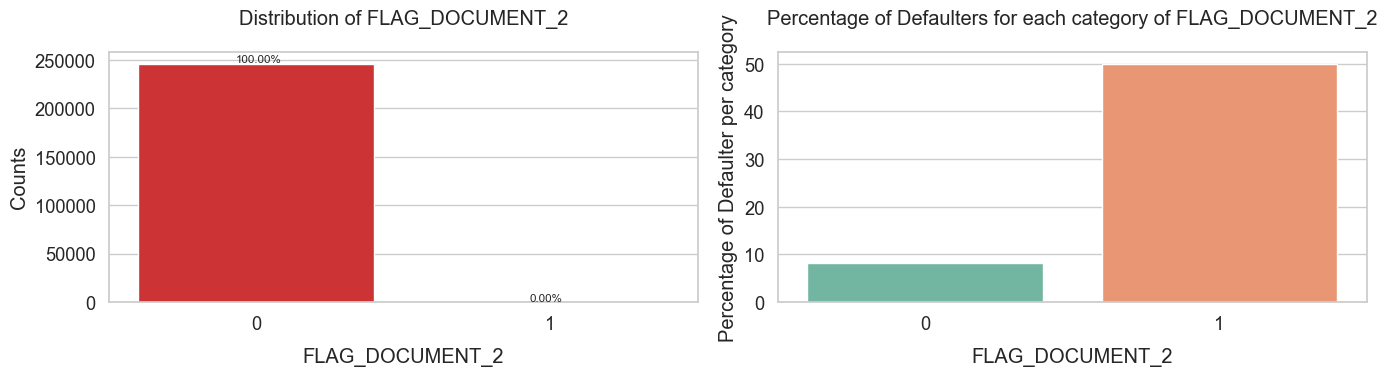

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_3 = 2


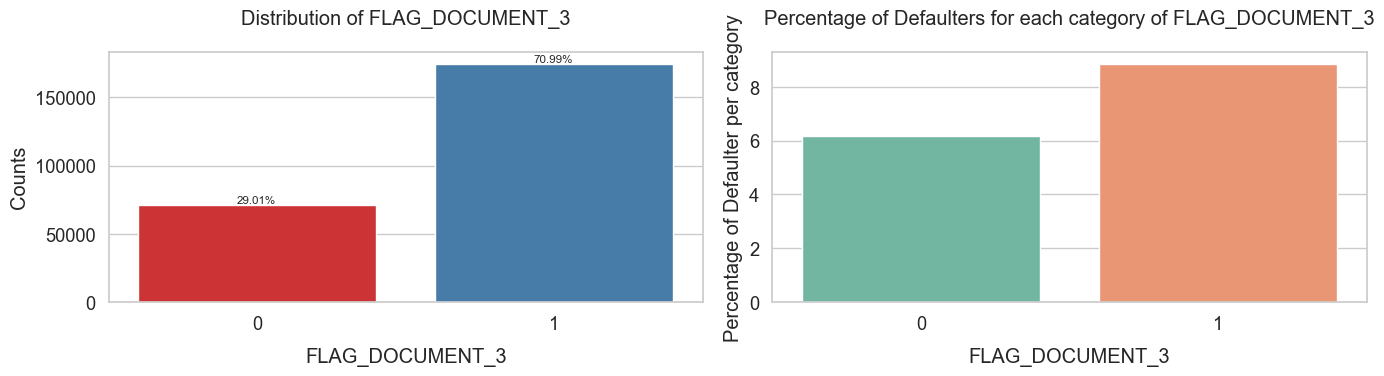

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_4 = 2


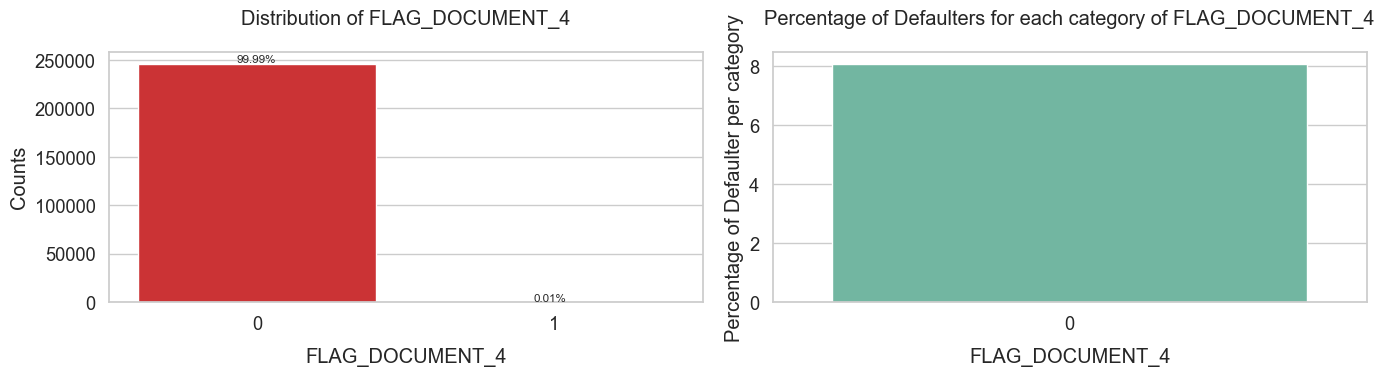

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_5 = 2


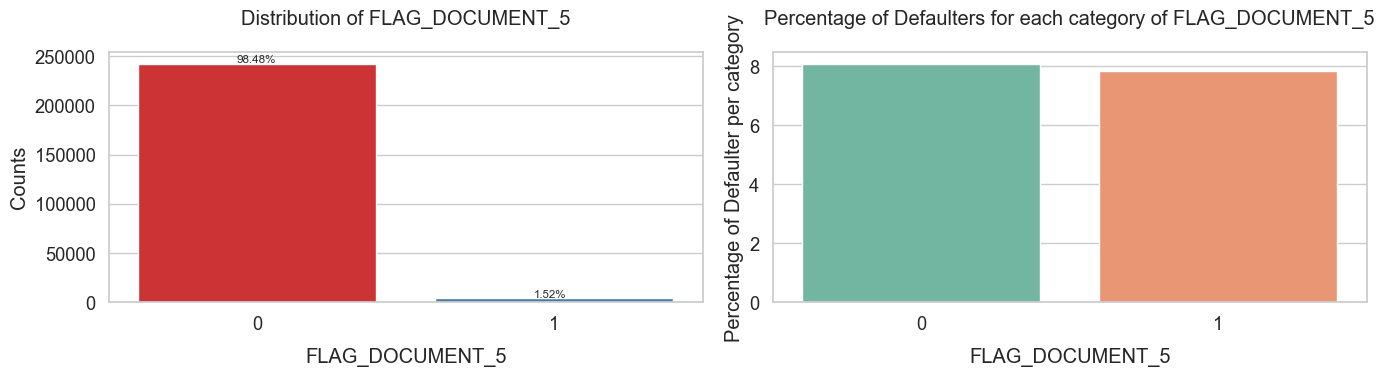

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_6 = 2


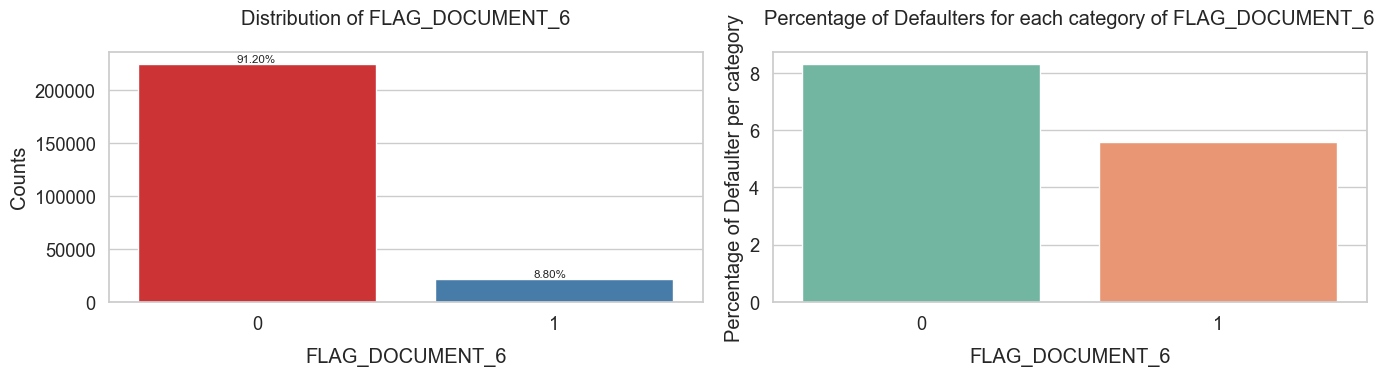

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_7 = 2


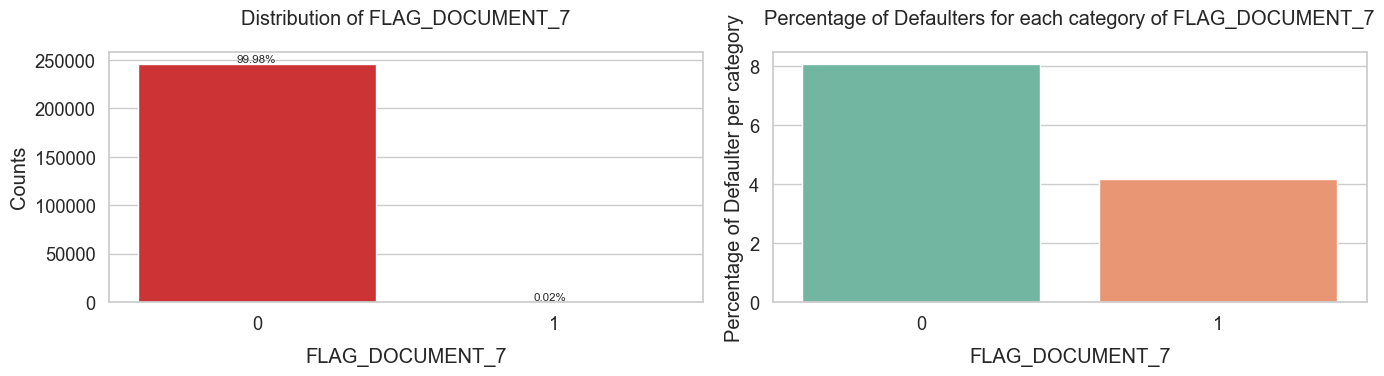

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_8 = 2


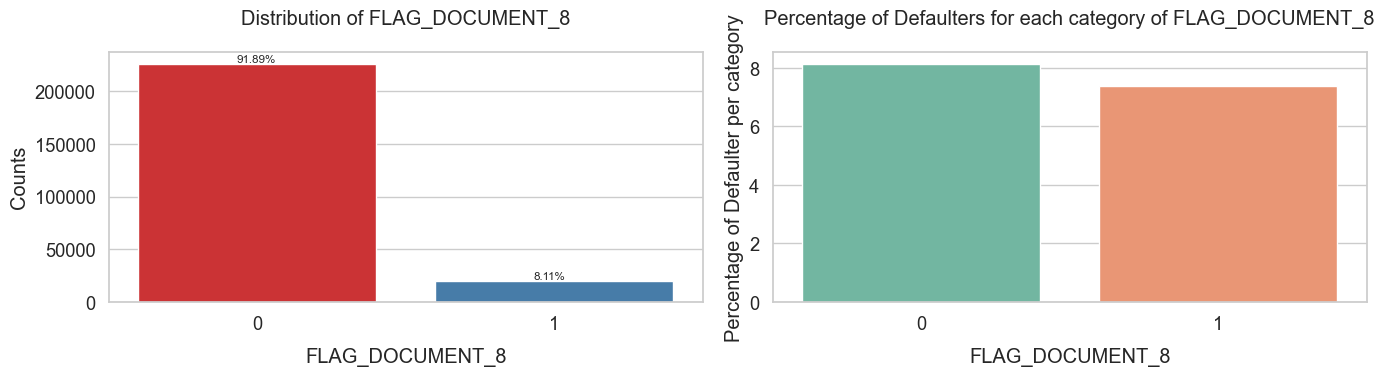

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_9 = 2


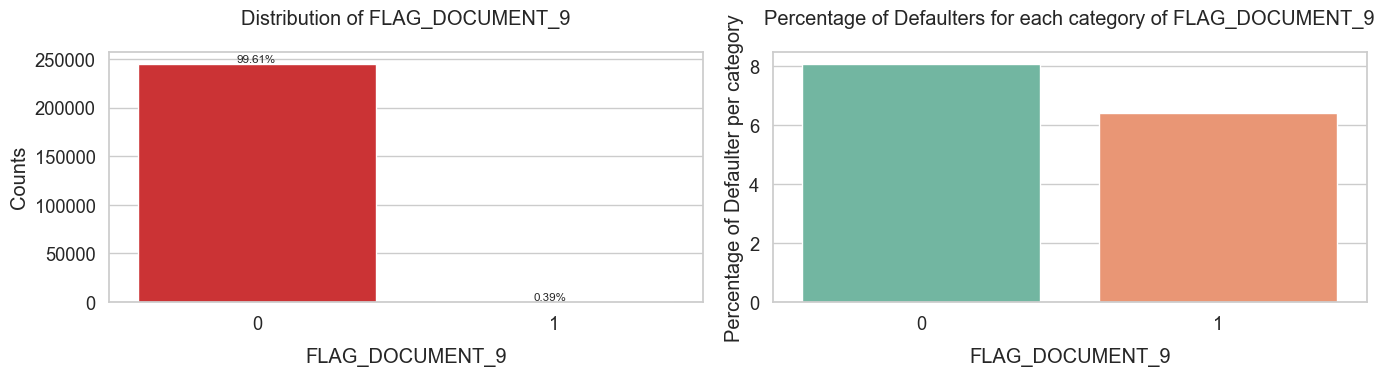

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_10 = 2


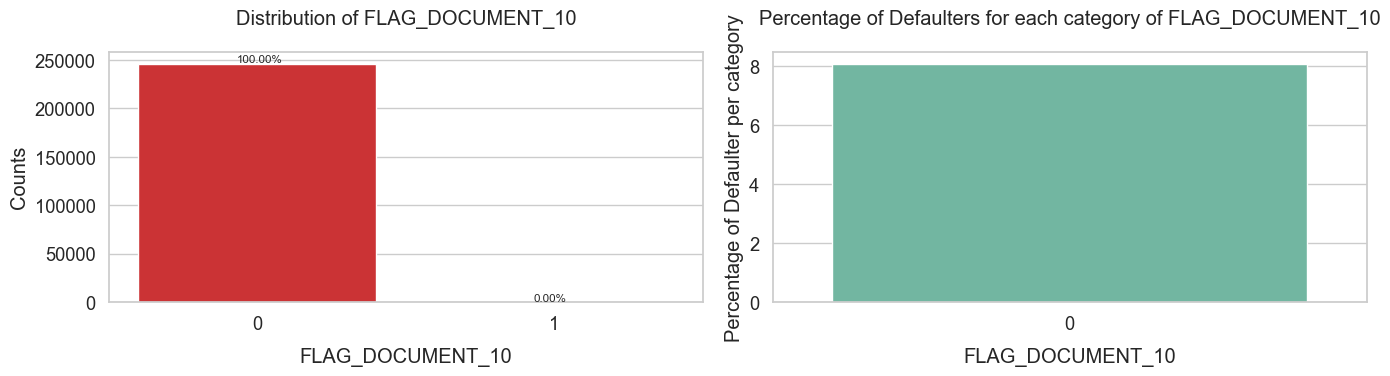

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_11 = 2


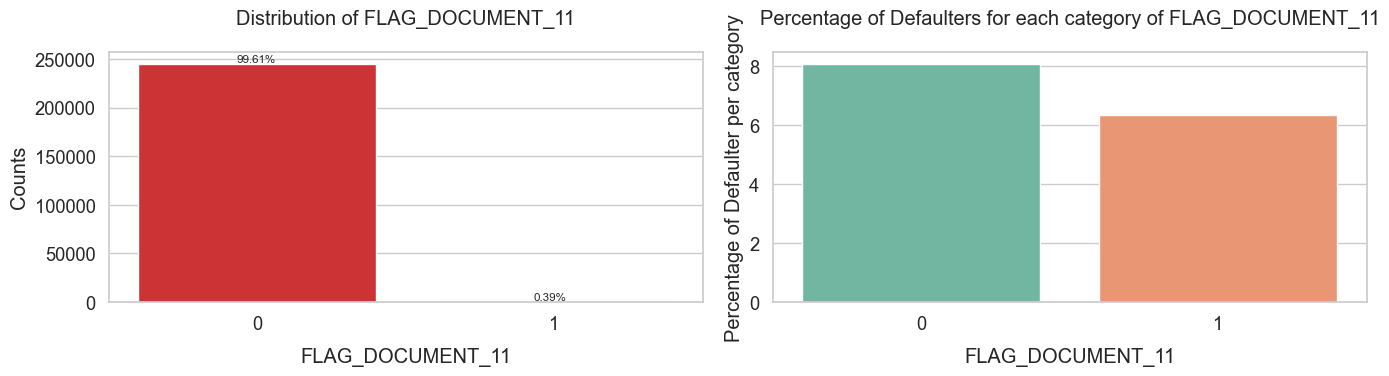

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_12 = 2


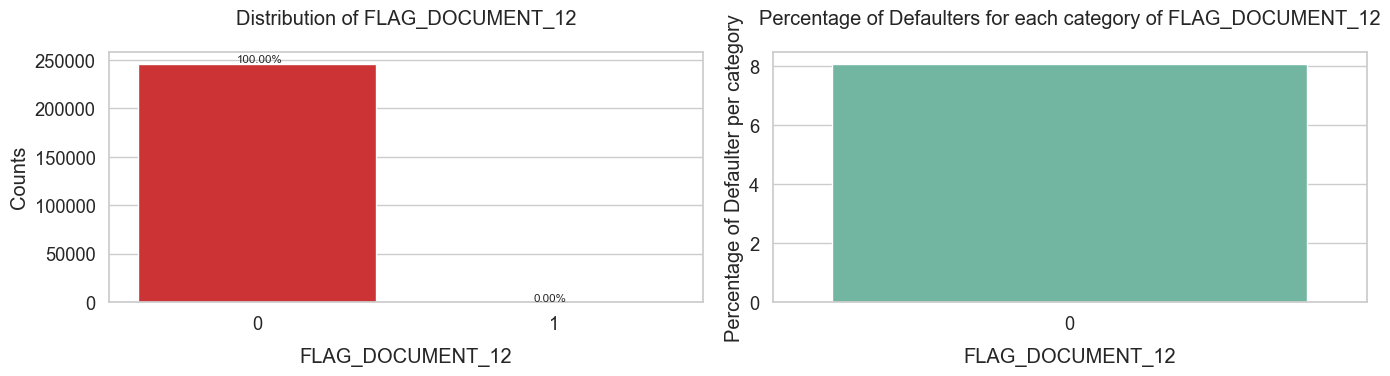

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_13 = 2


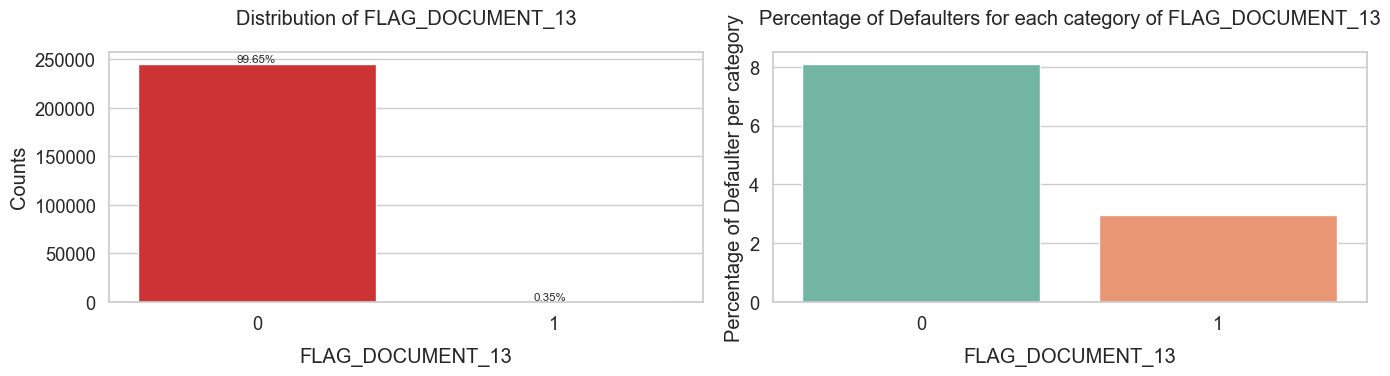

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_14 = 2


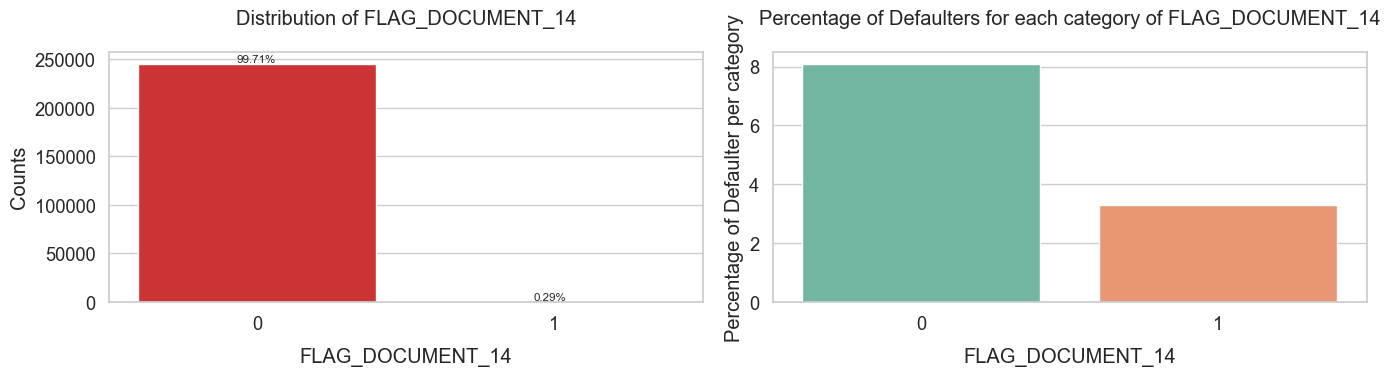

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_15 = 2


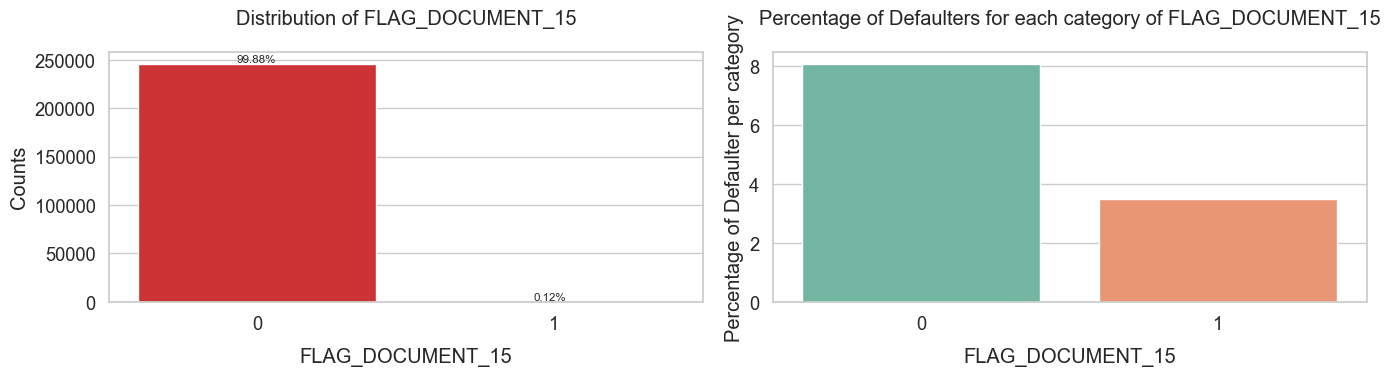

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_16 = 2


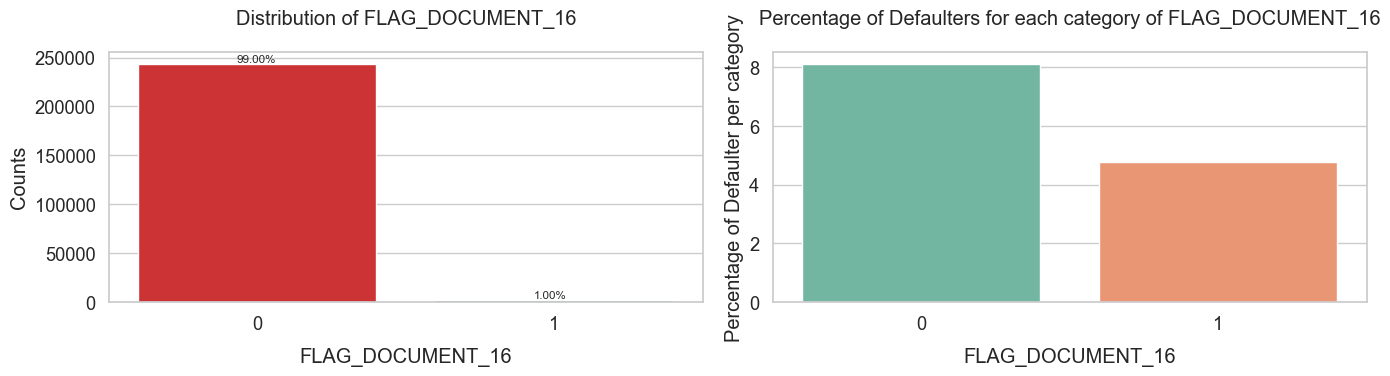

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_17 = 2


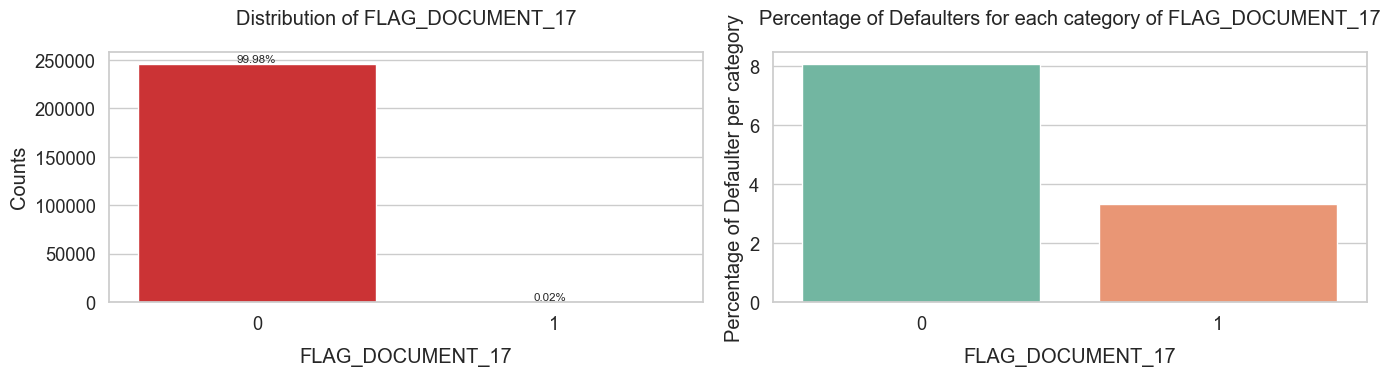

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_18 = 2


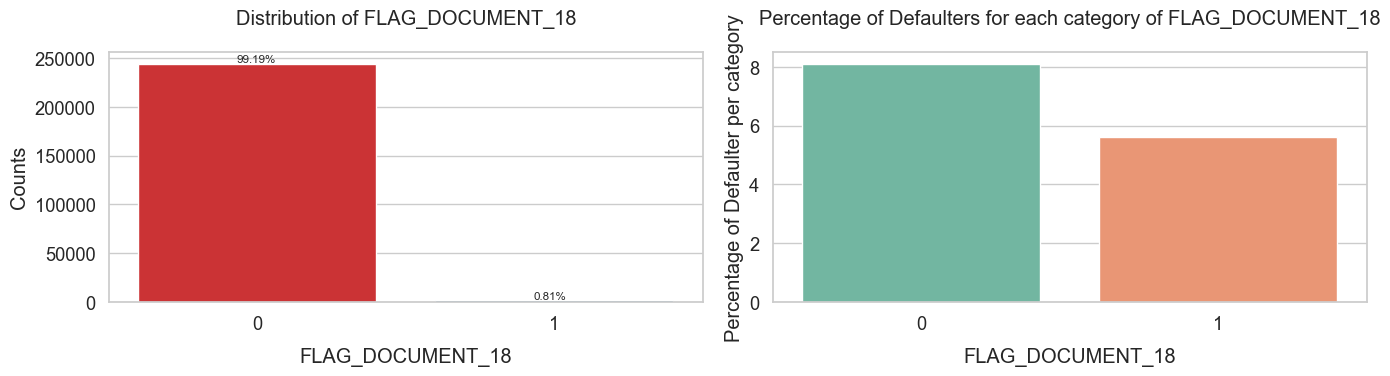

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_19 = 2


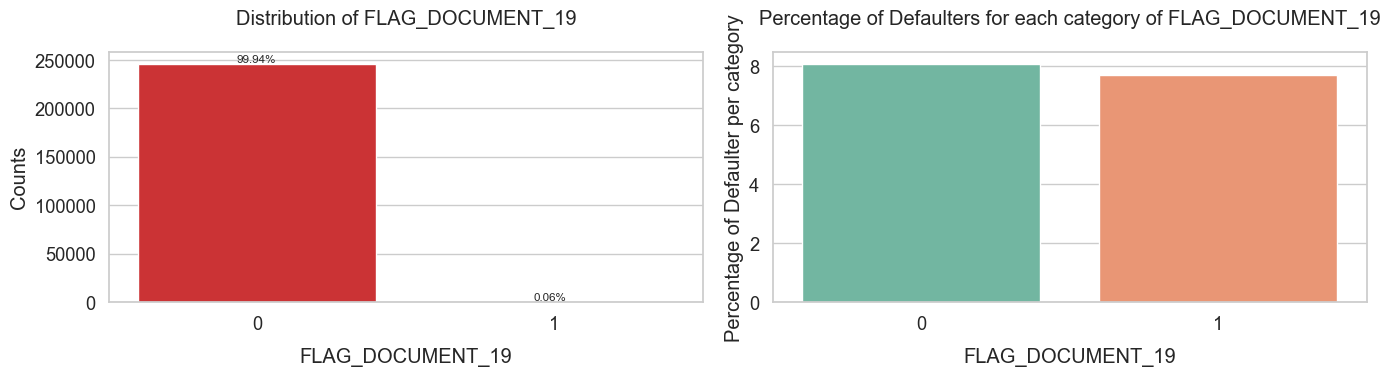

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_20 = 2


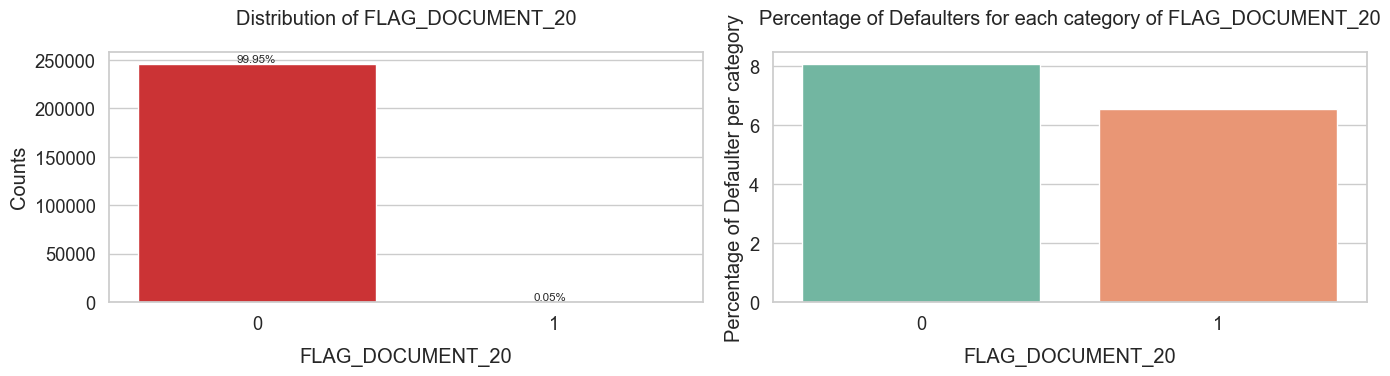

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_DOCUMENT_21 = 2


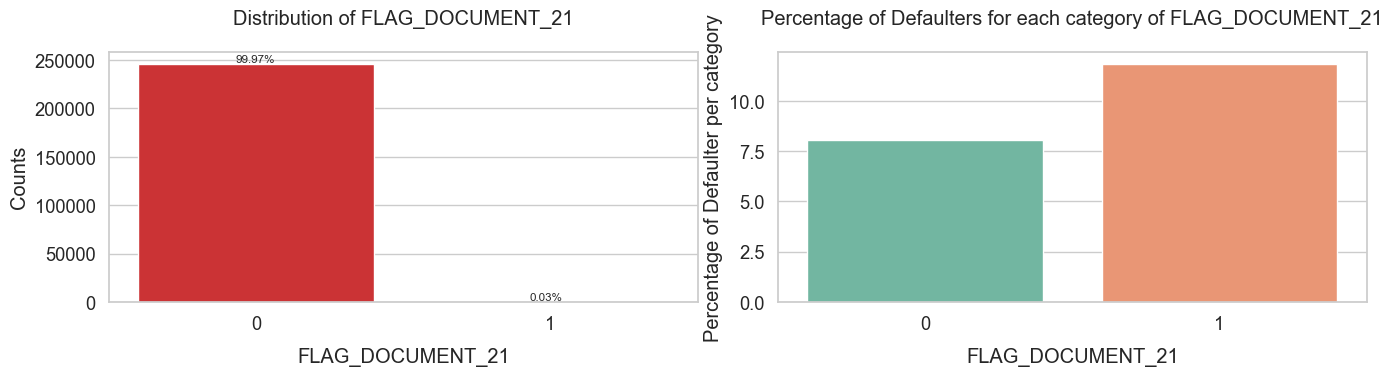

----------------------------------------------------------------------------------------------------


In [165]:
for column in columns_to_check:
    plot_categorical_variables_bar(application_train, column_name = column, figsize = (14, 4), horizontal_adjust = 0.33)
    print('-' * 100)  

### Quan sát và Kết luận:

Từ những biểu đồ trên, chúng ta thấy rằng:
1. Trừ tài liệu 3 ra thì mọi người hầu hết đều cung cấp tài liệu còn lại(từ 92% đến 100%)--> khả năng cao đây là những tài liệu bắt buộc, trong đó ta thấy:
 - Chỉ có tài liệu 2 và 21 là người nộp có xu hướng ít phá sản hơn. --> Tài liệu mang ý nghĩa khá tích cực
 - Tài liệu 5 và 19 thì có tỉ lệ phá sản khá cân bằng nên k có quá nhiều ý nghĩa.
 - Còn lại có thế thấy các tại liệu còn lại thì người nộp sẽ có xu hướng phá sản cao hơn. --> Tài liệu mang ý nghĩa tiêu cực
 Tuy nhiên cũng có khả năng không chính xác (khá nhỏ) khi đây mới chỉ là suy đoán khi dữ liệu khá lệch.

2. Riêng về tài liệu 3, có thể thấy hết các khách hàng không cung cấp tài liệu này (~71%) và chỉ có 29,01% đã cung cấp, và những người đã cung cấp tài liệu này có tỷ lệ vỡ nợ cao hơn so với những người không cung cấp. --> mang ý nghĩa khá tiêu cực


 #### n. Distribution of Categorical Variables 'FLAG_EMAIL'

In [166]:
df[df['Row']=='FLAG_EMAIL']['Description']

27    Did client provide email (1=YES, 0=NO)
Name: Description, dtype: object

Total Number of unique categories of FLAG_EMAIL = 2


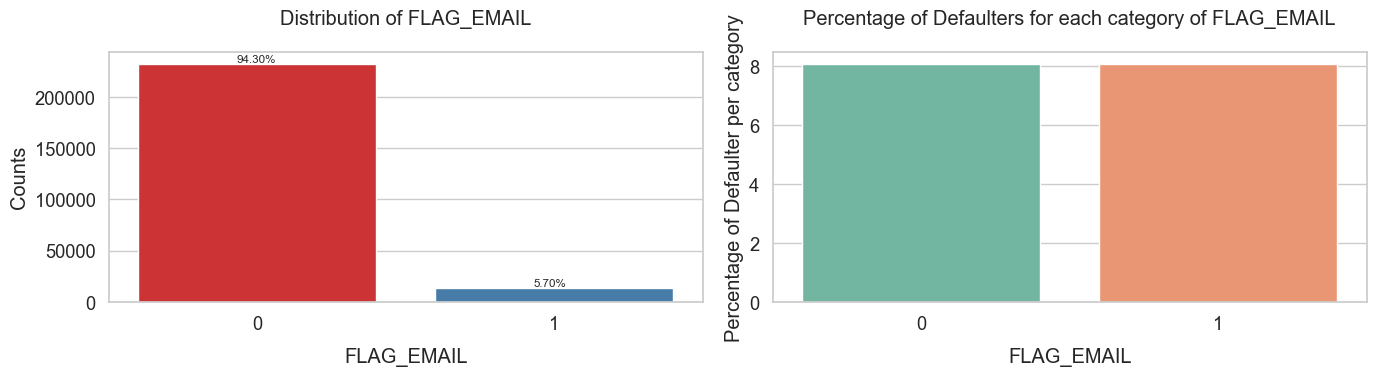

----------------------------------------------------------------------------------------------------


In [167]:
plot_categorical_variables_bar(application_train, column_name = 'FLAG_EMAIL', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)

### Quan sát và Kết luận:

Từ những biểu đồ trên, chúng ta thấy rằng:
1. Hầu hết mọi người không cung cấp email(94.3%).

2. Tỉ lệ vỡ nợ cũng khá cân bằng giữa cung cấp hay không cung cấp. --> Không quá có ý nghĩa


#### o. Distribution of Categorical Variables 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' 

In [168]:
df[(df['Row']=='FLAG_OWN_CAR') | (df['Row']=='FLAG_OWN_REALTY')]['Description']

4          Flag if the client owns a car
5    Flag if client owns a house or flat
Name: Description, dtype: object

Total Number of unique categories of FLAG_OWN_REALTY = 2


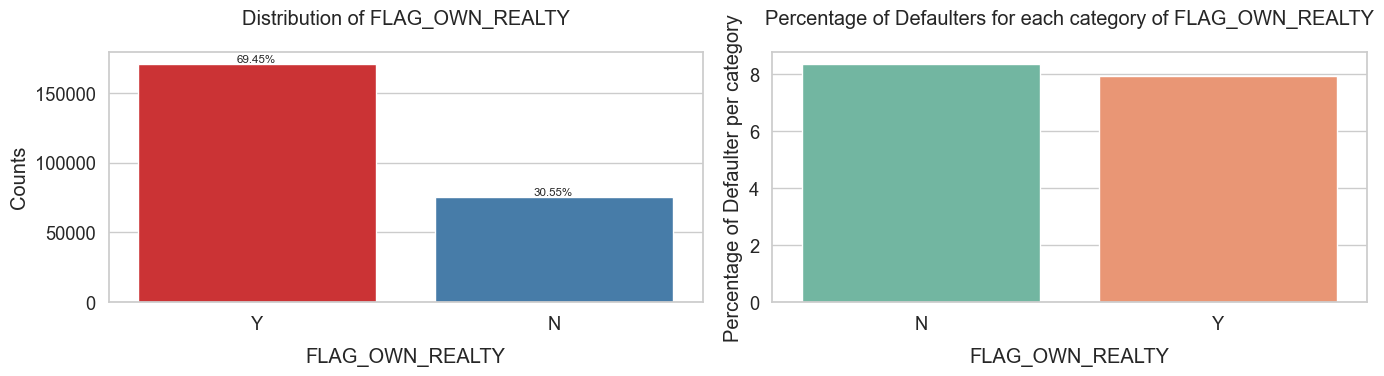

----------------------------------------------------------------------------------------------------
Total Number of unique categories of FLAG_OWN_CAR = 2


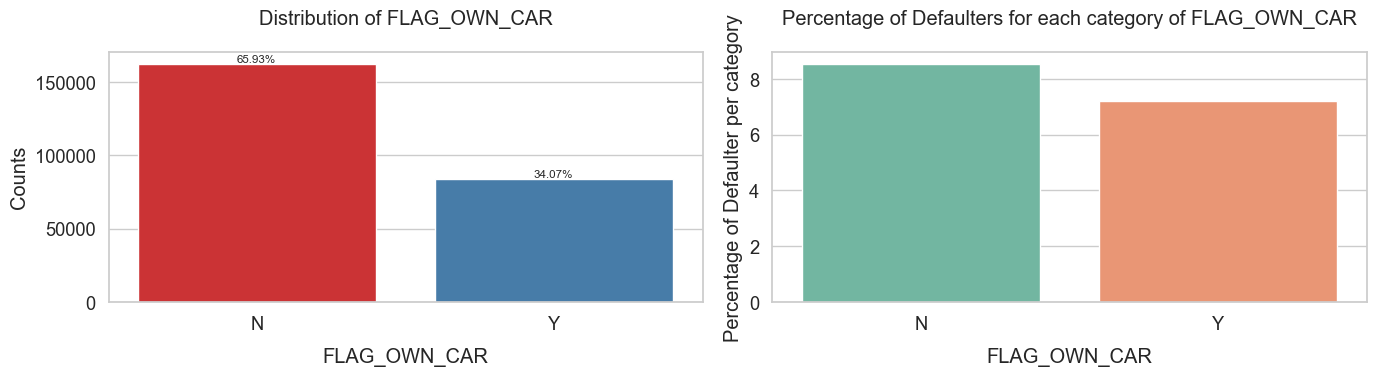

----------------------------------------------------------------------------------------------------


In [169]:
plot_categorical_variables_bar(application_train, column_name = 'FLAG_OWN_REALTY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'FLAG_OWN_CAR', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)


### Quan sát và Kết luận:

Từ những biểu đồ trên, chúng ta thấy rằng:
1. Ở 2 chart đầu ta thấy nhóm sở hữu bất động sản nhiều hơn gấp đôi nhóm không sở hữu nhưng có thể thấy việc sở hữu bất động sản hay không không phản ánh quá nhiều đến việc phá sản hay không khi chông chênh quá nhiều (đều quanh 8%), tất nhiên việc sở hữu bất động sản vẫn có tỉ lệ thấp hơn 1 chút.

2. Trái lại ở 2 chart sau, người không sở hữu ô tô nhiều hơn gần gấp đôi nhóm không sở hữu. Và 1 điểm nữa là nó thể hiện rõ ràng rằng người sở hữu ô tô có tỉ lệ phá sản thấp hơn so với không có (7% so vơi gần 9%).

--> Như vậy nhóm sở hữu ô tô thường là nhóm sở hữu tài chính tốt hơn.



#### q. Distribution of Categorical Variable 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'

In [170]:
a =  df[(df['Row']=='FONDKAPREMONT_MODE') | (df['Row']=='HOUSETYPE_MODE') | (df['Row']=='WALLSMATERIAL_MODE') | (df['Row']=='EMERGENCYSTATE_MODE')]['Description']
for des in a:
    print (des)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, liv

Total Number of unique categories of FONDKAPREMONT_MODE = 5


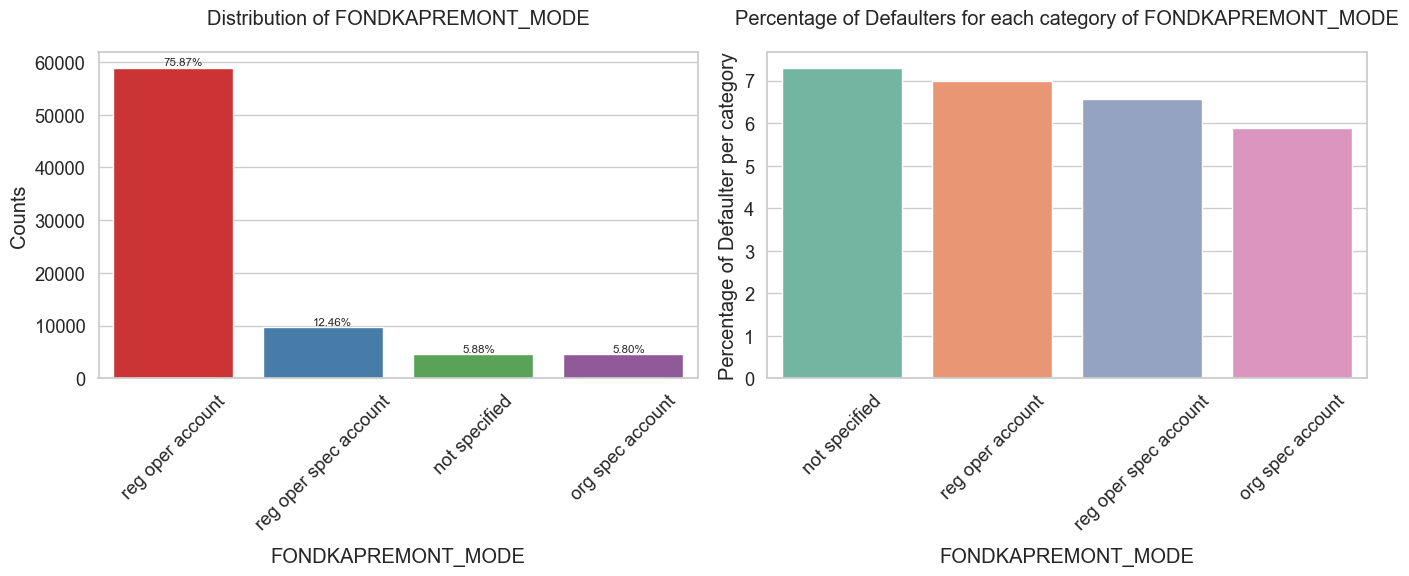

----------------------------------------------------------------------------------------------------
Total Number of unique categories of HOUSETYPE_MODE = 4


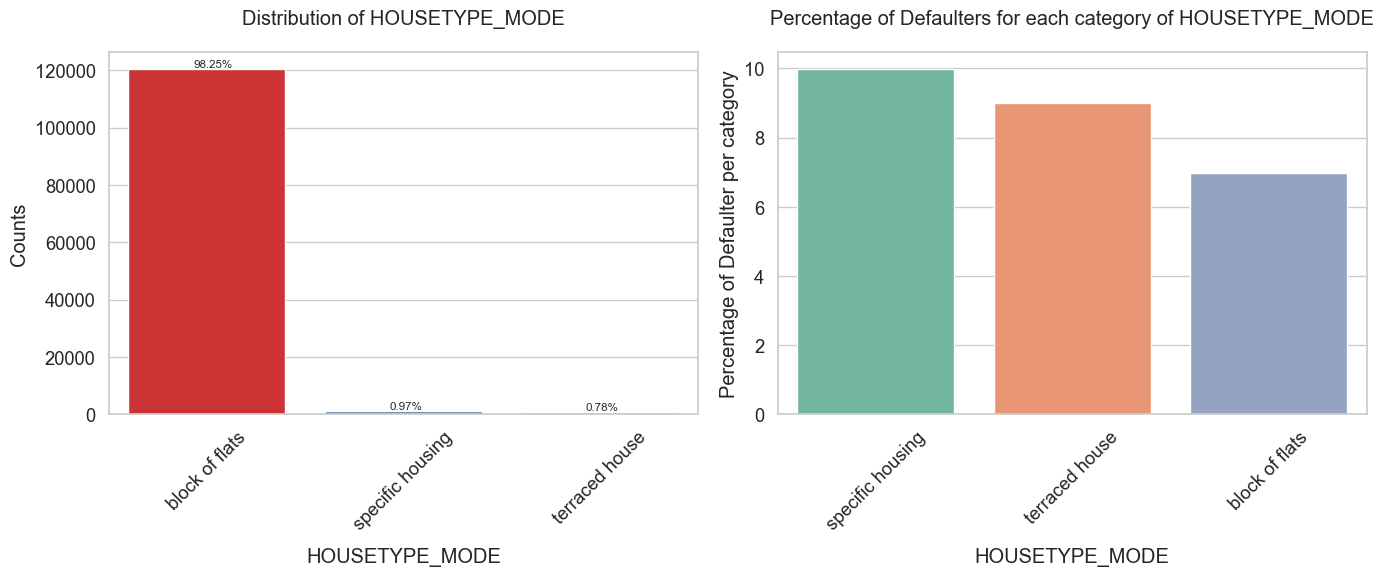

----------------------------------------------------------------------------------------------------
Total Number of unique categories of WALLSMATERIAL_MODE = 8


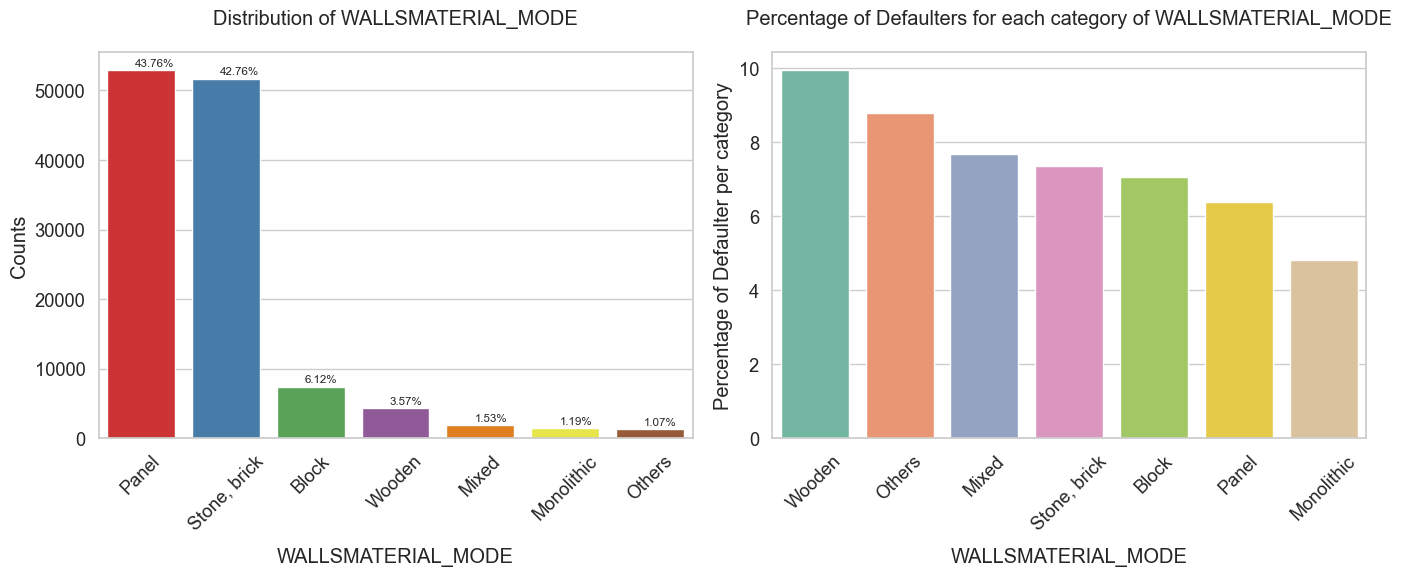

----------------------------------------------------------------------------------------------------
Total Number of unique categories of EMERGENCYSTATE_MODE = 3


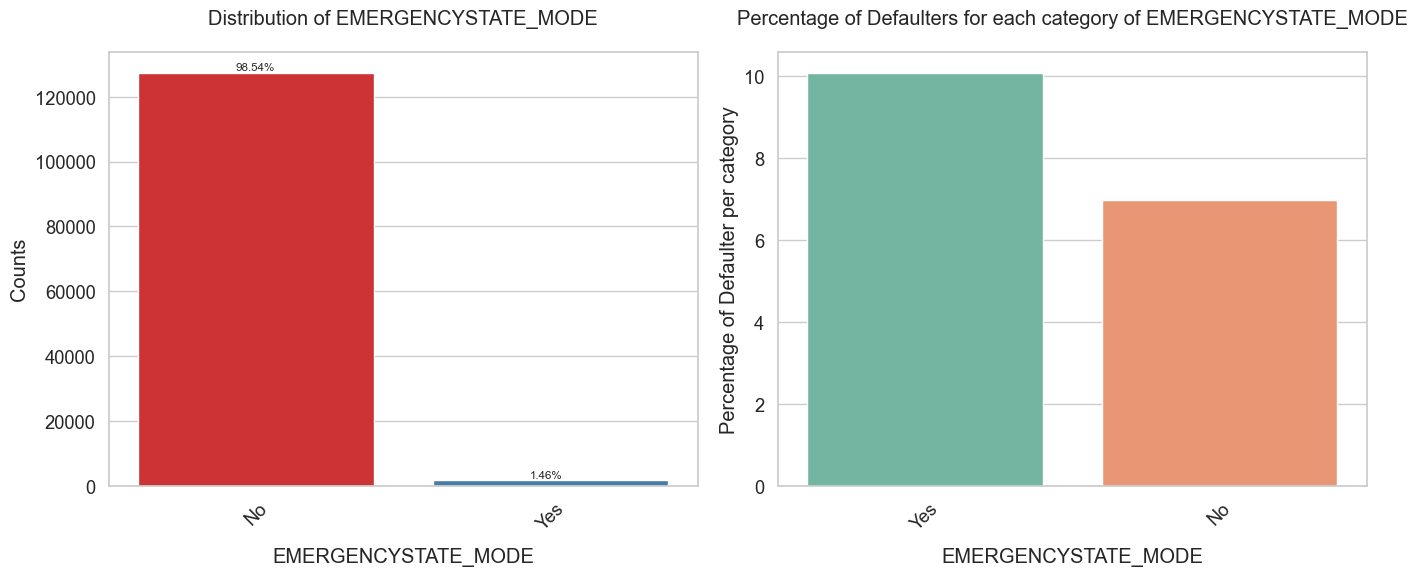

----------------------------------------------------------------------------------------------------


In [171]:
plot_categorical_variables_bar(application_train, column_name = 'FONDKAPREMONT_MODE', figsize = (14, 6),rotation= 45, horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'HOUSETYPE_MODE', figsize = (14, 6),rotation= 45, horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'WALLSMATERIAL_MODE' ,figsize = (14, 6),rotation= 45, horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'EMERGENCYSTATE_MODE', figsize = (14, 6),rotation= 45, horizontal_adjust = 0.33)
print('-'*100)

### Quan sát và Kết luận:

Dựa trên 8 biểu đồ trên, có thể rút ra những nhận xét sau:

1. Quỹ sửa chữa nhà (FONDKAPREMONT_MODE):
    * reg oper account là lựa chọn phổ biến nhất trong dữ liệu, trong khi org spec account là ít phổ biến nhất. Có một tỷ lệ nhỏ dữ liệu bị thiếu (not specified).
    * Tỷ lệ vỡ nợ cao nhất thuộc nhóm không cung cấp thông tin (not specified), điều này có thể là dấu hiệu của sự rủi ro cao hơn.Nhóm org spec account có tỷ lệ vỡ nợ thấp nhất, điều này cho thấy đây có thể là lựa chọn an toàn hơn về mặt tín dụng. 
    --> Nhìn chung không có quá nhiều ý nghĩa khi phân bố khá sát nhau.

2. Mô hình nhà ở (HOUSETYPE_MODE)
    * Hầu hết khách hàng sống trong "block of flats" (các tòa chung cư), chiếm tới 98.25%. Một số nhỏ sống trong "terraced house" (nhà liền kề), chiếm 0.78%, và "specific housing" (nhà ở cụ thể), chiếm 0.97%.--> Điều này cho thấy đa phần khách hàng thuộc nhóm dân cư đô thị, sống trong các tòa chung cư, phù hợp với đặc điểm của các khu vực đô thị hóa.
    * Khách hàng sống trong "specific housing" có tỷ lệ vỡ nợ cao nhất, gần 10%. Khách hàng sống trong "terraced house" có tỷ lệ vỡ nợ thấp hơn một chút, nhưng vẫn cao hơn so với nhóm "block of flats". Khách hàng sống trong "block of flats" tỷ lệ vỡ nợ thấp nhất trong các nhóm, nhưng vẫn đáng chú ý vì nhóm này chiếm phần lớn dữ liệu. 

3. Chất liệu làm nhà ('WALLSMATERIAL_MODE')
    * Loại vật liệu phổ biến nhất: "Panel" (Tấm lắp ghép) (43.76%) và "Stone, brick" (Đá, gạch) (42.76%) là hai loại vật liệu xây dựng phổ biến nhất được sử dụng. Loại ít phổ biến: Các loại khác như "Block" (Khối xây) (6.12%), "Wooden" (Gỗ) (3.57%), "Mixed" (Hỗn hợp) (1.53%), "Monolithic" (Nguyên khối) (1.19%), và "Others" (Khác) (1.07%) có tỷ lệ thấp hơn nhiều. --> Điều này phản ánh rằng đa số khách hàng sống trong các công trình được xây dựng bằng vật liệu hiện đại như "Tấm lắp ghép" và "Đá, gạch".
    * Tỷ lệ vỡ nợ cao nhất là gỗ với gần 10 % và thấp nhất là nguyên khối với chỉ chưa đến 5%. -->Nhóm nguy cơ cao: Khách hàng sống trong các ngôi nhà xây bằng gỗ ("Wooden") và các loại vật liệu khác ít phổ biến hơn ("Others", "Mixed") có nguy cơ vỡ nợ cao hơn. Điều này có thể liên quan đến điều kiện kinh tế hoặc mức độ ổn định của các nhóm dân cư này. Nhóm an toàn hơn: Nhà xây bằng vật liệu hiện đại như "Panel" (Tấm lắp ghép), "Stone, brick" (Đá, gạch), và đặc biệt là "Monolithic" (Nguyên khối) có xu hướng ổn định hơn về mặt tài chính.

#### r. Distribution of Categorical Variable 'WEEKDAY_APPR_PROCESS_START'

In [172]:
df[df['Row']=='WEEKDAY_APPR_PROCESS_START']['Description']

32                 On which day of the week did the client apply for the loan
181    On which day of the week did the client apply for previous application
Name: Description, dtype: object

Total Number of unique categories of WEEKDAY_APPR_PROCESS_START = 7


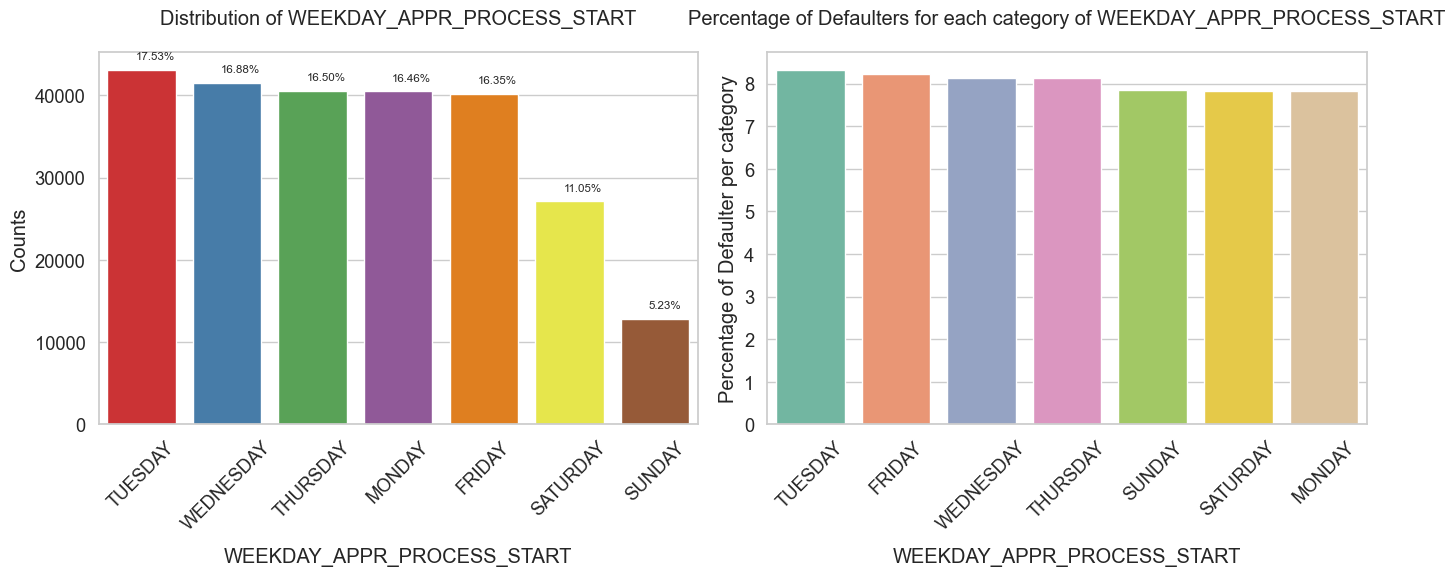

----------------------------------------------------------------------------------------------------


In [173]:
plot_categorical_variables_bar(application_train, column_name = 'WEEKDAY_APPR_PROCESS_START', figsize = (14, 6),rotation= 45, horizontal_adjust = 0.33)
print('-'*100)

### Quan sát và Kết luận:

- Dựa trên 2 biểu đồ trên, có thể rút ra những nhận xét sau:

  * Các ngày trong tuần phổ biến nhất: Ngày Thứ Ba (Tuesday) chiếm tỷ lệ cao nhất với 17.53%. Tiếp theo là các ngày Thứ Tư (Wednesday), Thứ Năm (Thursday), Thứ Hai (Monday) và Thứ Sáu (Friday) với tỷ lệ tương đối gần nhau, từ 16.35% đến 16.88%. Ngày ít phổ biến: Chủ Nhật (Sunday) có tỷ lệ thấp nhất (5.23%), tiếp theo là Thứ Bảy (Saturday) với 11.05%. --> Đa số các yêu cầu được thực hiện vào ngày làm việc trong tuần (Monday–Friday), điều này có thể liên quan đến giờ hành chính hoặc thời gian làm việc của khách hàng.
  
  * Tất cả các ngày trong tuần đều có tỷ lệ vỡ nợ tương tự nhau, dao động trong khoảng 7–8%, không có sự khác biệt đáng kể. --> Dù có sự khác biệt lớn trong số lượng yêu cầu giữa các ngày, tỷ lệ vỡ nợ lại không thay đổi nhiều, điều này cho thấy thời điểm nộp đơn không ảnh hưởng lớn đến khả năng vỡ nợ.

### 7. Plotting Continuous/Numeric Variables

### Phân tích các biến liên tục

Để phân tích các biến liên tục, chúng ta sẽ sử dụng bốn loại biểu đồ theo nhu cầu, bao gồm **Distplot**, **CDF**, **Box-Plot** và **Violin Plot**.

#### 1. DistPlots (Biểu đồ mật độ phân bố)
- Distplot được sử dụng để hiển thị Hàm Mật độ Xác suất (PDF) của biến liên tục.
- Biểu đồ này giúp chúng ta phân tích khu vực mà phần lớn dữ liệu tập trung.

#### 2. CDF (Hàm phân phối tích lũy)
- CDF được sử dụng như phần mở rộng của PDF để xem tỷ lệ phần trăm dữ liệu nằm dưới một giá trị ngưỡng nhất định.
- Điều này cung cấp cho chúng ta ước lượng tốt về phân phối của phần lớn dữ liệu.

#### 3. Box-Plots (Biểu đồ hộp)
- Box-plot hữu ích khi chúng ta muốn phân tích toàn bộ phạm vi giá trị của biến liên tục.
- Nó hiển thị các phân vị thứ 25, 50 và 75 trong một biểu đồ duy nhất.
- Ngoài ra, nó còn cung cấp thông tin liên quan đến sự xuất hiện của các giá trị ngoại lai (outliers) trong tập dữ liệu.

#### 4. Violin-Plots (Biểu đồ violin)
- Violin-plot kết hợp các đặc điểm của cả Distplot và Box-Plot.
- Theo chiều dọc, nó mô phỏng Box-plot và hiển thị các phân vị, phạm vi giá trị.
- Theo chiều ngang, nó thể hiện PDF của biến liên tục.


#### a. Distribution of Discrete Variable 'CNT_CHILDREN'

In [174]:
df[df['Row']=='CNT_CHILDREN']['Description']

6    Number of children the client has
Name: Description, dtype: object

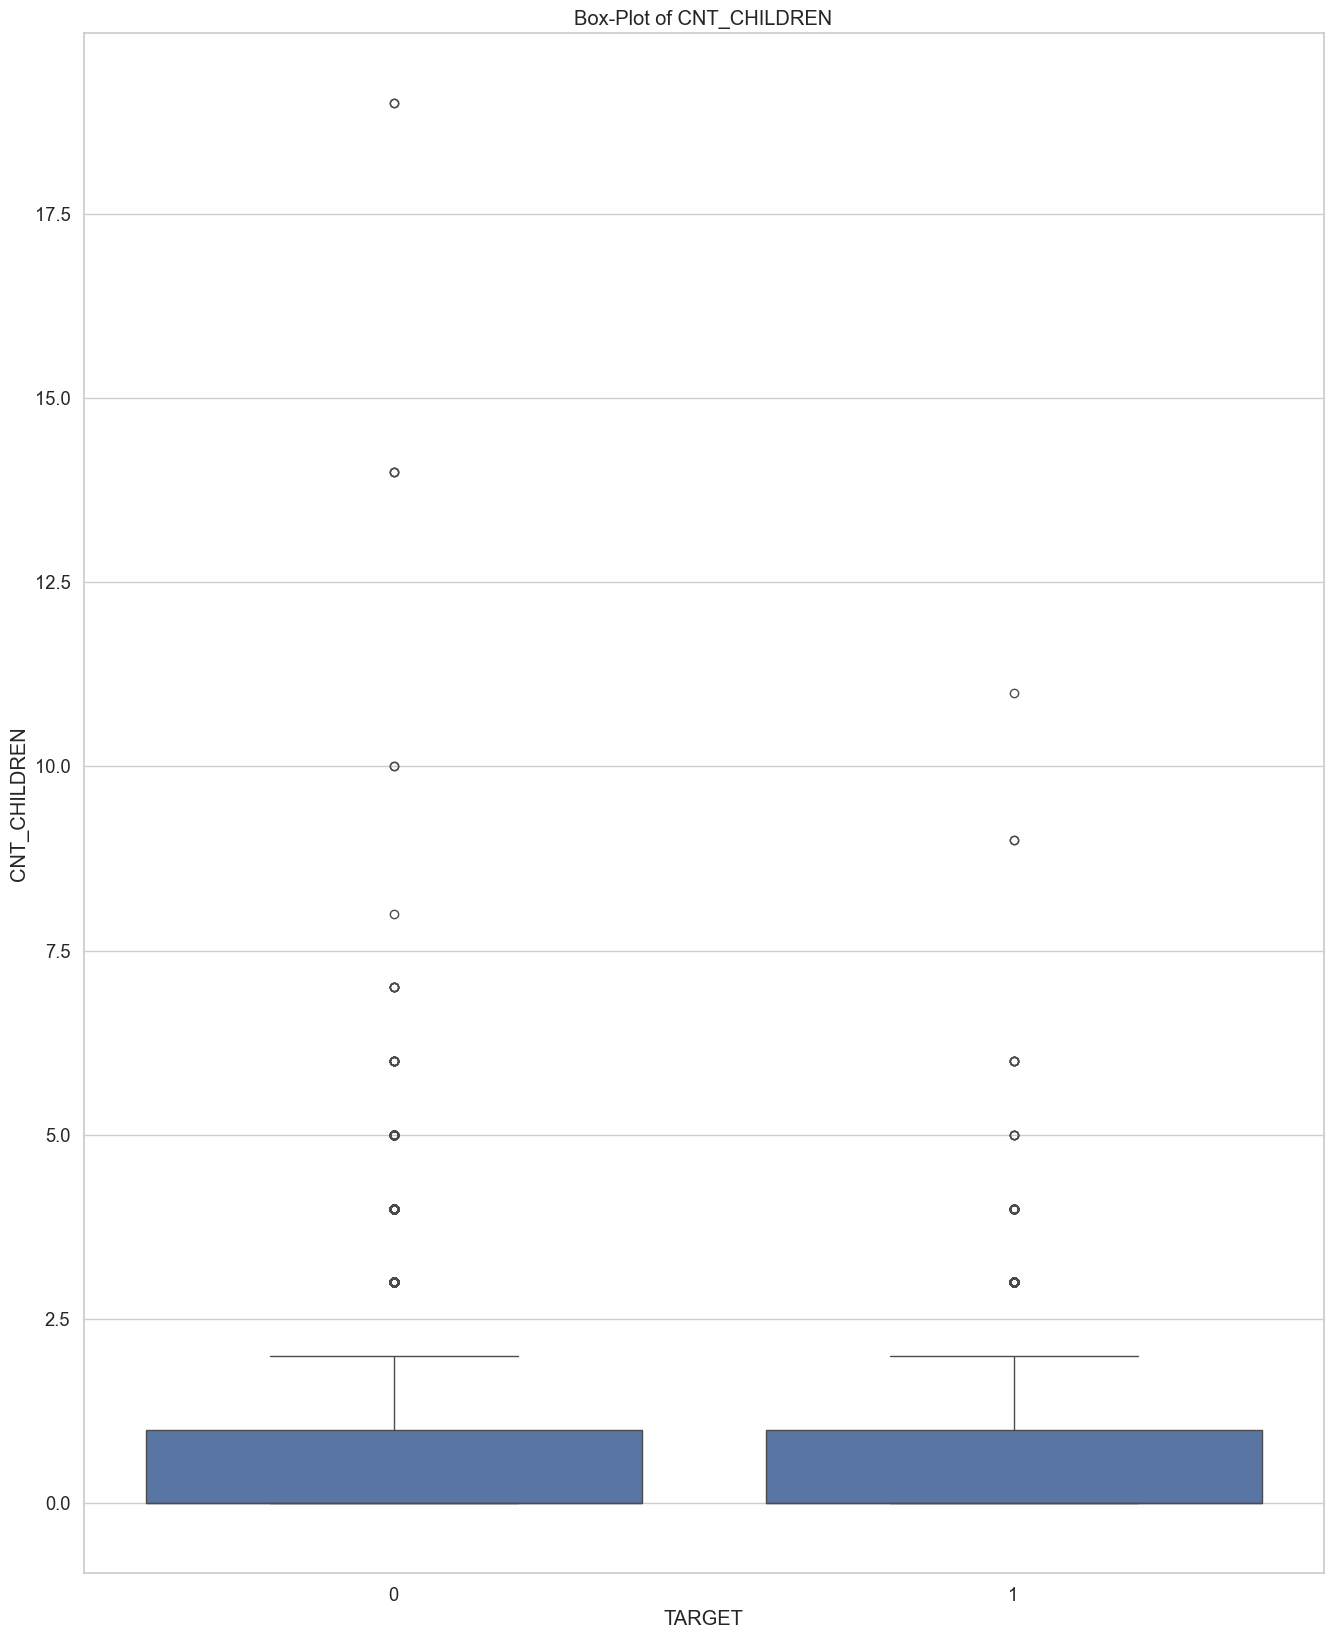

----------------------------------------------------------------------------------------------------


In [175]:
plot_continuous_variables(application_train, 'CNT_CHILDREN', plots = [ 'box'], figsize = (16,20))
print('-'*100)

### Quan sát và Kết luận:

- Dựa theo biểu đồ trên, có thể rút ra những nhận xét sau:

  * Biến này không có quá nhiều ý nghĩa trong việc phân định khách hàng vỡ nợ hay không khi phân bố giống nhau.
  
  * Điều duy nhất chúng ta có thể rút ra từ biểu đồ này đó là các outliers.

#### b. Distribution of Continuous Variable 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [176]:
columns_to_check =['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
a = df[df['Row'].isin(columns_to_check)]['Description']
for des in a:
    print (des)

Income of the client
Credit amount of the loan
Loan annuity
For consumer loans it is the price of the goods for which the loan is given
Annuity of the Credit Bureau credit
Annuity of previous application
Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
Goods price of good that client asked for (if applicable) on the previous application


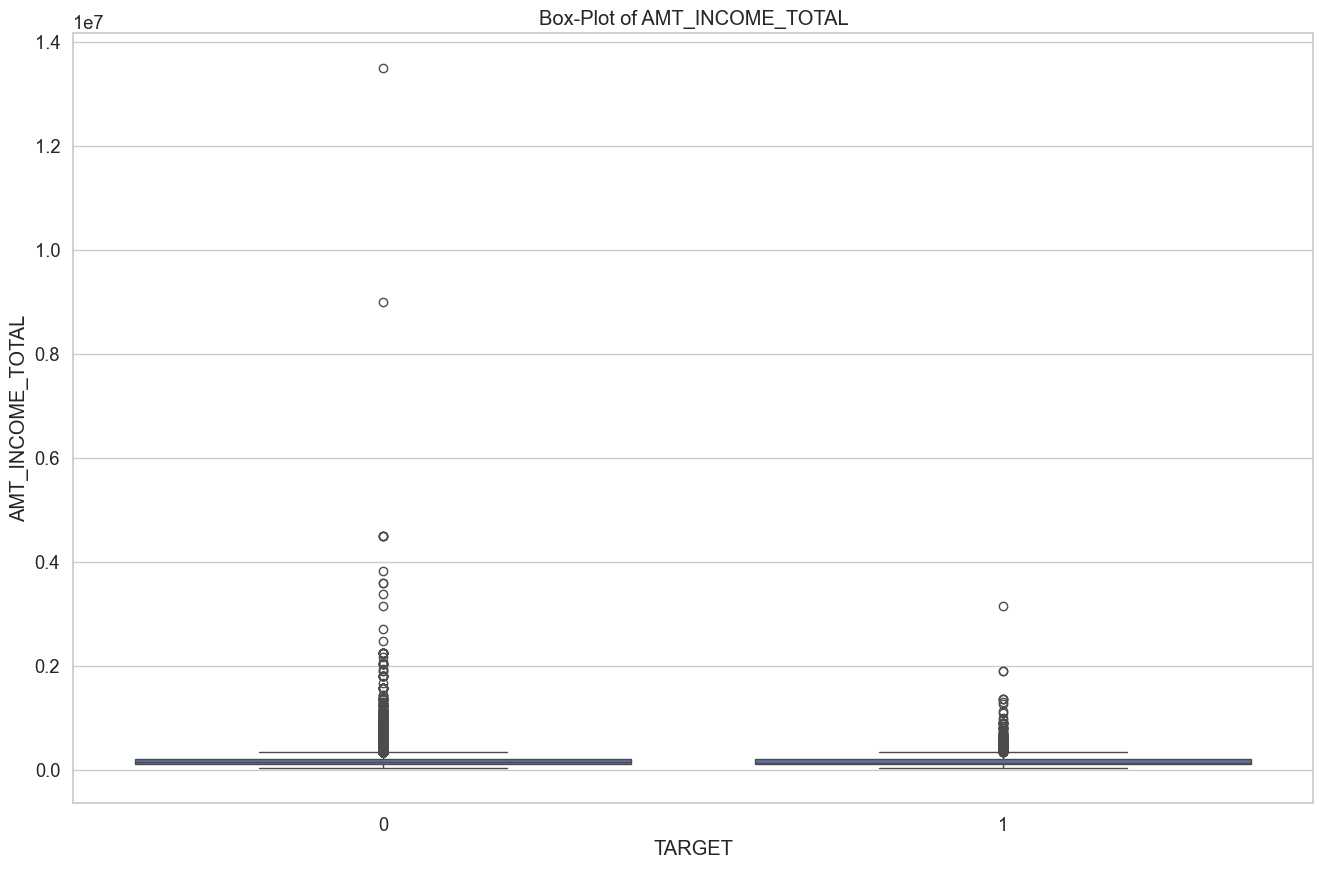

----------------------------------------------------------------------------------------------------


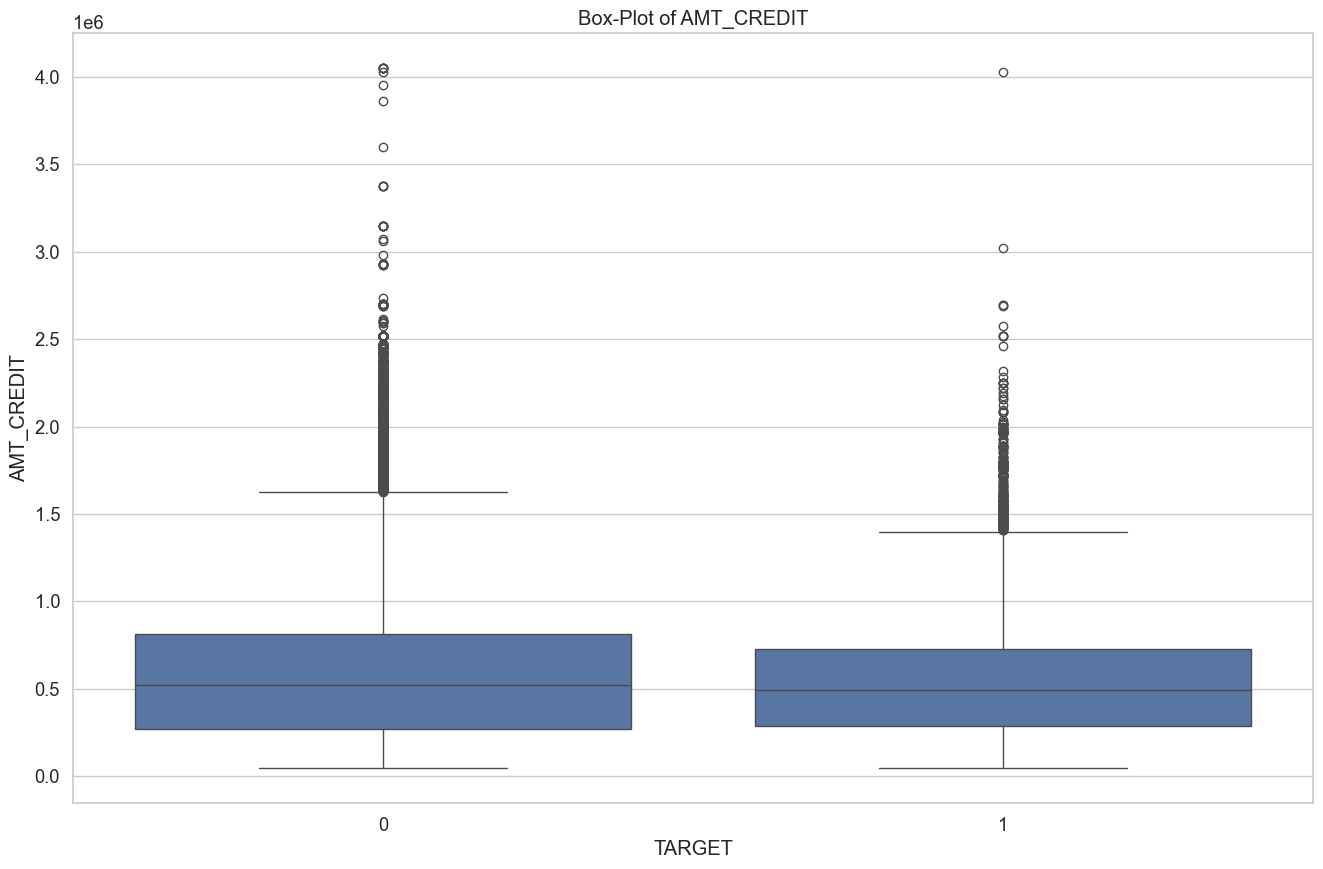

----------------------------------------------------------------------------------------------------


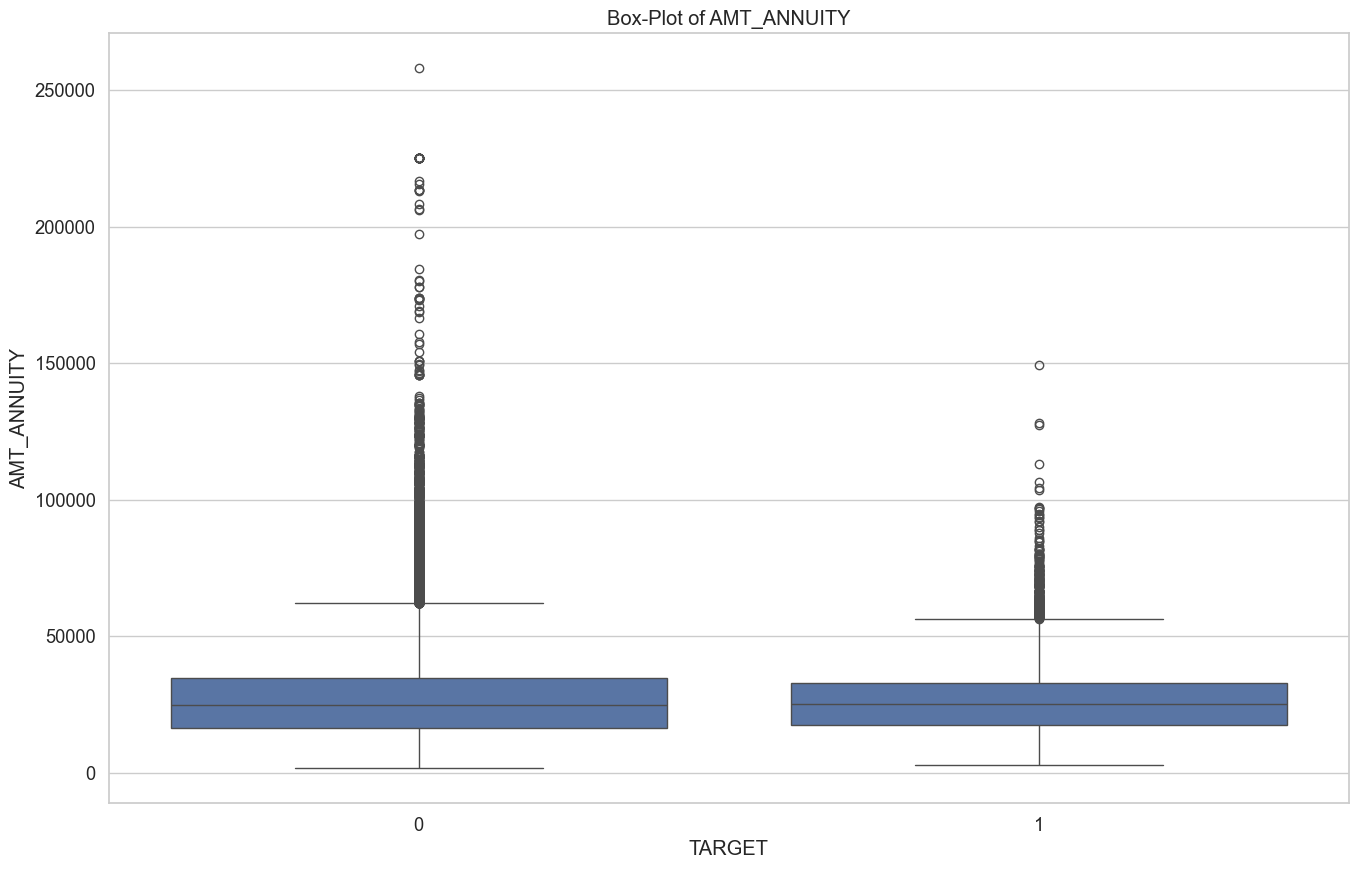

----------------------------------------------------------------------------------------------------


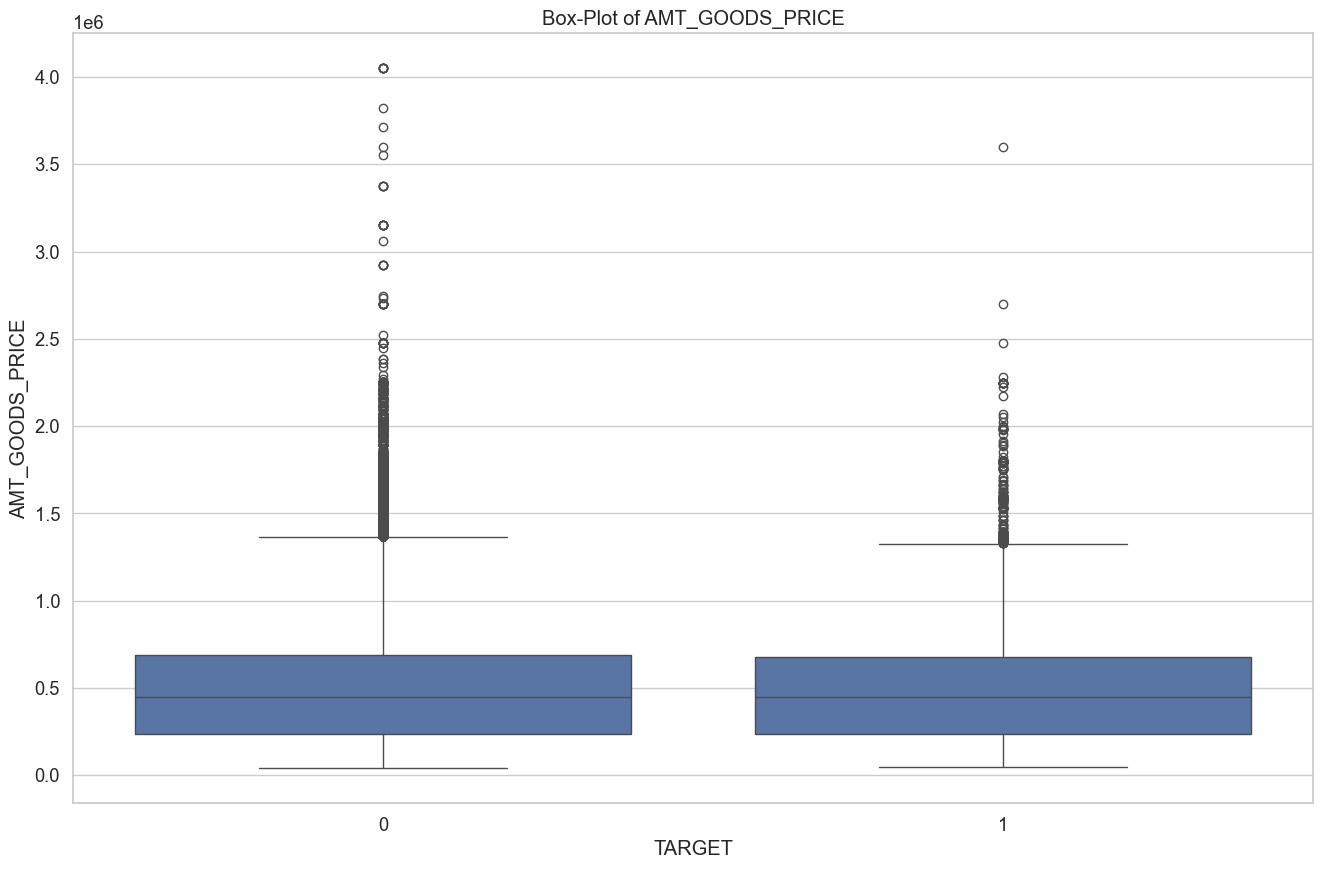

----------------------------------------------------------------------------------------------------


In [177]:
for column in columns_to_check:
    plot_continuous_variables(application_train, column_name = column, plots = ['box'], figsize = (16,10))
    print('-'*100)
    

### Quan sát và Kết luận:

Dựa trên các biểu đồ trên, có thể rút ra những nhận xét sau:

1. Thu nhập của khách hàng 'AMT_INCOME_TOTAL':
    Không rút ra được quá nhiều vì phân bố khá giống nhau, chỉ thấy có xuất hiện outliers

2. Số tiền vay tín dụng 'AMT_CREDIT' :
     Có thể thấy nhóm người vỡ nợ có lượng vay thấp hơn, có thể là vì họ vay để đáp ứng những nhu cầu cơ bản hay có thể nói họ có kinh tế không tốt. Và có thể thấy outliers xuất hiện ở cả 2 nhóm.
     
3. Khoản vay được hoàn trả dưới hình thức niên kim 'AMT_ANNUITY'
    Gần như giống 'AMT_CREDIT' 

4. Giá của hàng hóa của khoản vay tiêu dùng 'AMT_GOODS_PRICE'
     Có thể thấy nhóm người vỡ nợ mua hàng có giá thấp hơn, có thể là vì họ vay để đáp ứng những nhu cầu cơ bản hay có thể nói họ có kinh tế không tốt. Và có thể thấy outliers xuất hiện ở cả 2 nhóm.   

#### c. Distribution of Continuous Variable 'REGION_POPULATION_RELATIVE'

In [178]:
df[df['Row']=='REGION_POPULATION_RELATIVE']['Description']

16    Normalized population of region where client lives (higher number means the client lives in more populated region)
Name: Description, dtype: object

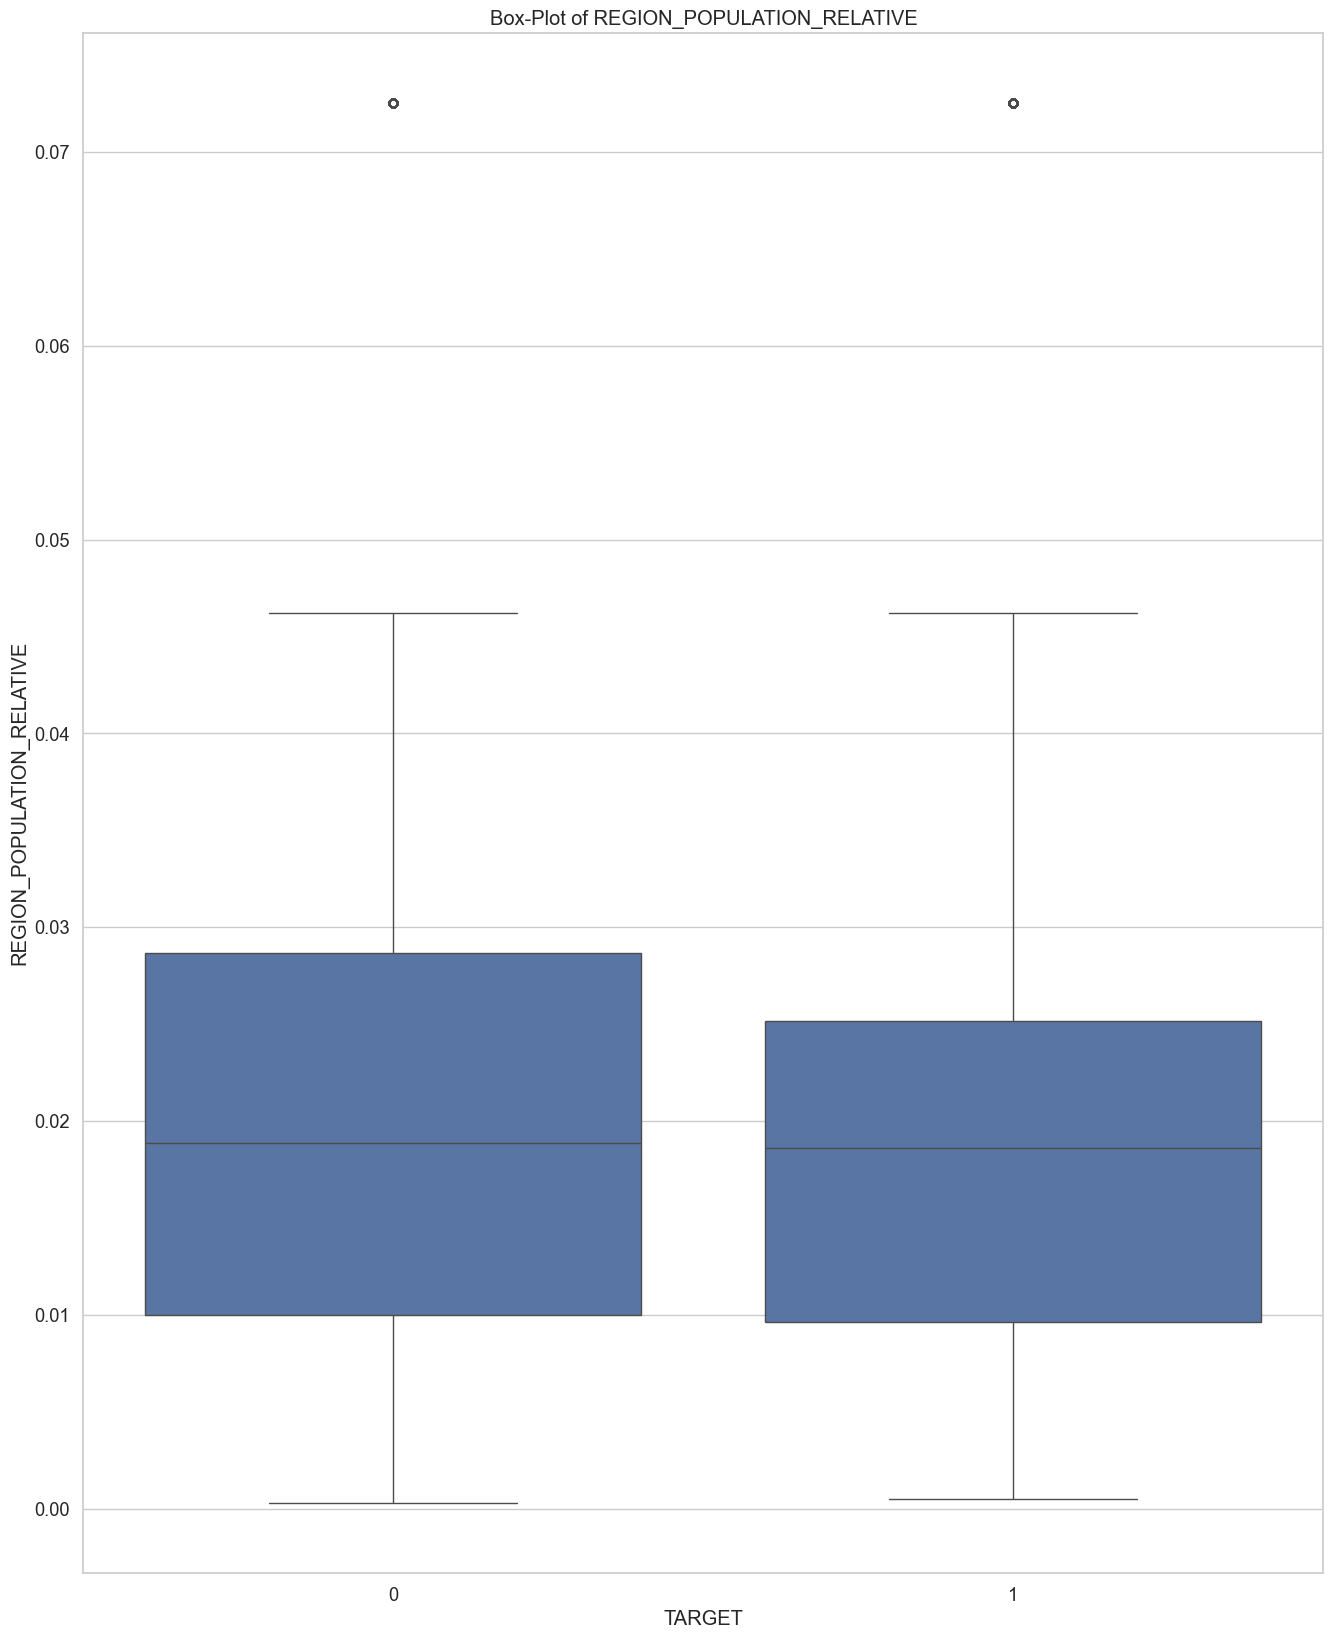

----------------------------------------------------------------------------------------------------


In [179]:
plot_continuous_variables(application_train, 'REGION_POPULATION_RELATIVE', plots = [ 'box'], figsize = (16,20))
print('-'*100)

### Quan sát và Kết luận:

Dựa theo biểu đồ trên ta thấy người vỡ nợ sống ở khu vực thưa dân hơn.

#### d. Distribution of Continuous Variable 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'

In [180]:
columns_to_check =['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
a = df[df['Row'].isin(columns_to_check)]['Description']
for des in a:
    print (des)

Client's age in days at the time of application
How many days before the application the person started current employment
How many days before the application did client change his registration
How many days before the application did client change the identity document with which he applied for the loan


#### Chúng ta s

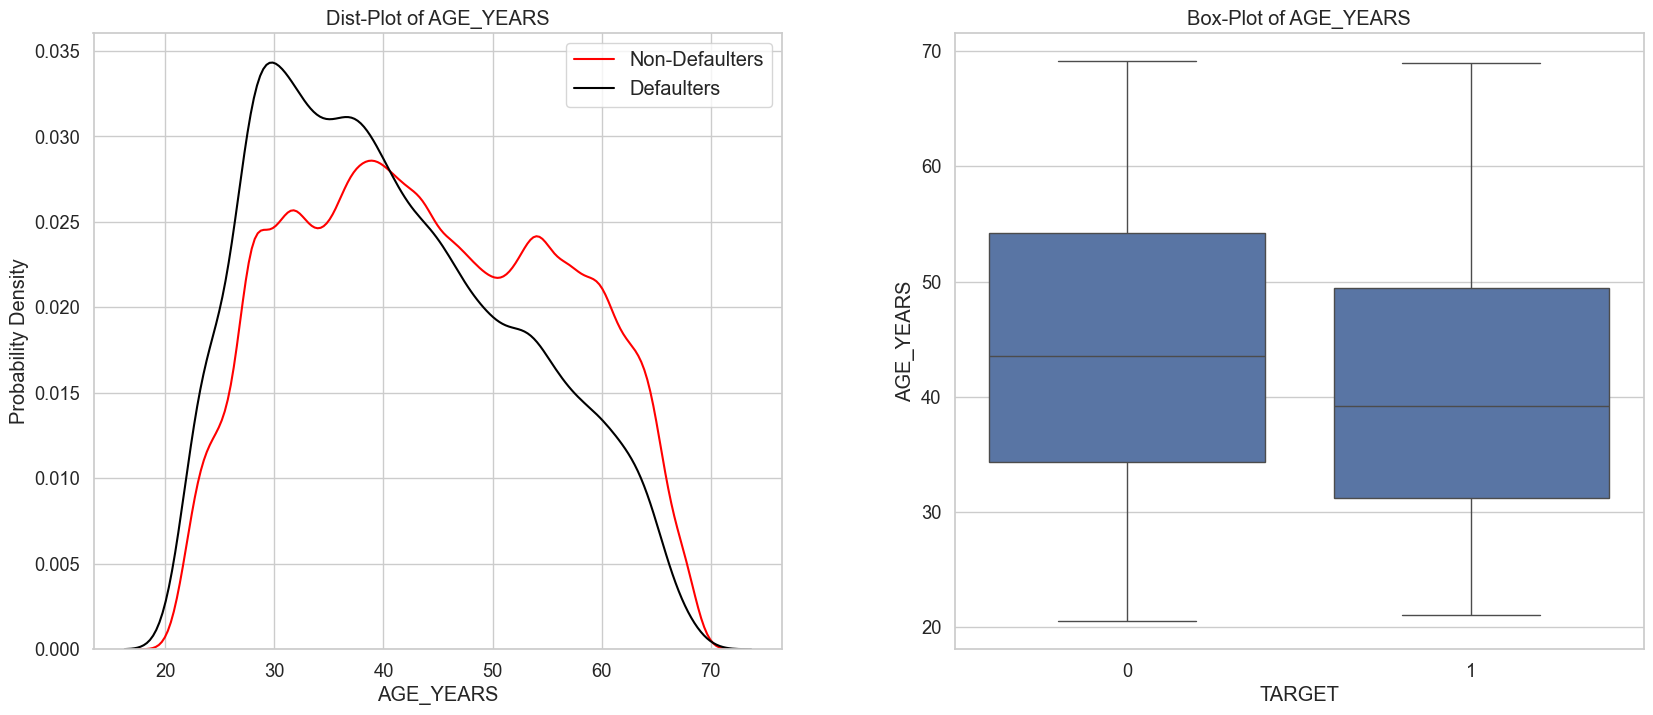

In [181]:
application_train['AGE_YEARS'] = application_train['DAYS_BIRTH'] * -1 / 365
plot_continuous_variables(application_train, 'AGE_YEARS', plots = ['distplot','box'])
_ = application_train.pop('AGE_YEARS')

#### e. Distribution of Continuous Variable 'OWN_CAR_AGE'

In [182]:
df[df['Row']=='OWN_CAR_AGE']['Description']

21    Age of client's car
Name: Description, dtype: object

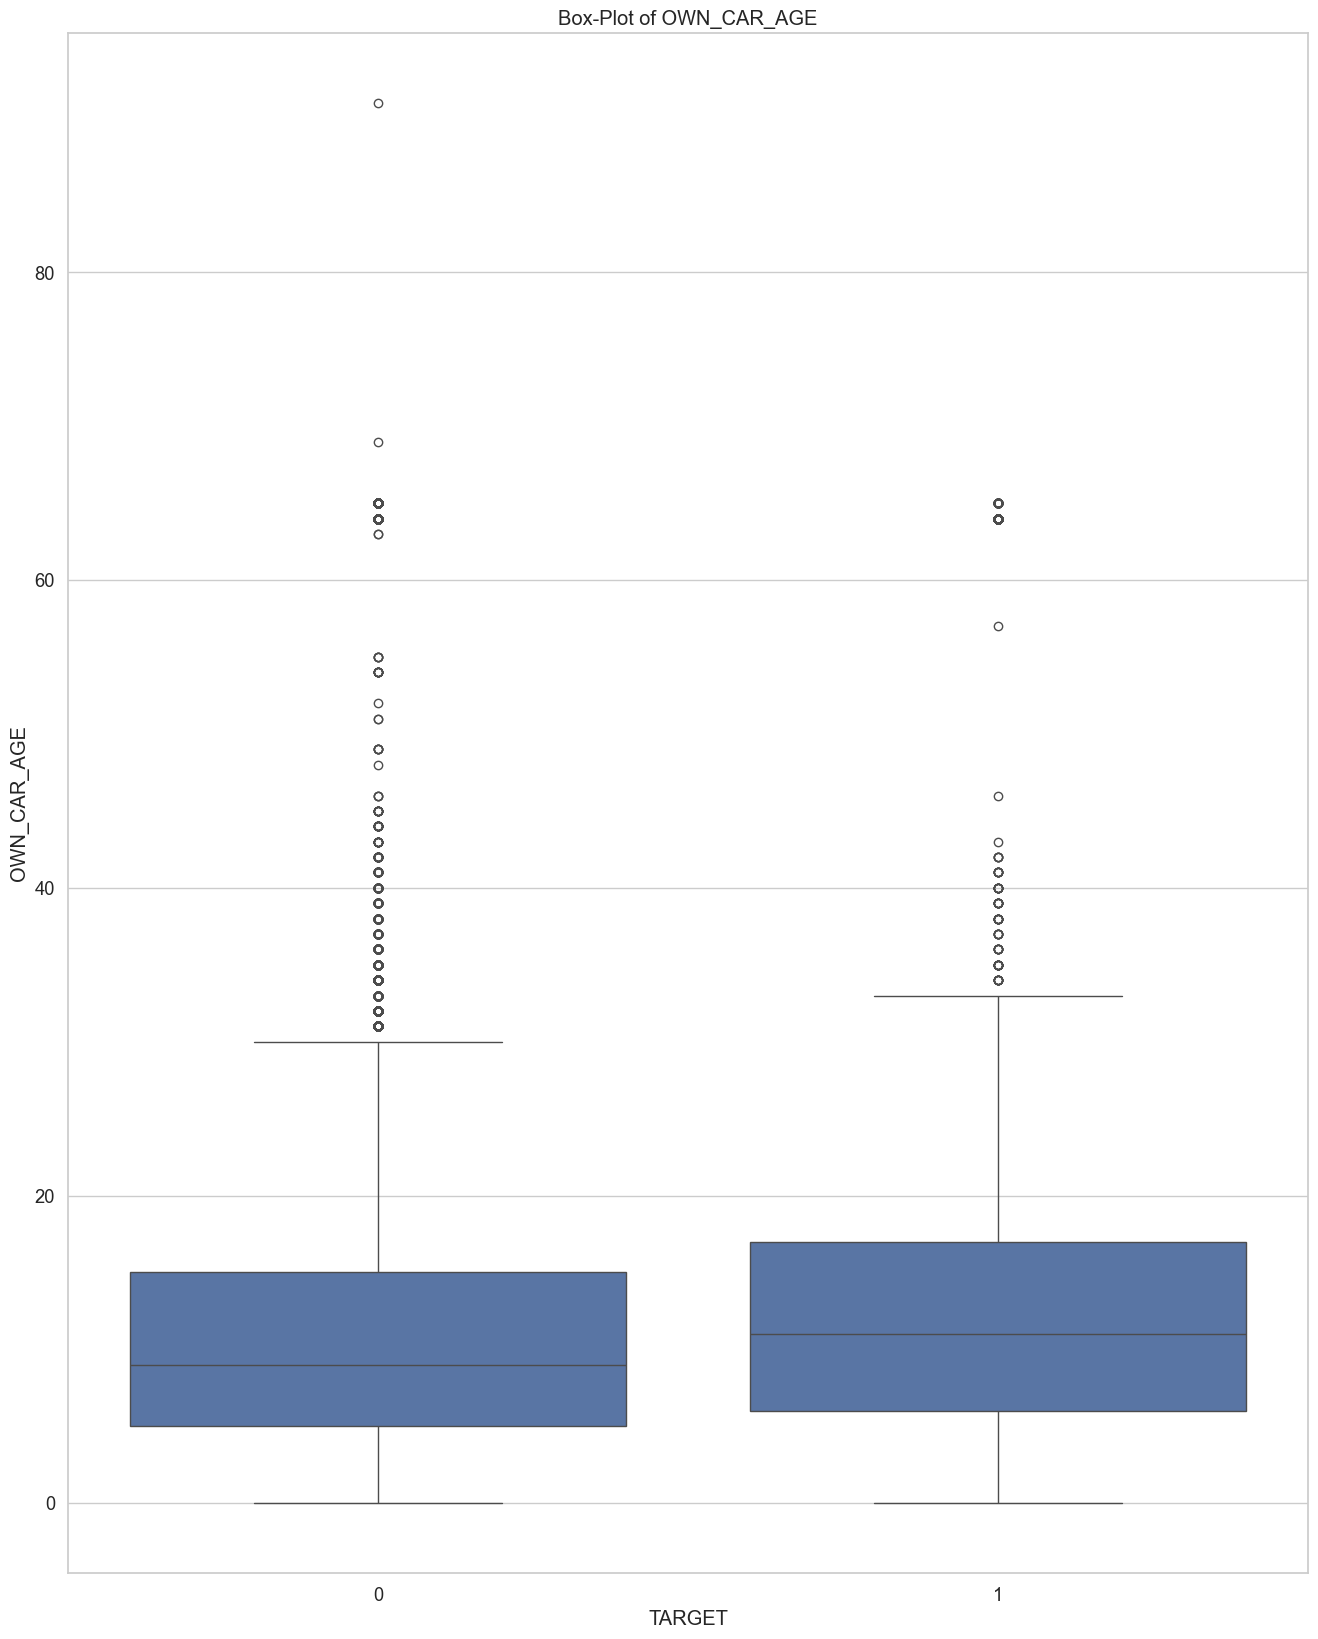

----------------------------------------------------------------------------------------------------


In [183]:
plot_continuous_variables(application_train, 'OWN_CAR_AGE', plots = [ 'box'], figsize = (16,20))
print('-'*100)

#### f. Distribution of Continuous Variable 'CNT_FAM_MEMBERS'

In [184]:
df[df['Row']=='CNT_FAM_MEMBERS']['Description']

29    How many family members does client have
Name: Description, dtype: object

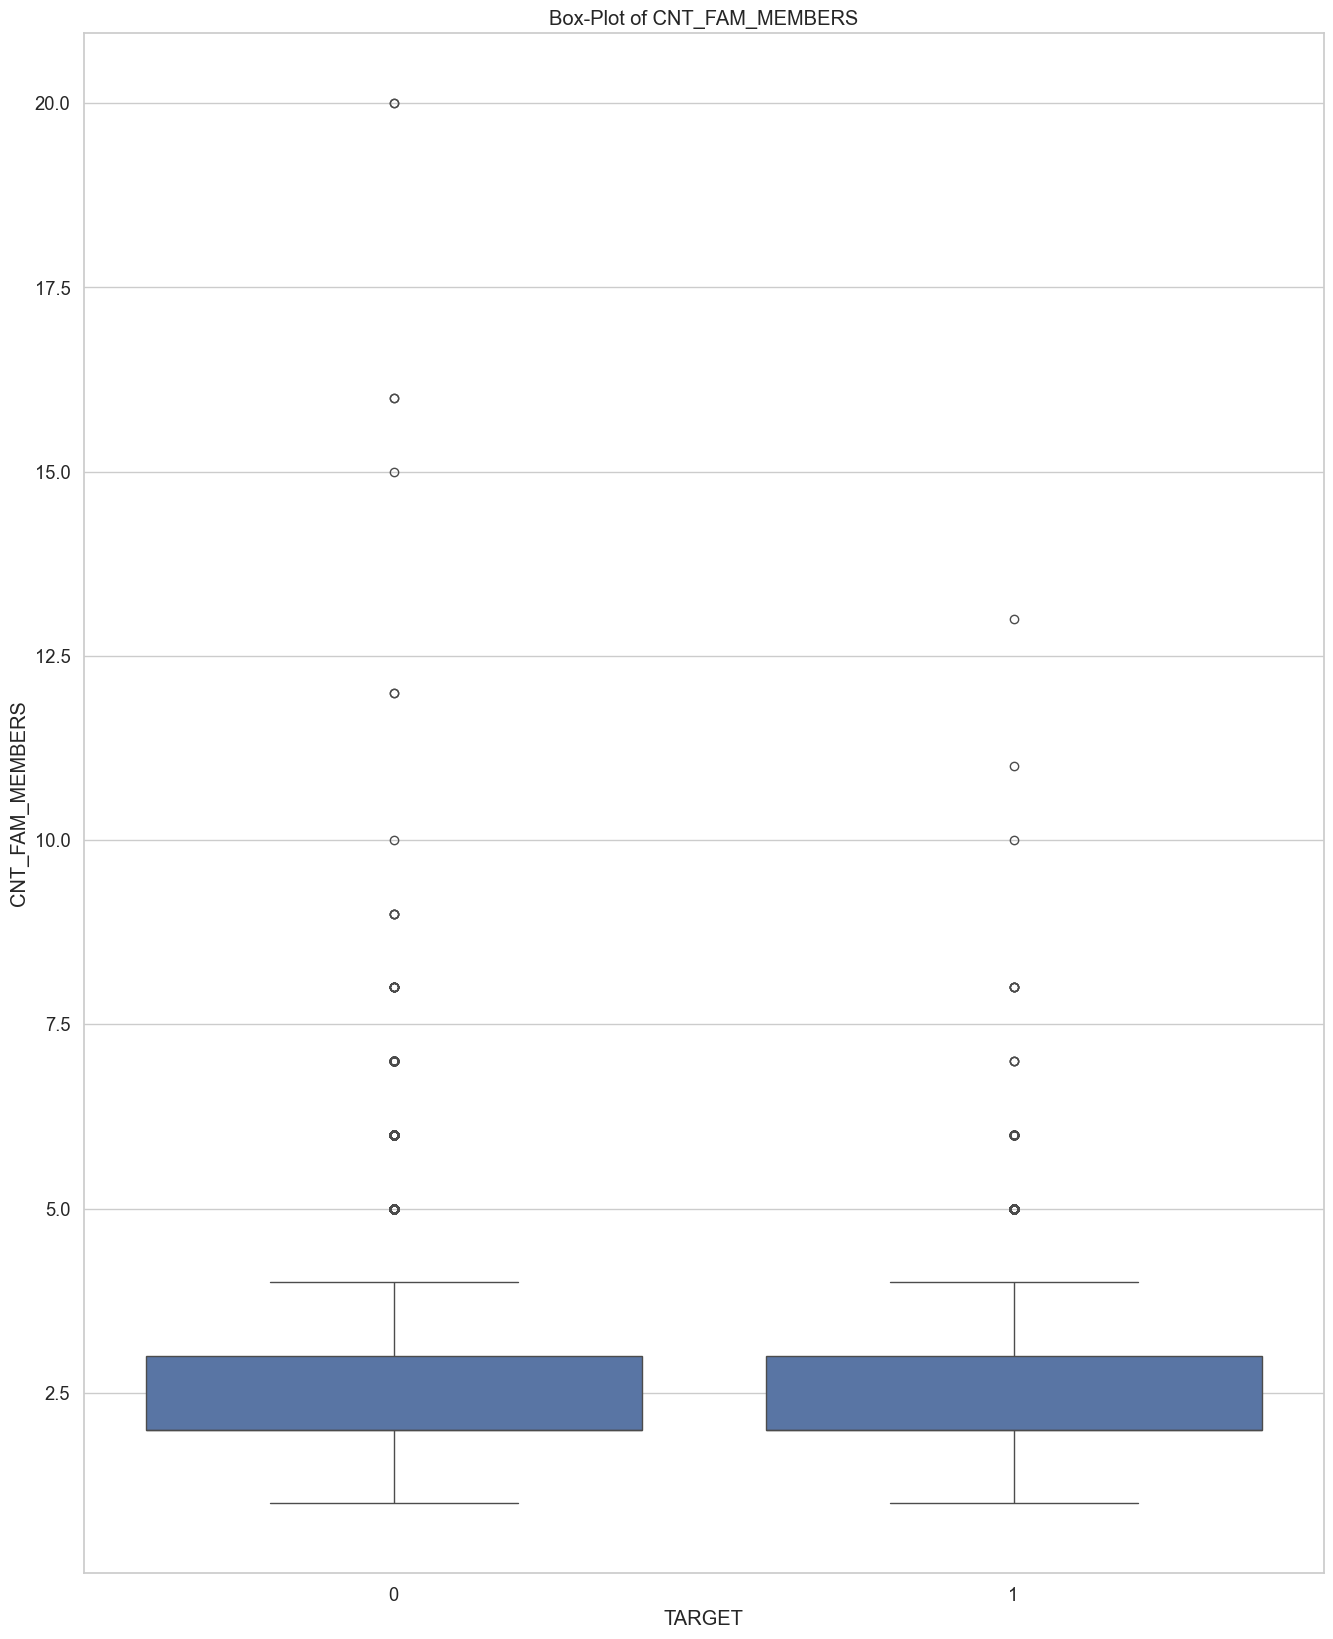

----------------------------------------------------------------------------------------------------


In [185]:
plot_continuous_variables(application_train, 'CNT_FAM_MEMBERS', plots = [ 'box'], figsize = (16,20))
print('-'*100)

#### g. Distribution of Continuous Variable 'HOUR_APPR_MEMBERS'

In [186]:
df[df['Row']=='HOUR_APPR_PROCESS_START']['Description']

33                         Approximately at what hour did the client apply for the loan
182    Approximately at what day hour did the client apply for the previous application
Name: Description, dtype: object

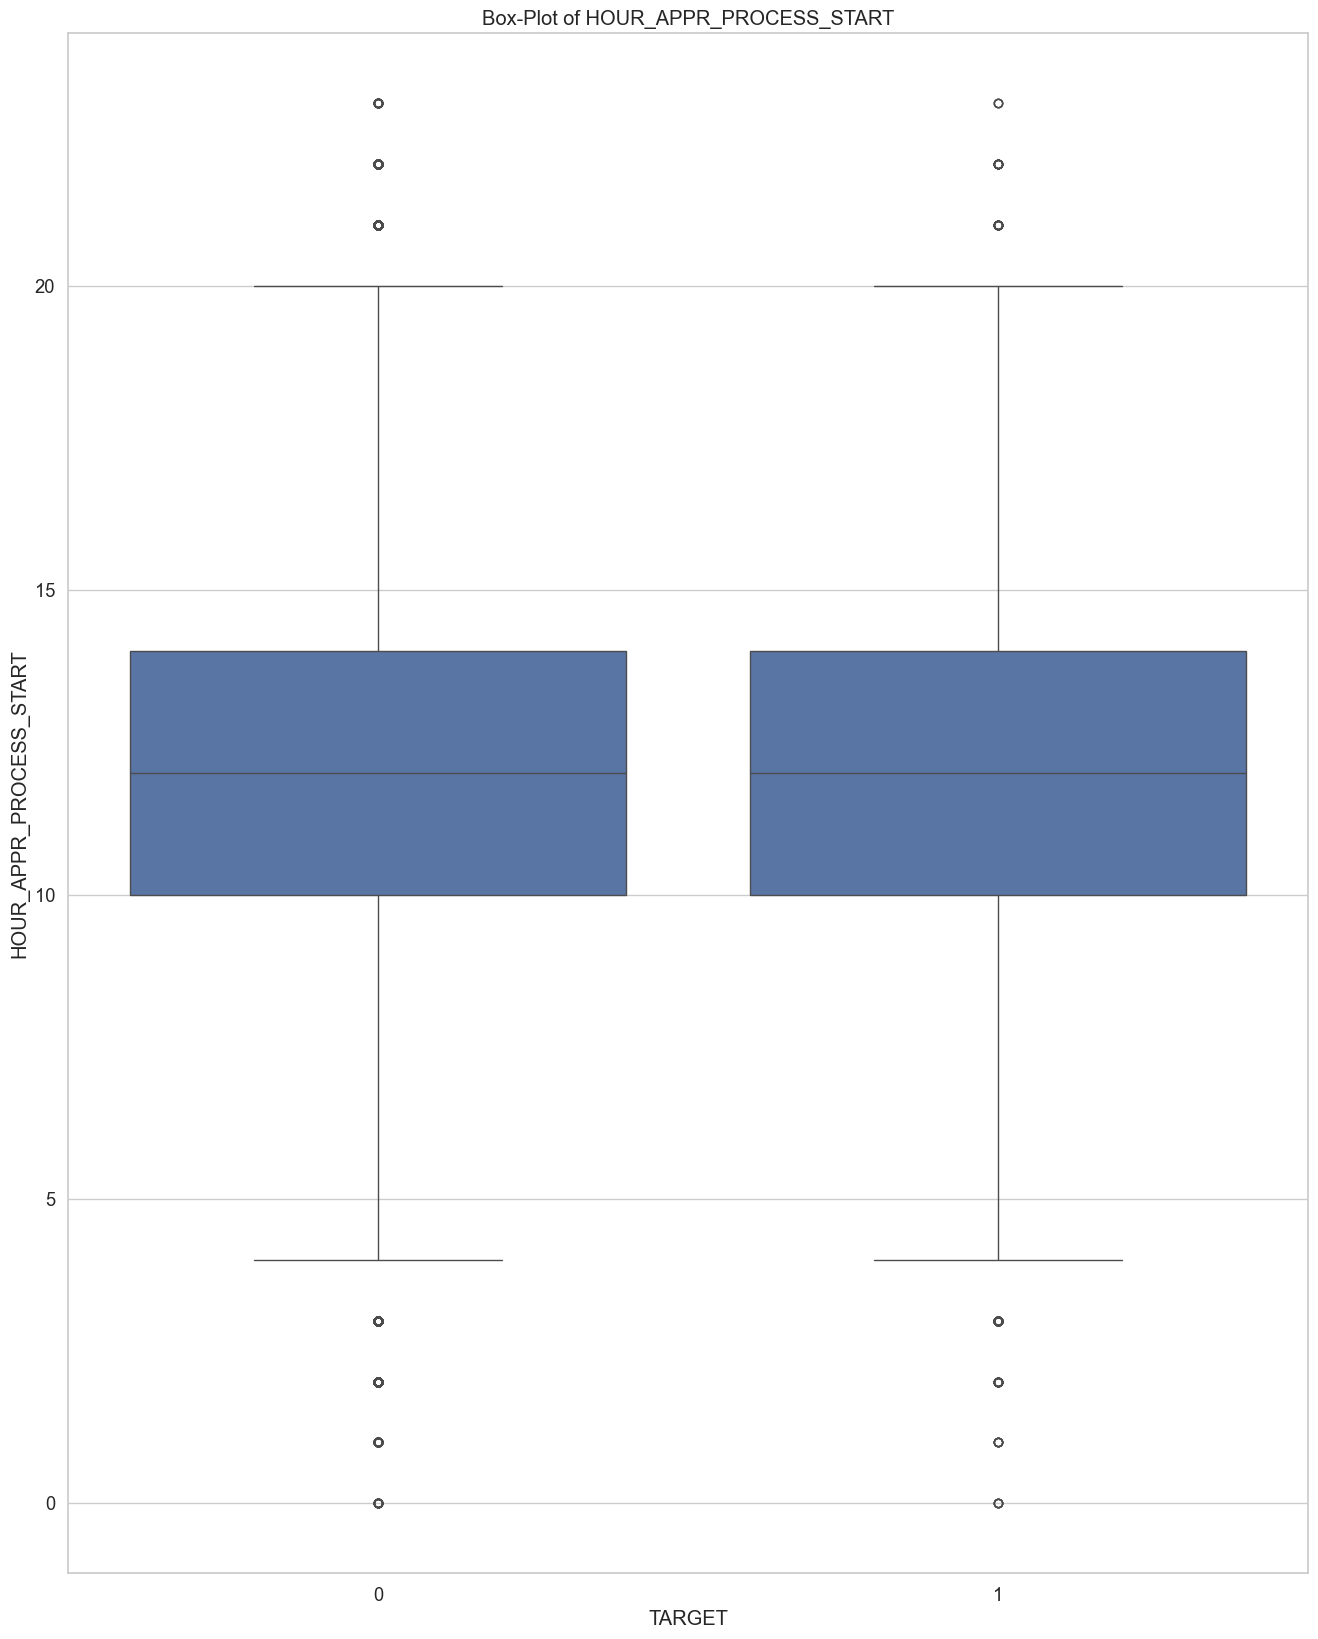

----------------------------------------------------------------------------------------------------


In [187]:
plot_continuous_variables(application_train, 'HOUR_APPR_PROCESS_START', plots = [ 'box'], figsize = (16,20))
print('-'*100)

#### h. Distribution of Continuous Variable 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'

In [188]:
columns_to_check =['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
a = df[df['Row'].isin(columns_to_check)]['Description']
for des in a:
    print (des)

Normalized score from external data source
Normalized score from external data source
Normalized score from external data source


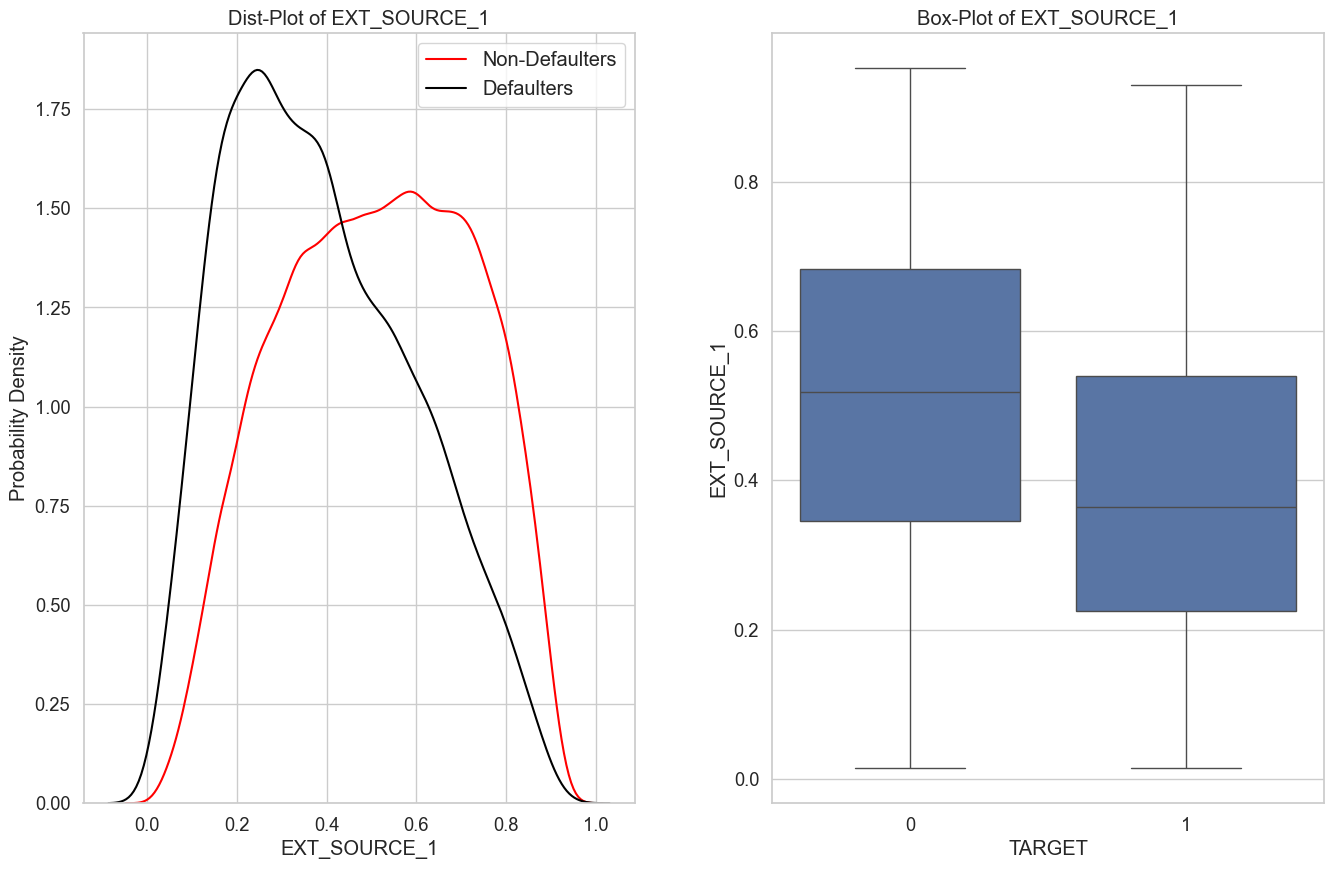

----------------------------------------------------------------------------------------------------


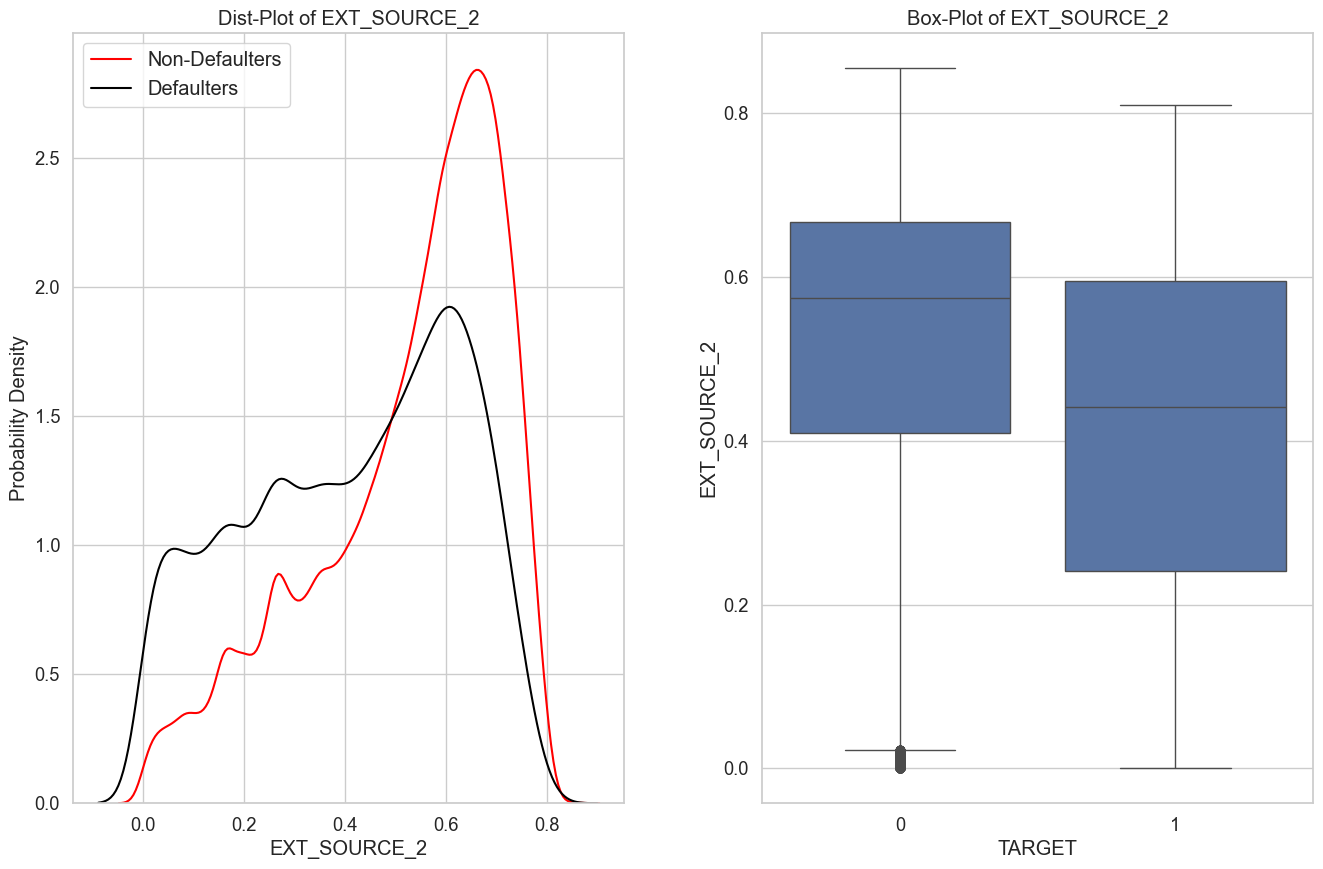

----------------------------------------------------------------------------------------------------


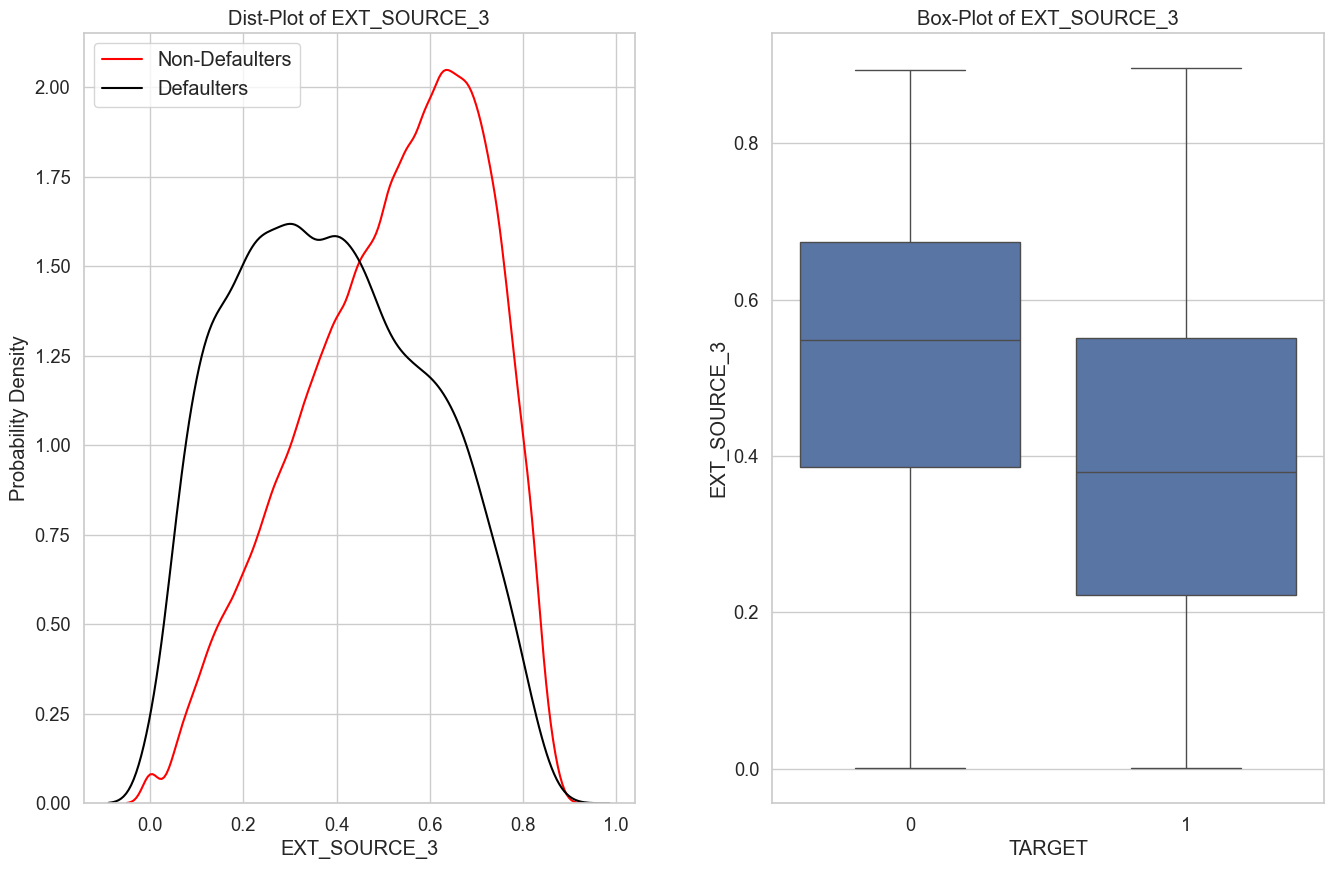

----------------------------------------------------------------------------------------------------


In [189]:
for column in columns_to_check:
    plot_continuous_variables(application_train, column_name = column, plots = ['distplot', 'box'], figsize = (16,10))
    print('-'*100)

#### i. Distribution of Continuous Variable 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG'

In [190]:
columns_to_check =['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']
a = df[df['Row'].isin(columns_to_check)]['Description']
for des in a:
    print (des)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, liv

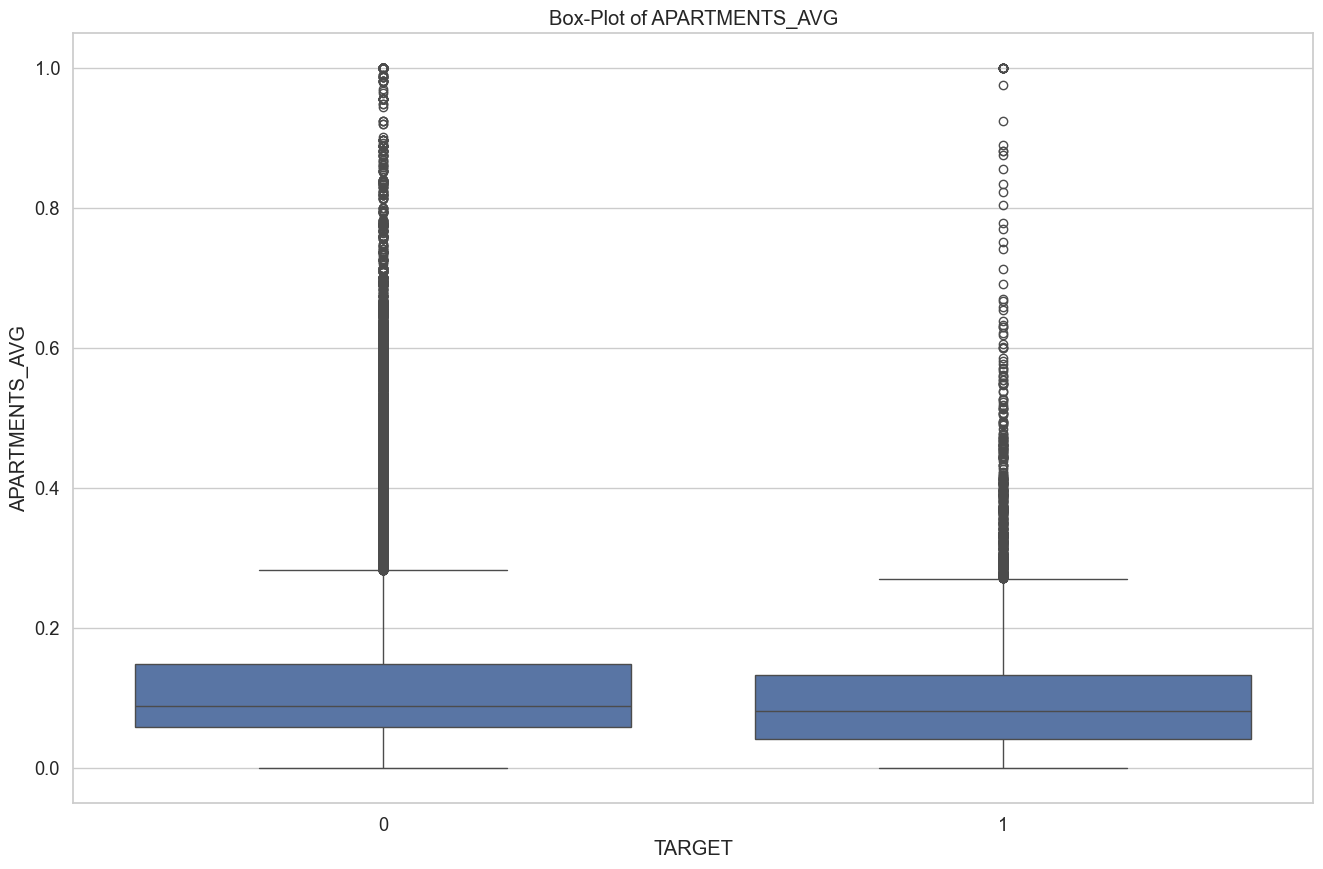

----------------------------------------------------------------------------------------------------


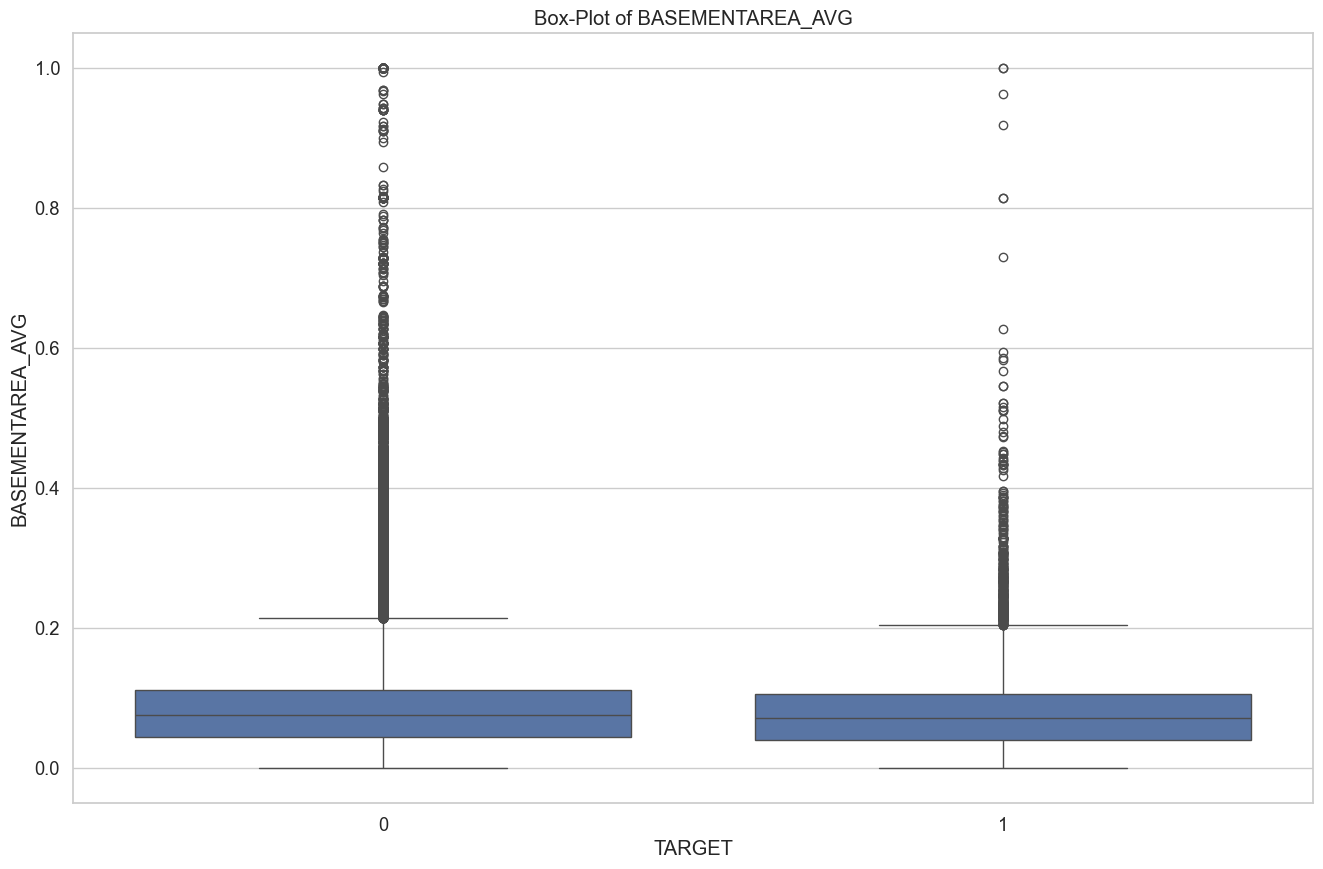

----------------------------------------------------------------------------------------------------


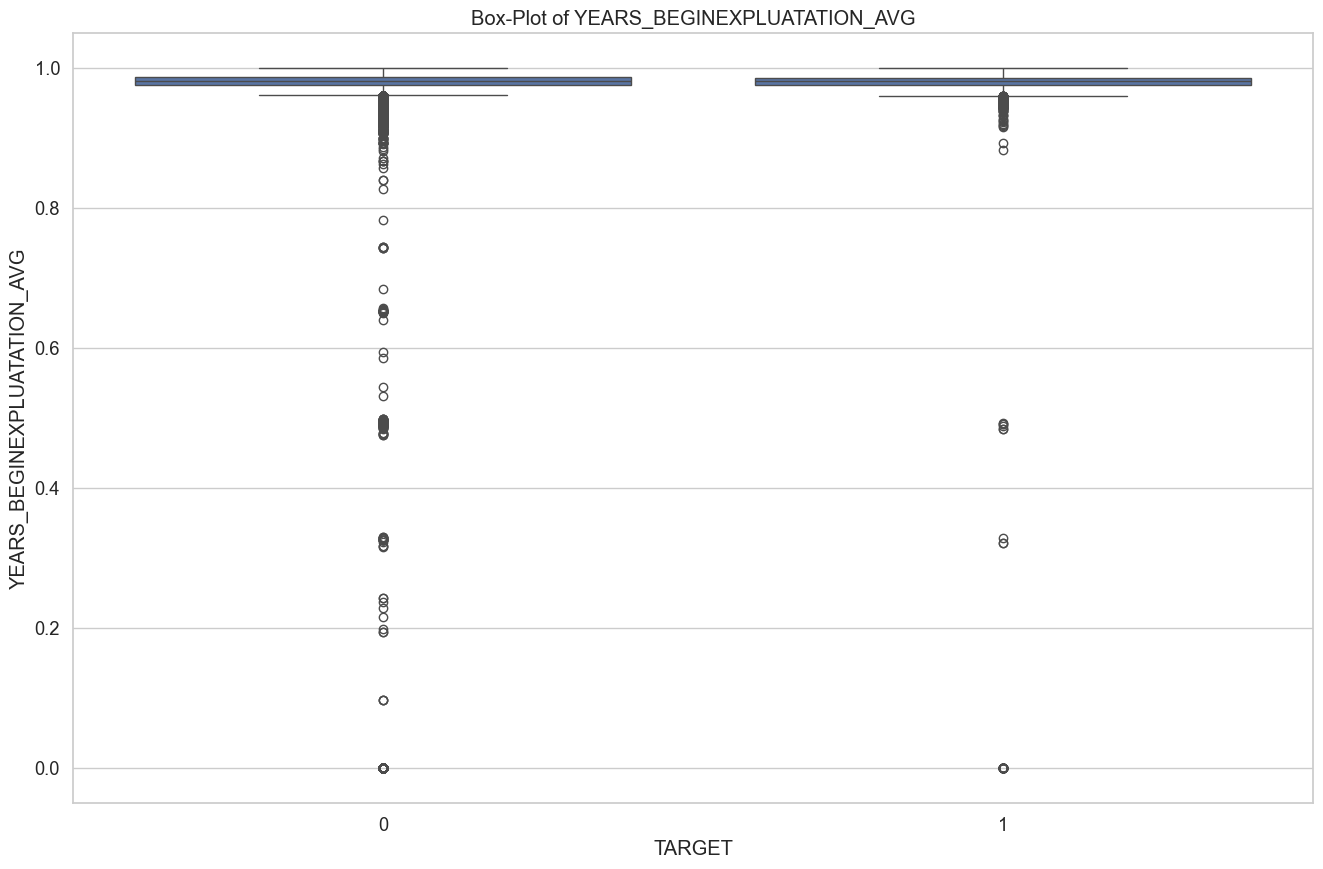

----------------------------------------------------------------------------------------------------


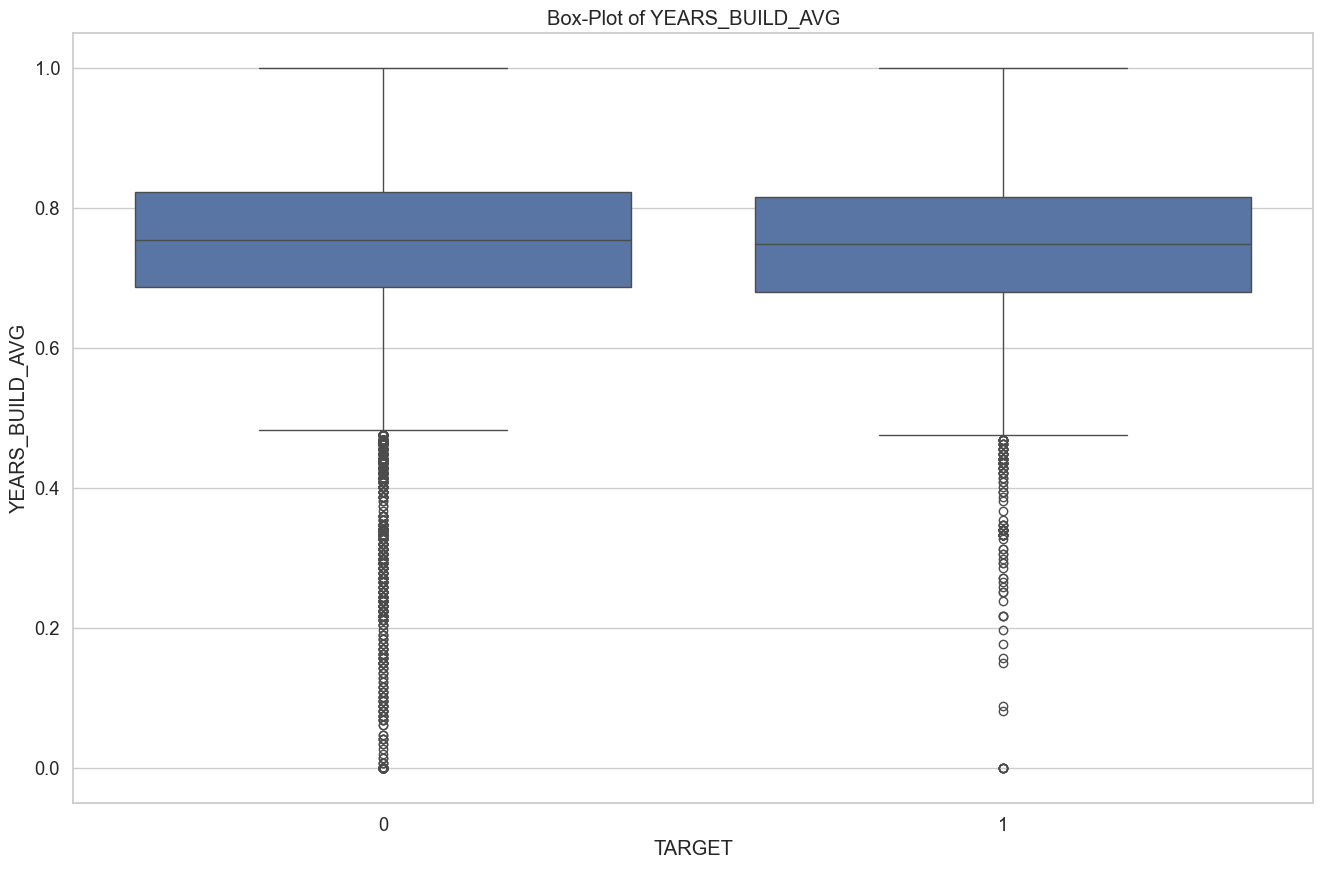

----------------------------------------------------------------------------------------------------


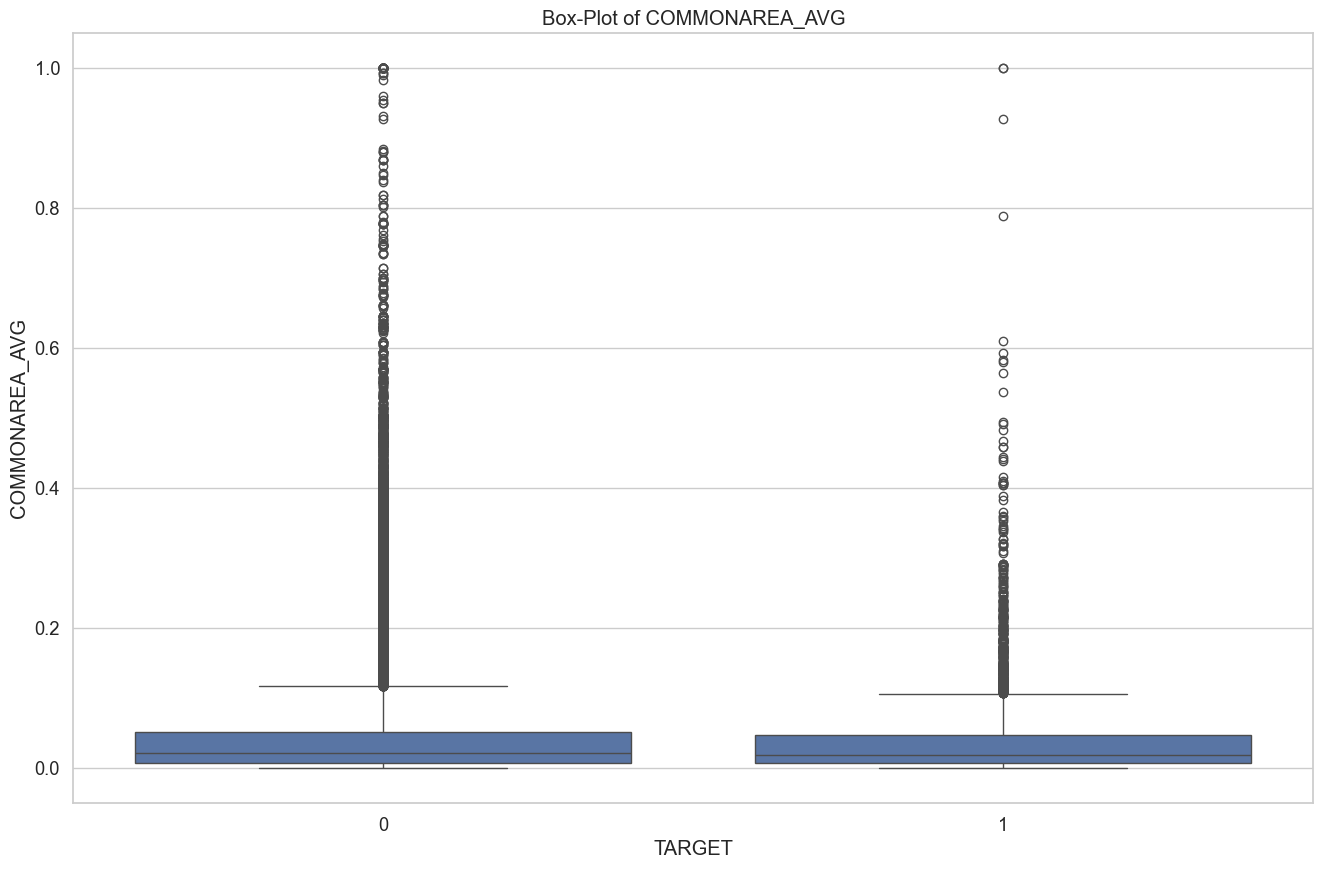

----------------------------------------------------------------------------------------------------


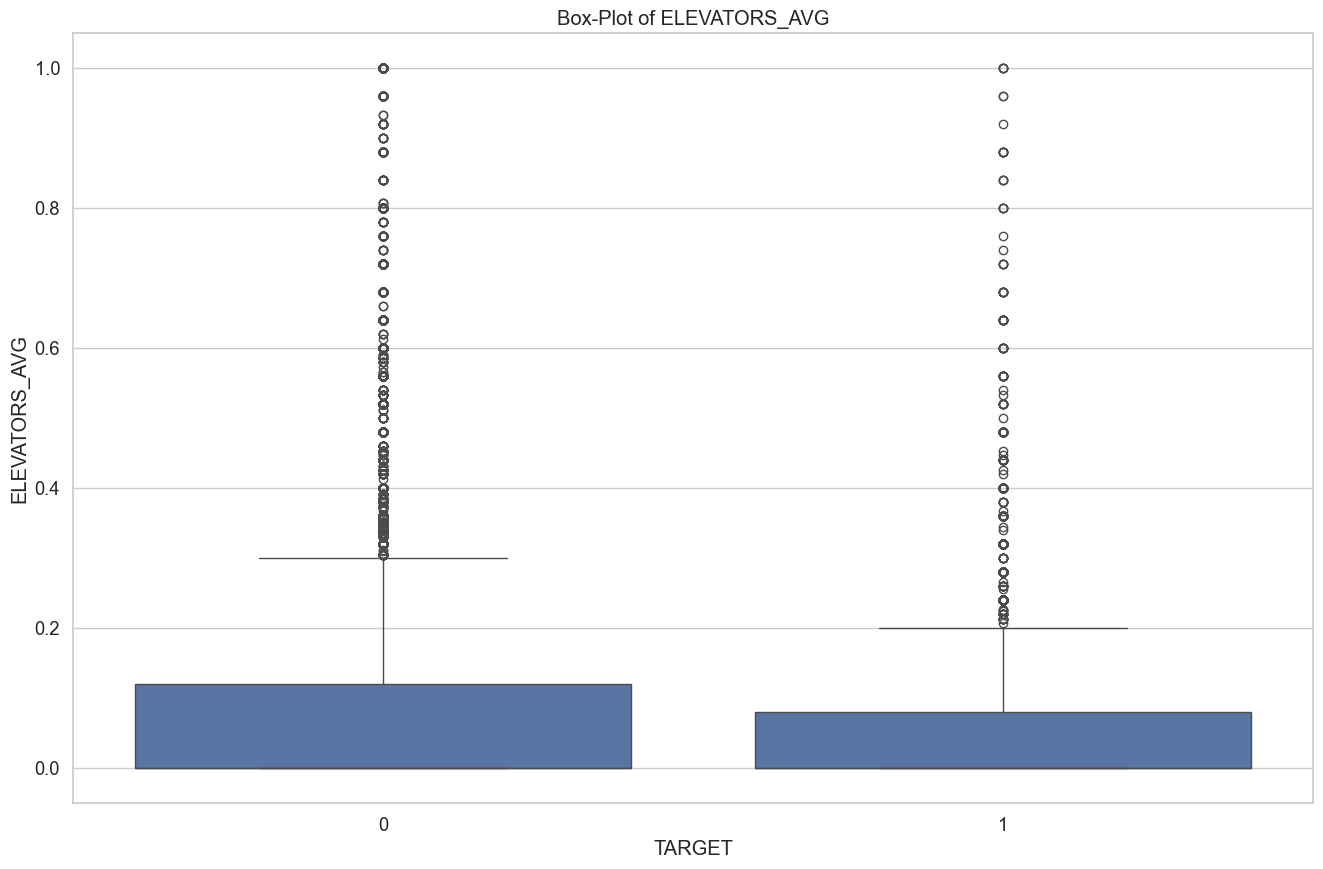

----------------------------------------------------------------------------------------------------


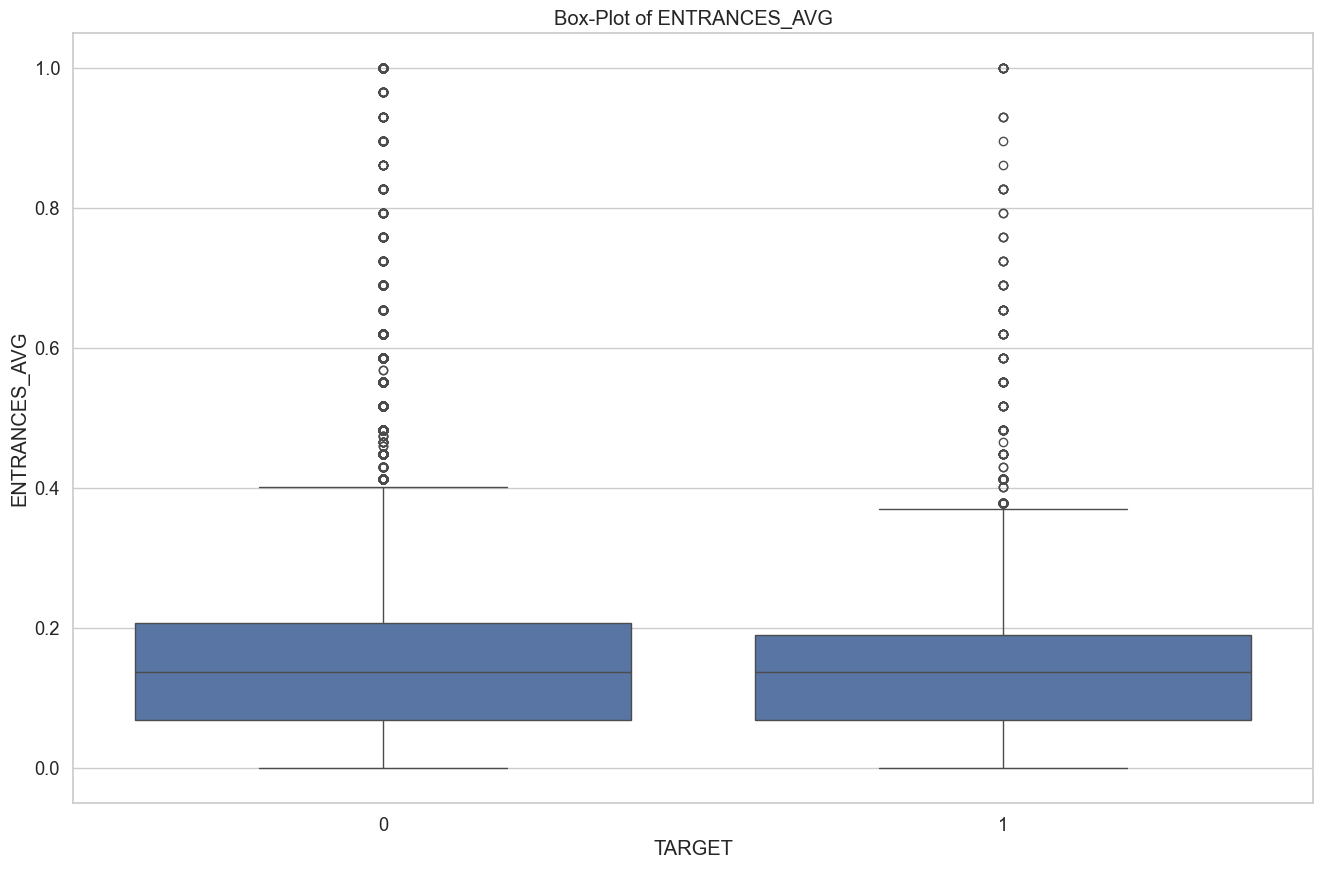

----------------------------------------------------------------------------------------------------


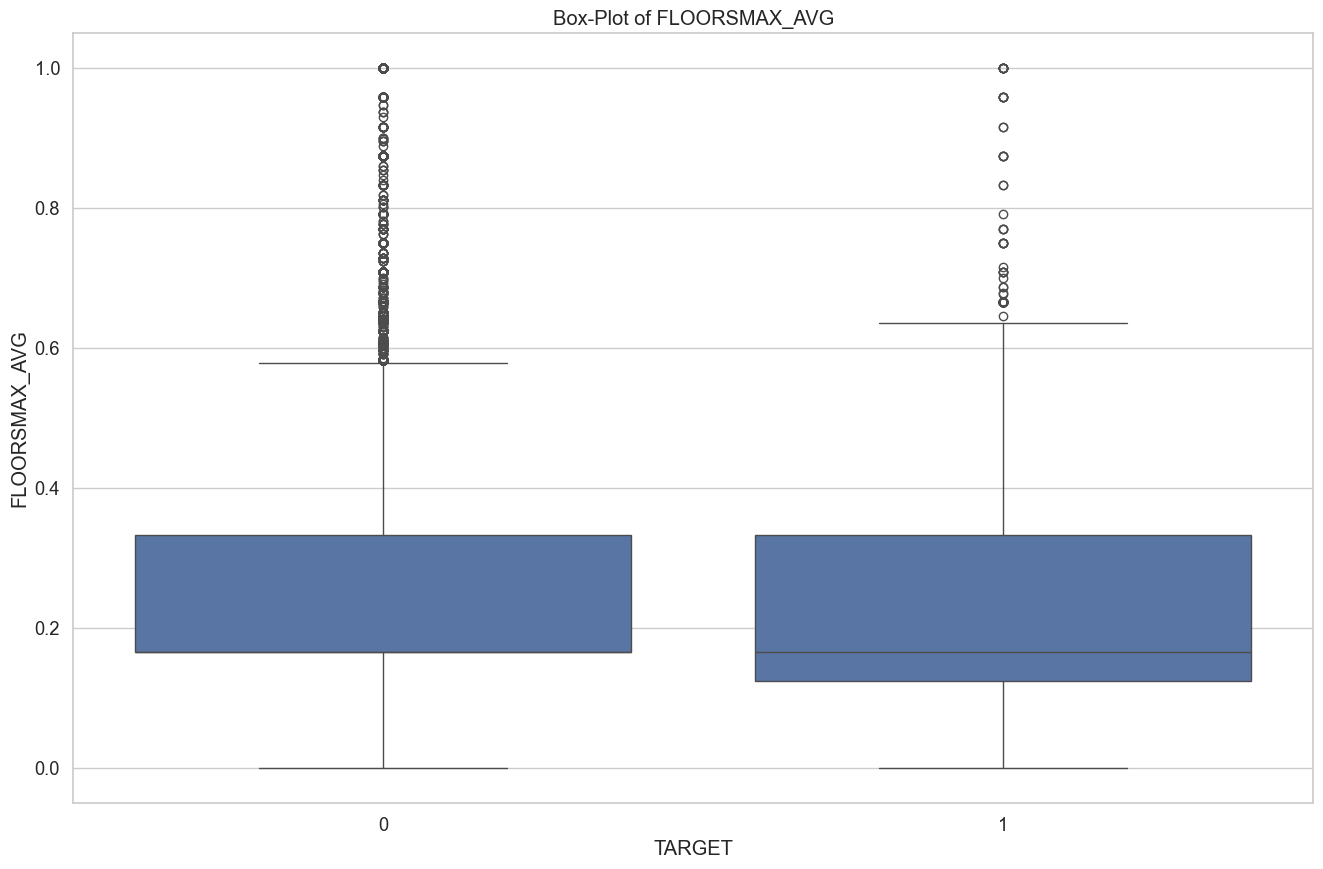

----------------------------------------------------------------------------------------------------


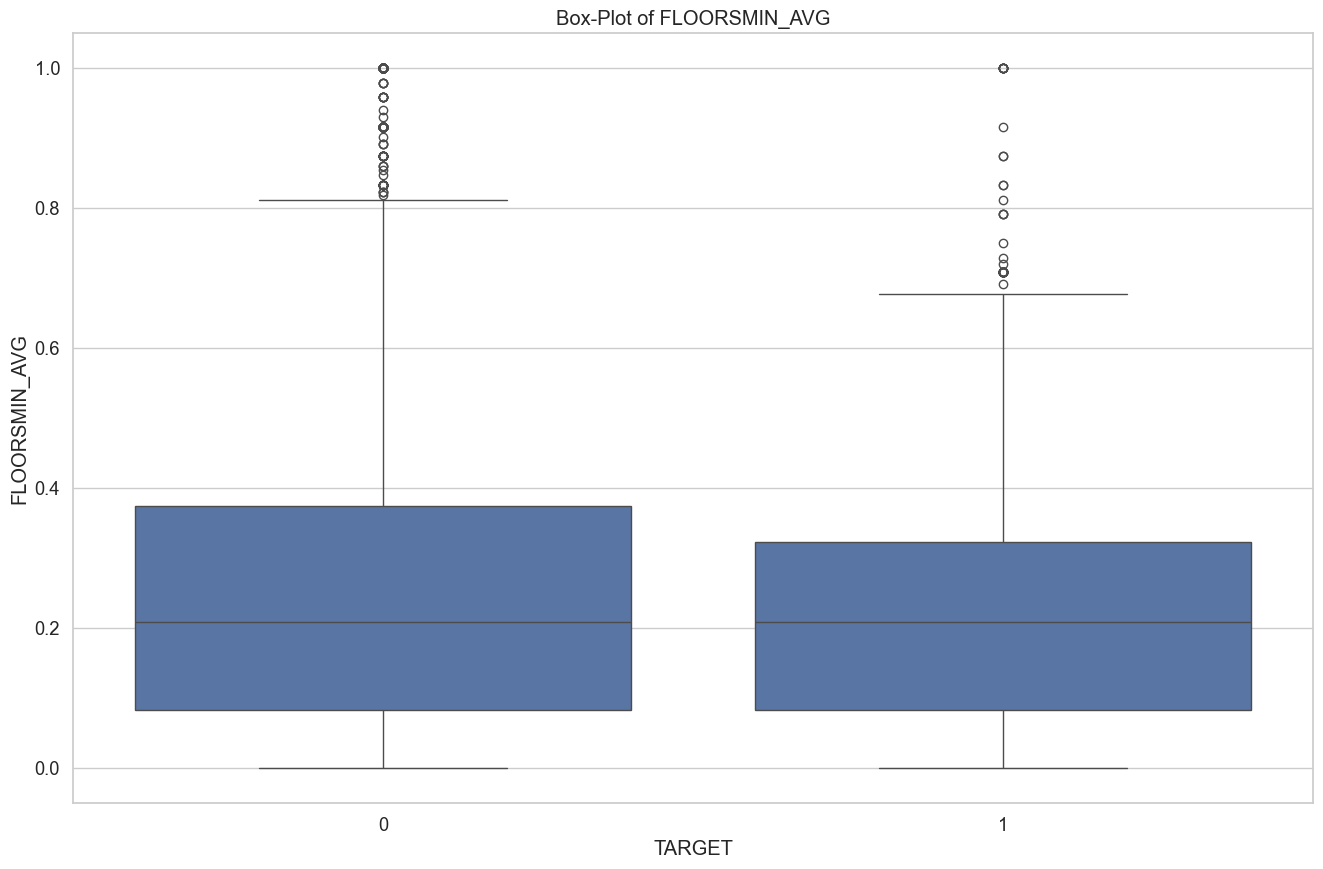

----------------------------------------------------------------------------------------------------


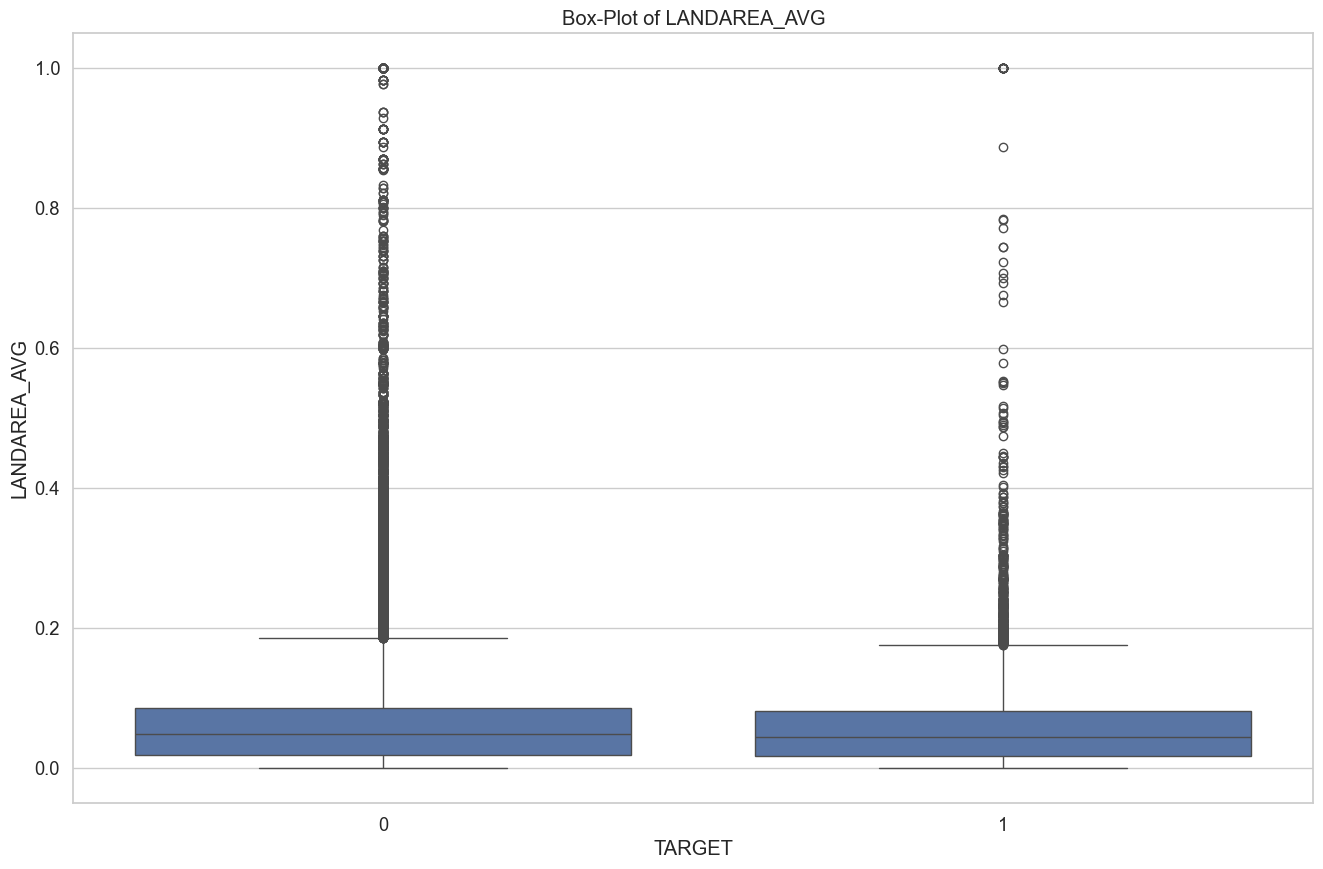

----------------------------------------------------------------------------------------------------


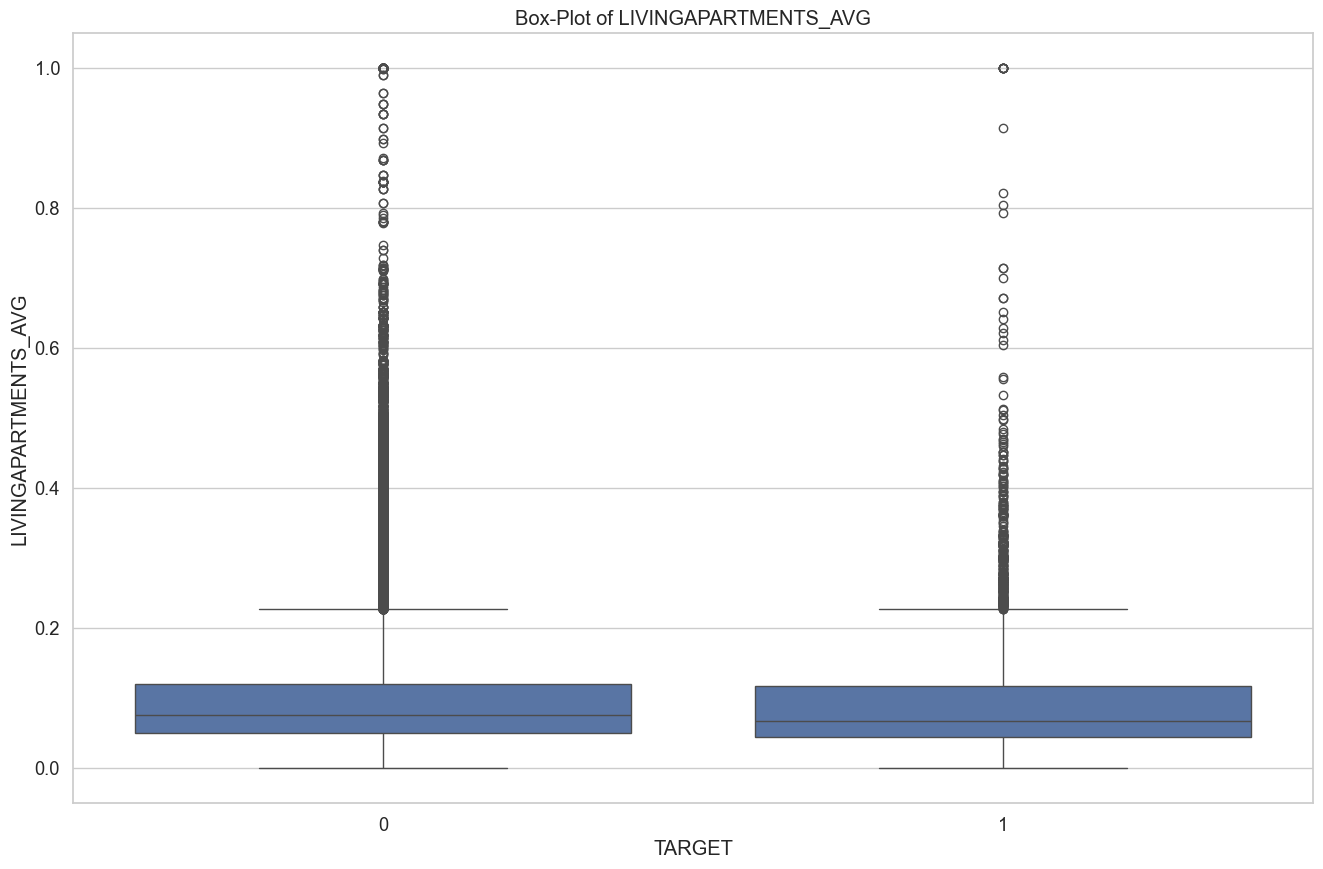

----------------------------------------------------------------------------------------------------


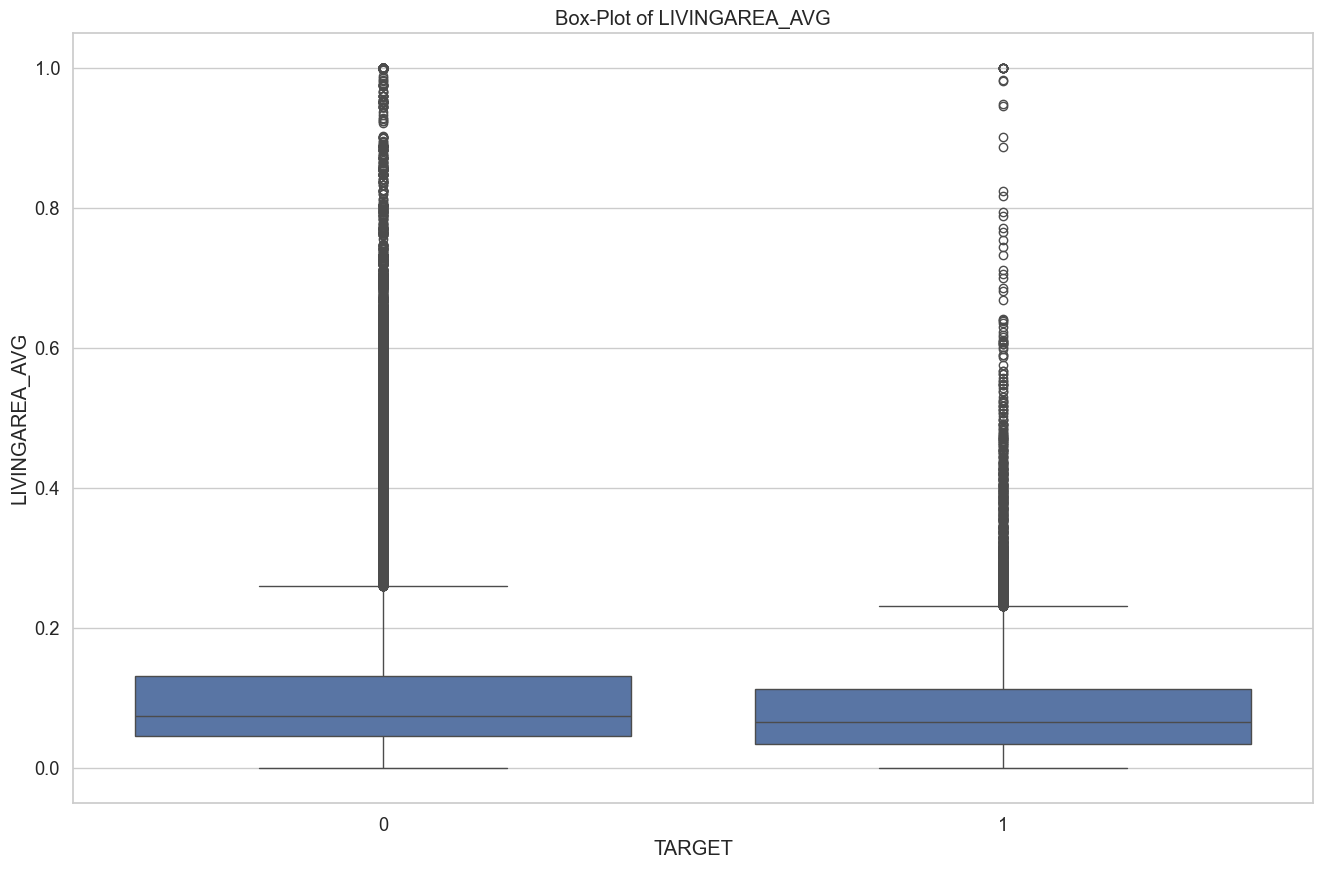

----------------------------------------------------------------------------------------------------


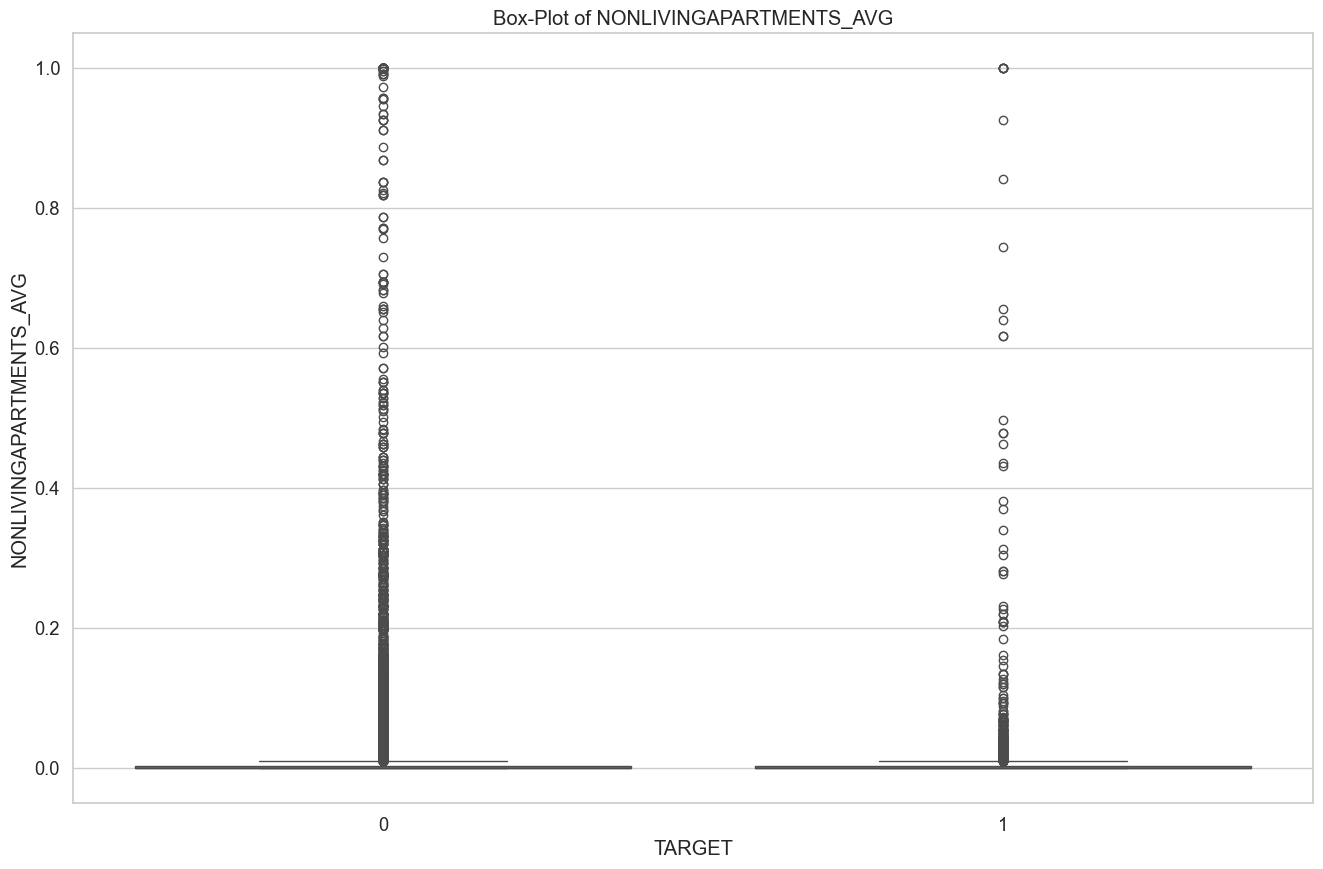

----------------------------------------------------------------------------------------------------


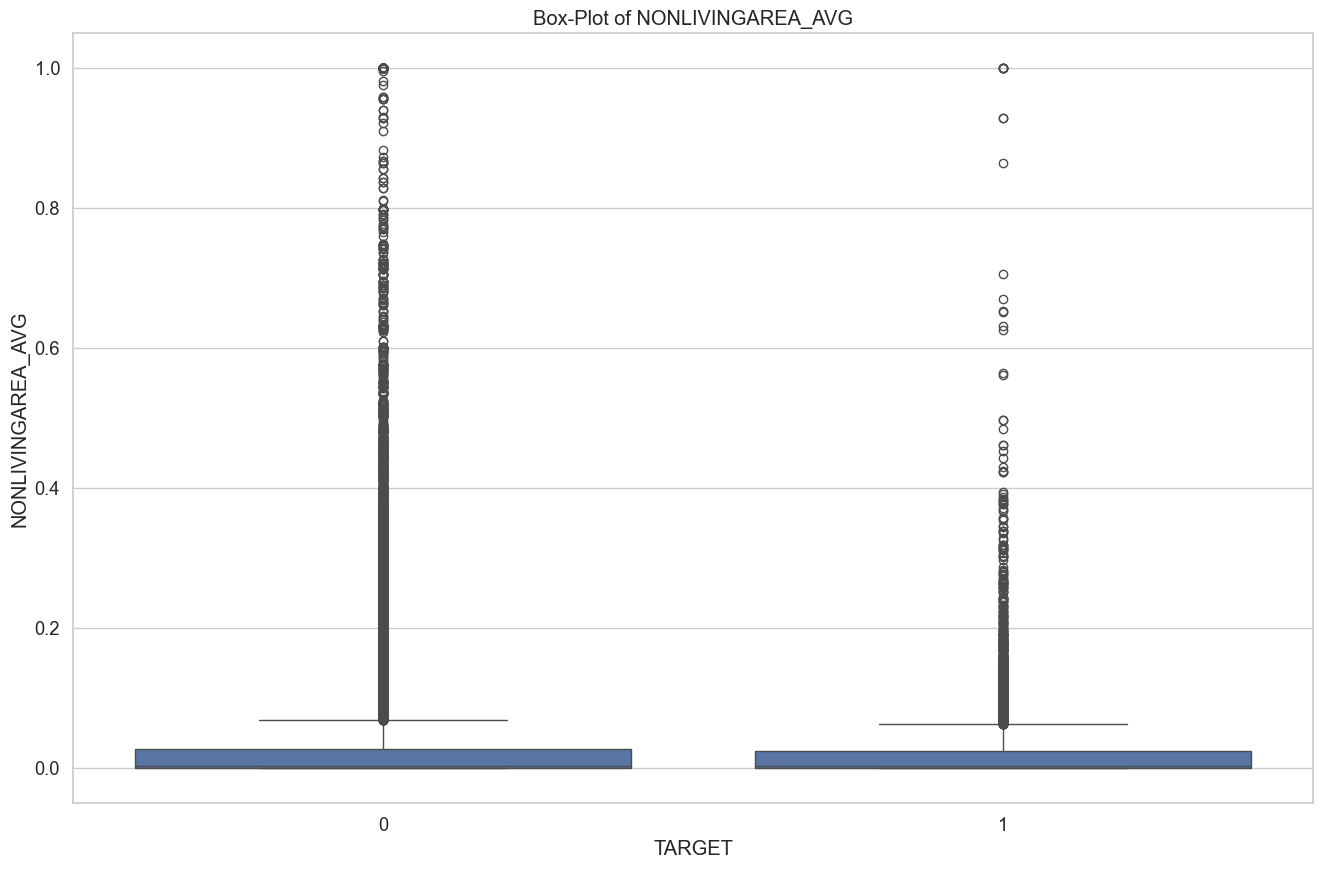

----------------------------------------------------------------------------------------------------


In [191]:
for column in columns_to_check:
    plot_continuous_variables(application_train, column_name = column, plots = ['box'], figsize = (16,10))
    print('-'*100)

#### k. Distribution of Continuous Variable 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', YEARS_BUILD_MODE', COMMONAREA_MODE', ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'TOTALAREA_MODE'

In [192]:
columns_to_check =['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'TOTALAREA_MODE']
a = df[df['Row'].isin(columns_to_check)]['Description']
for des in a:
    print (des)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, liv

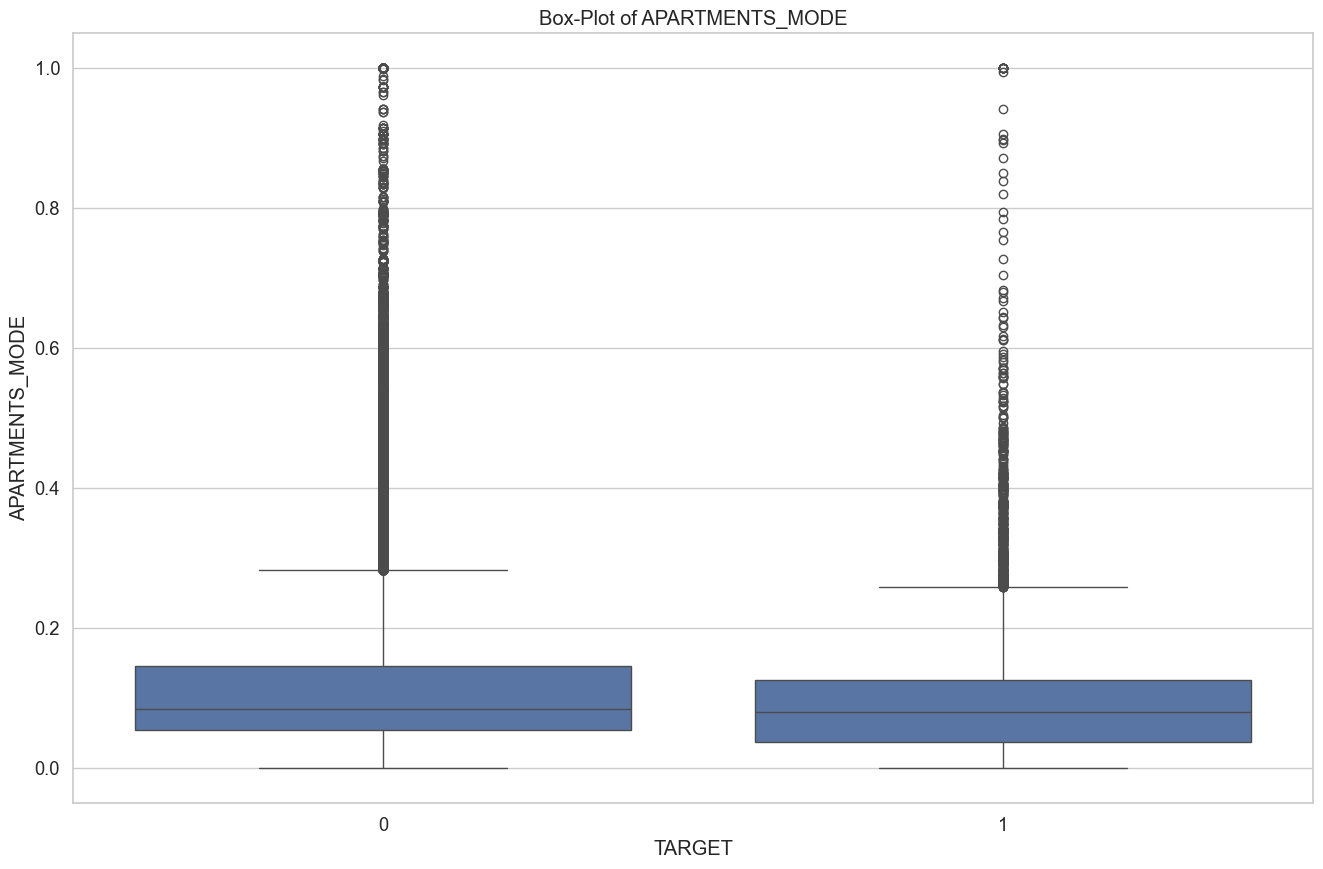

----------------------------------------------------------------------------------------------------


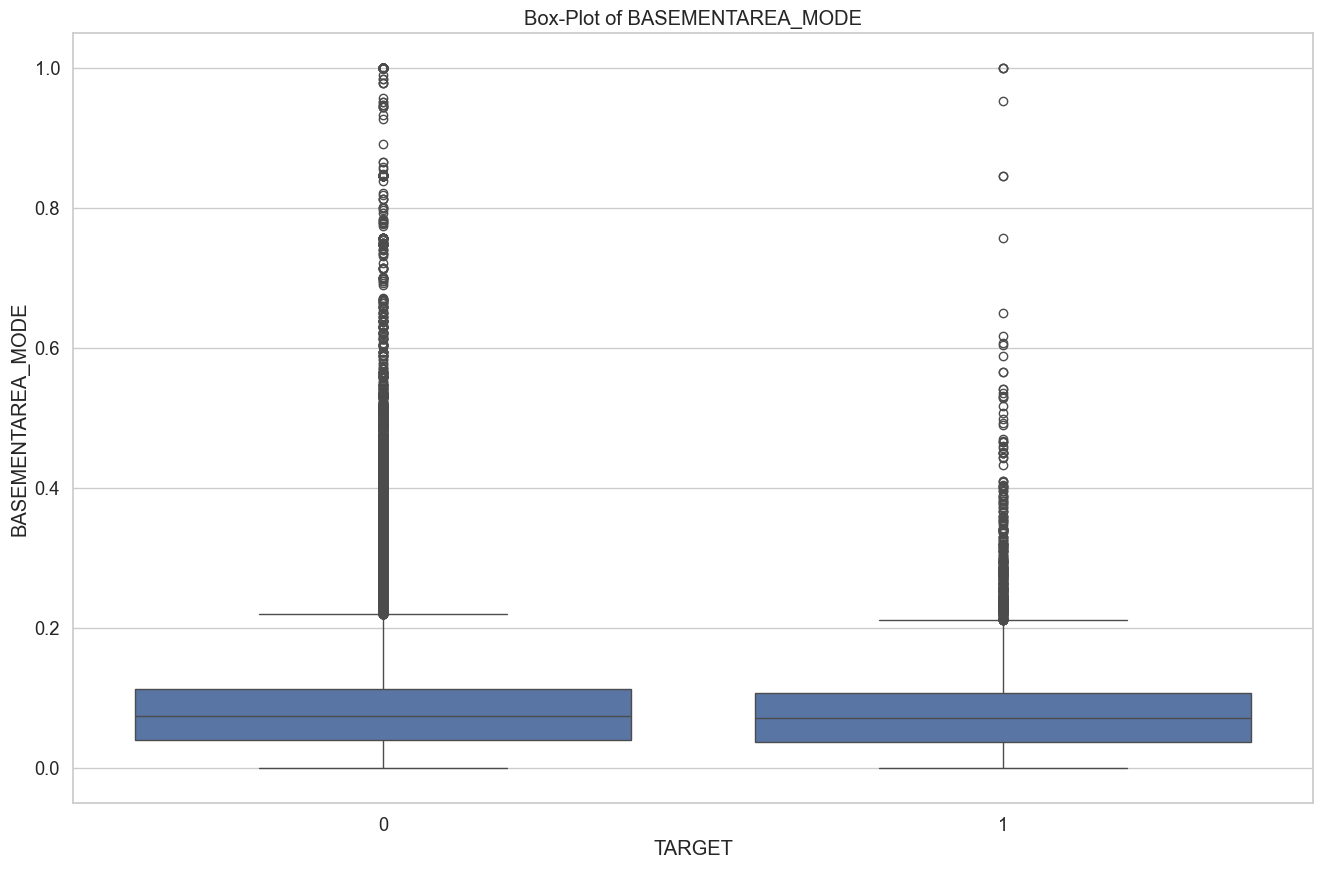

----------------------------------------------------------------------------------------------------


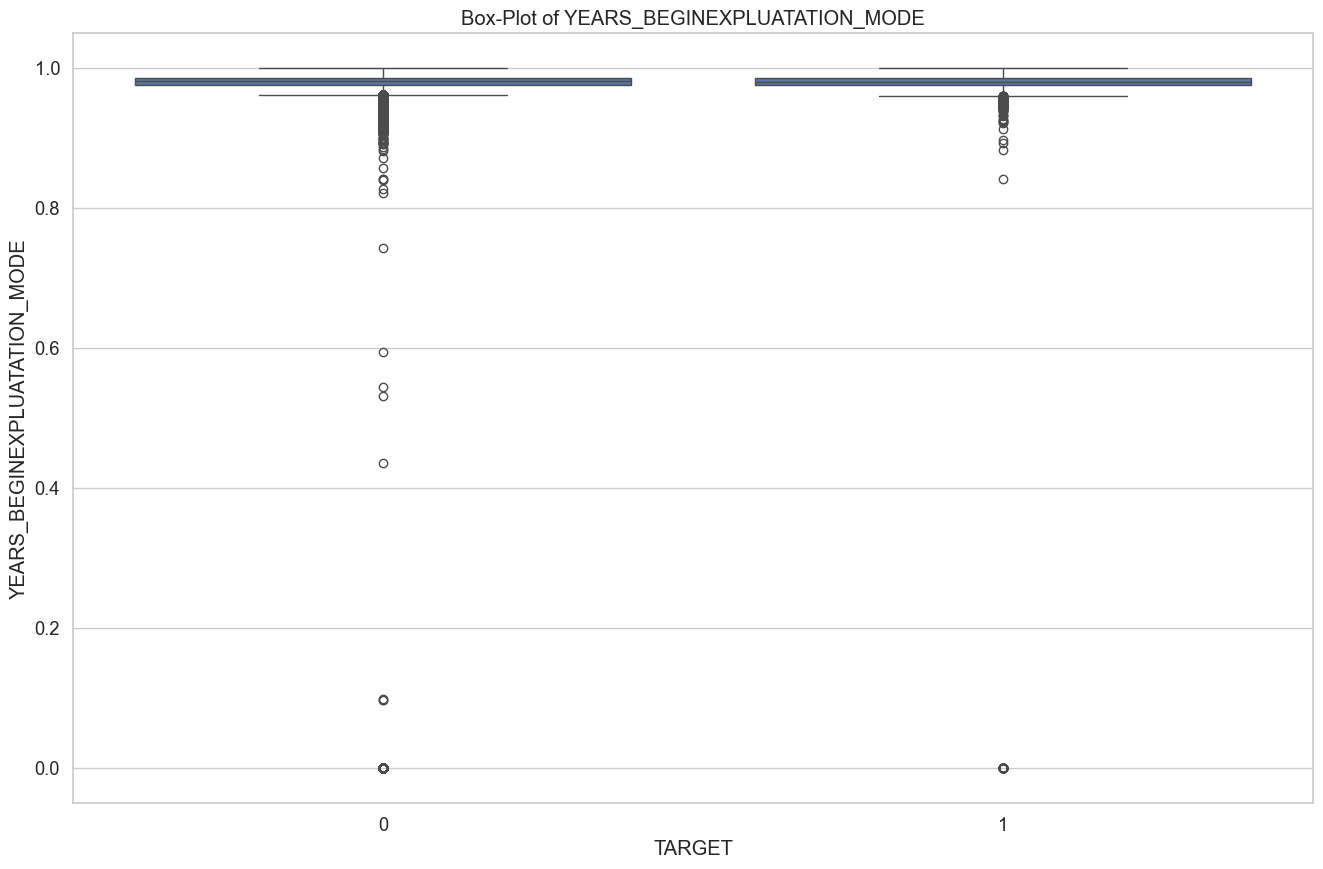

----------------------------------------------------------------------------------------------------


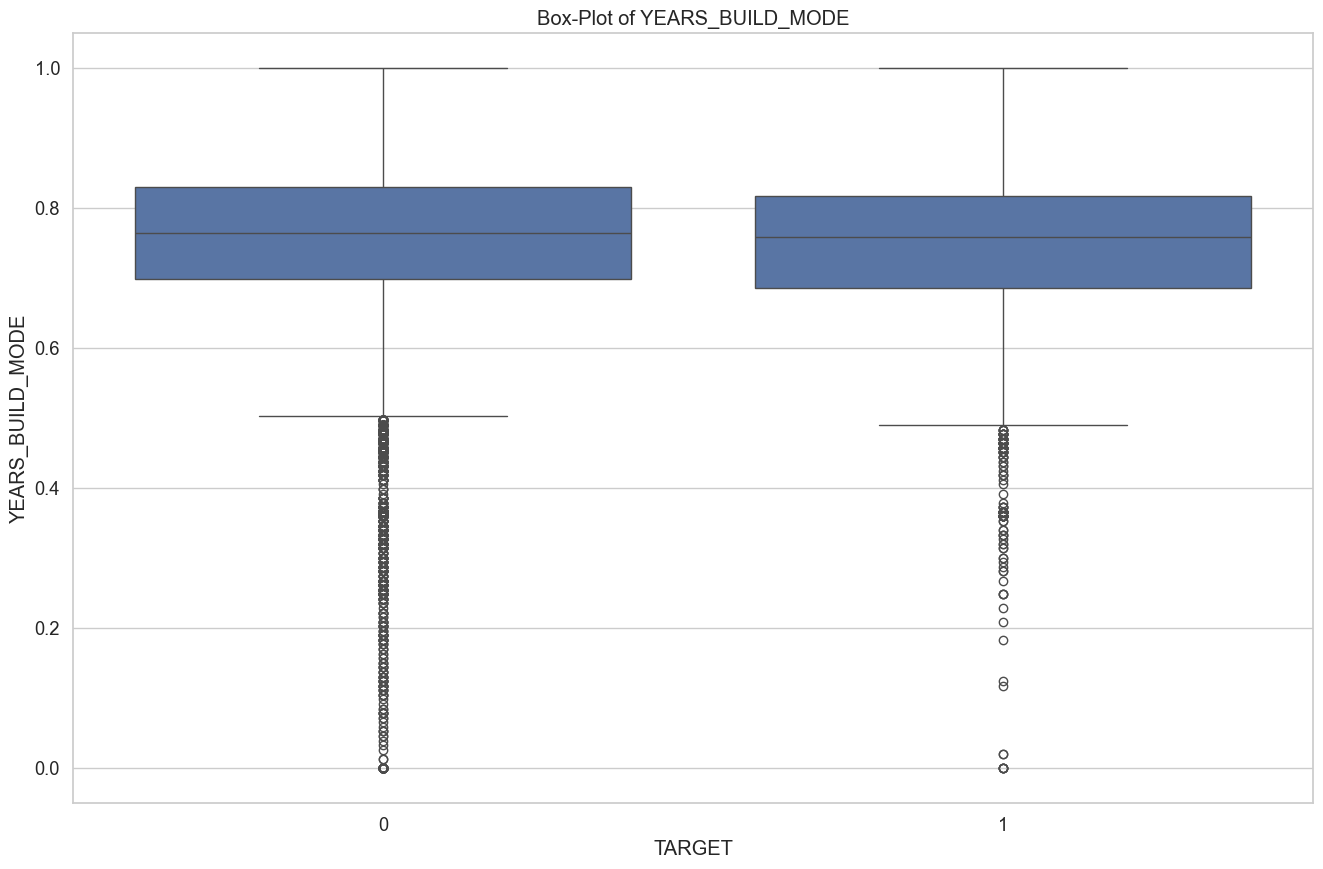

----------------------------------------------------------------------------------------------------


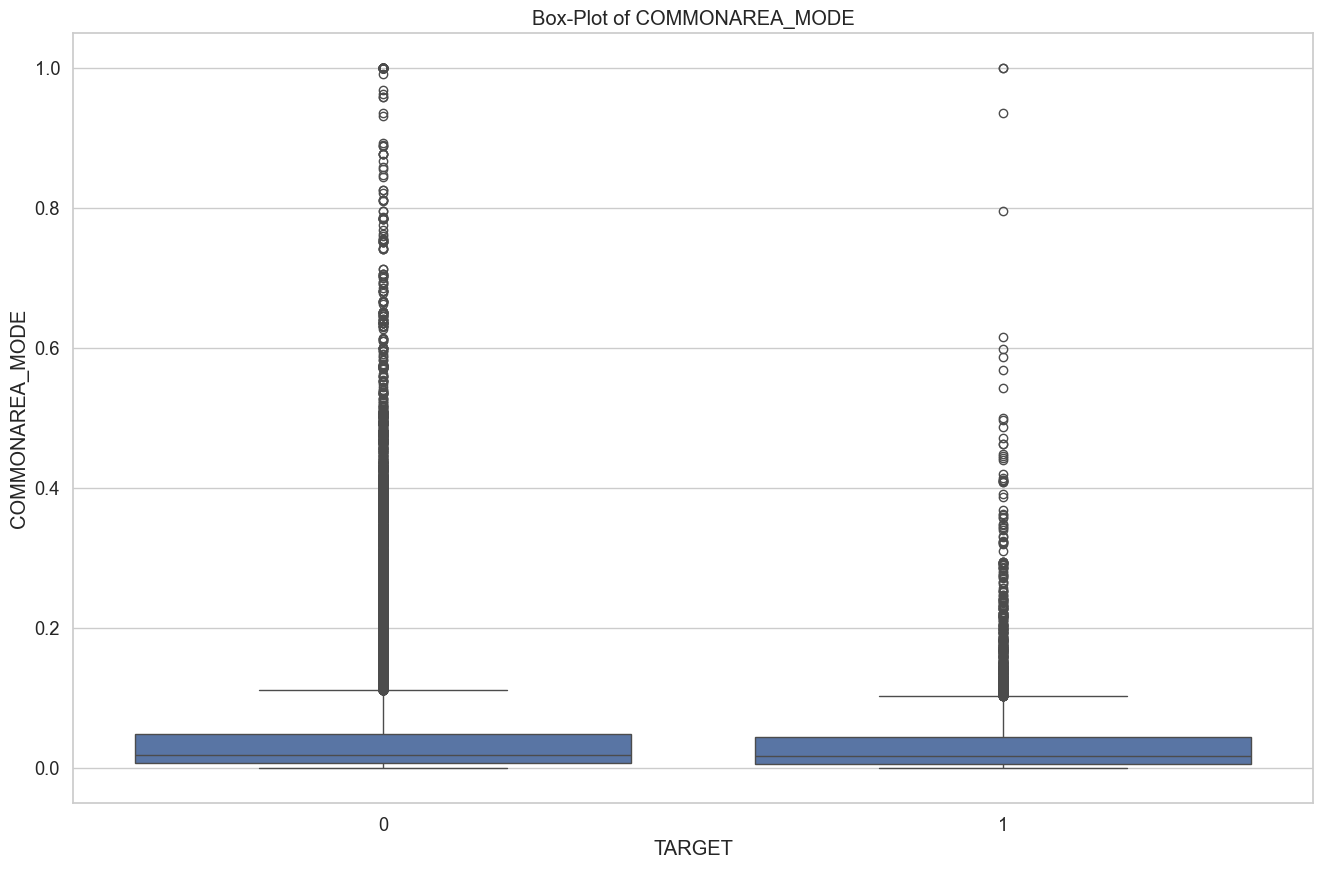

----------------------------------------------------------------------------------------------------


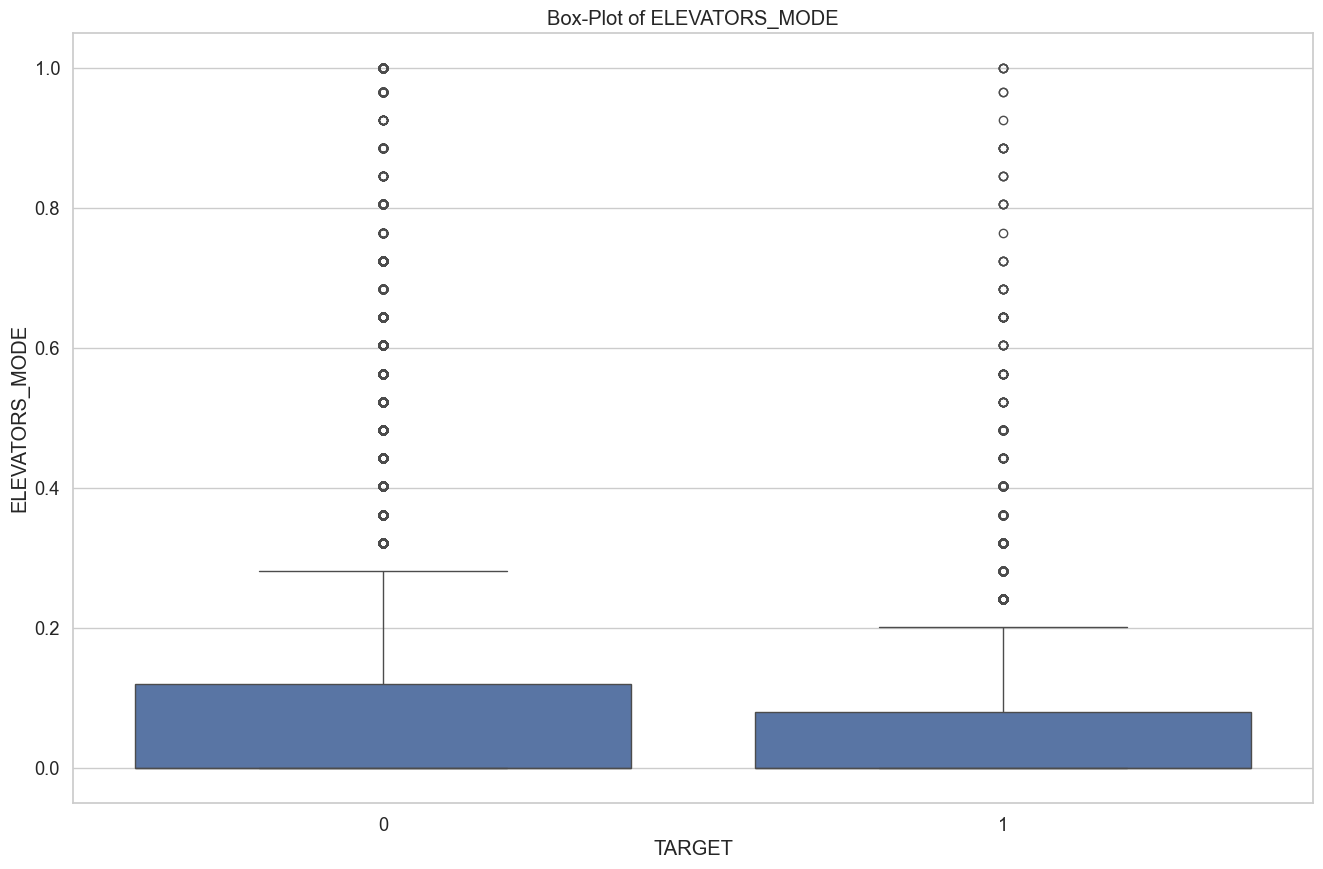

----------------------------------------------------------------------------------------------------


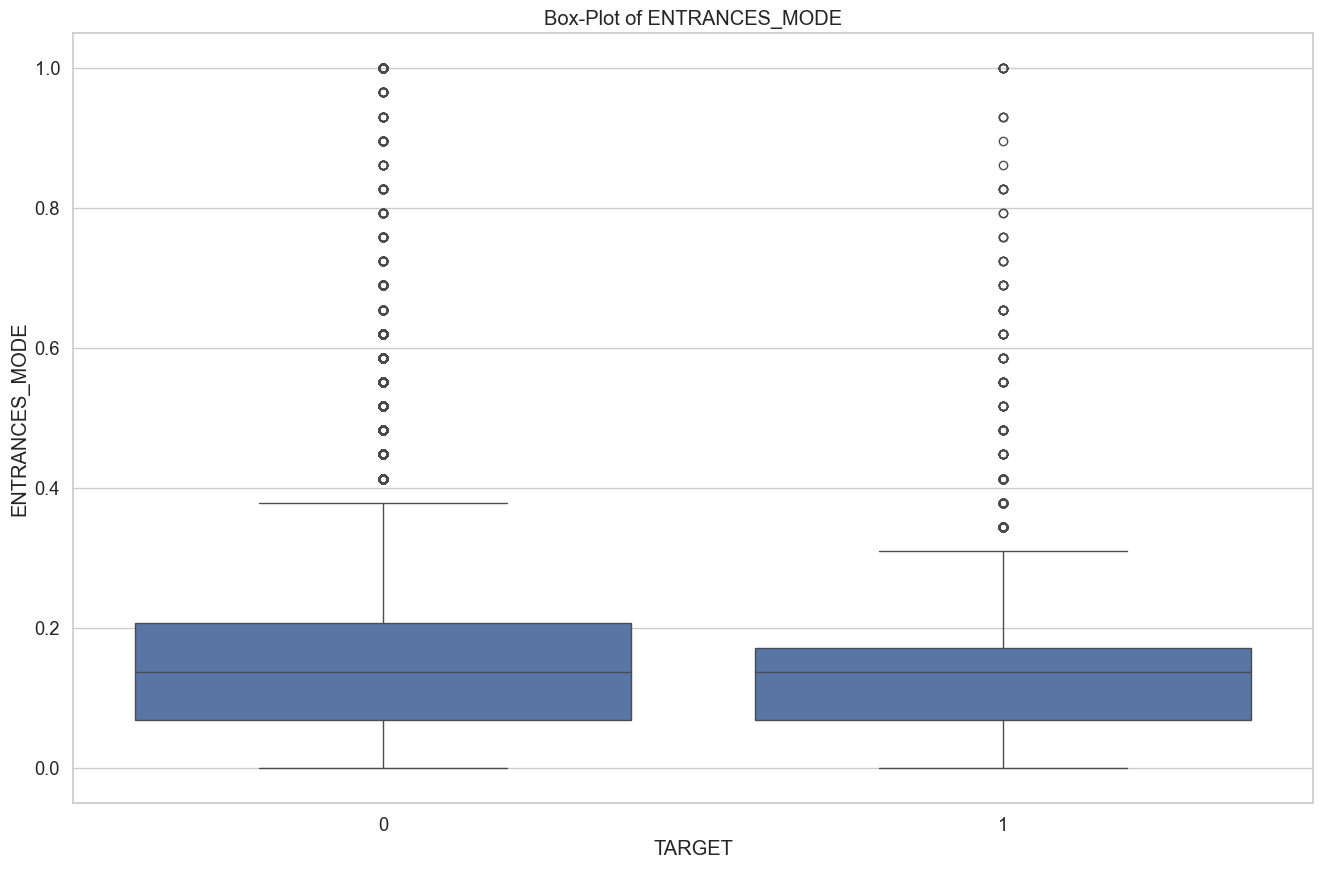

----------------------------------------------------------------------------------------------------


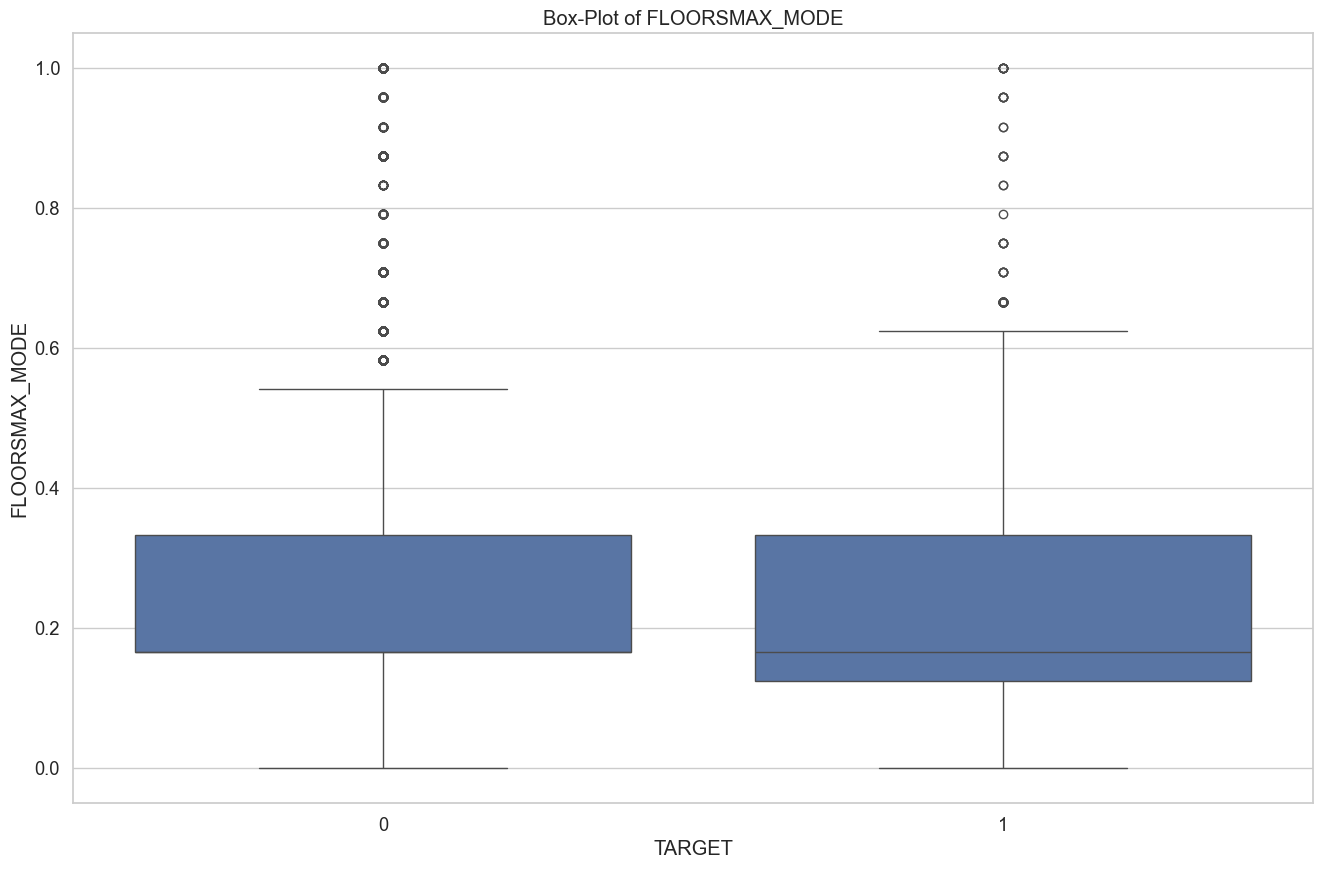

----------------------------------------------------------------------------------------------------


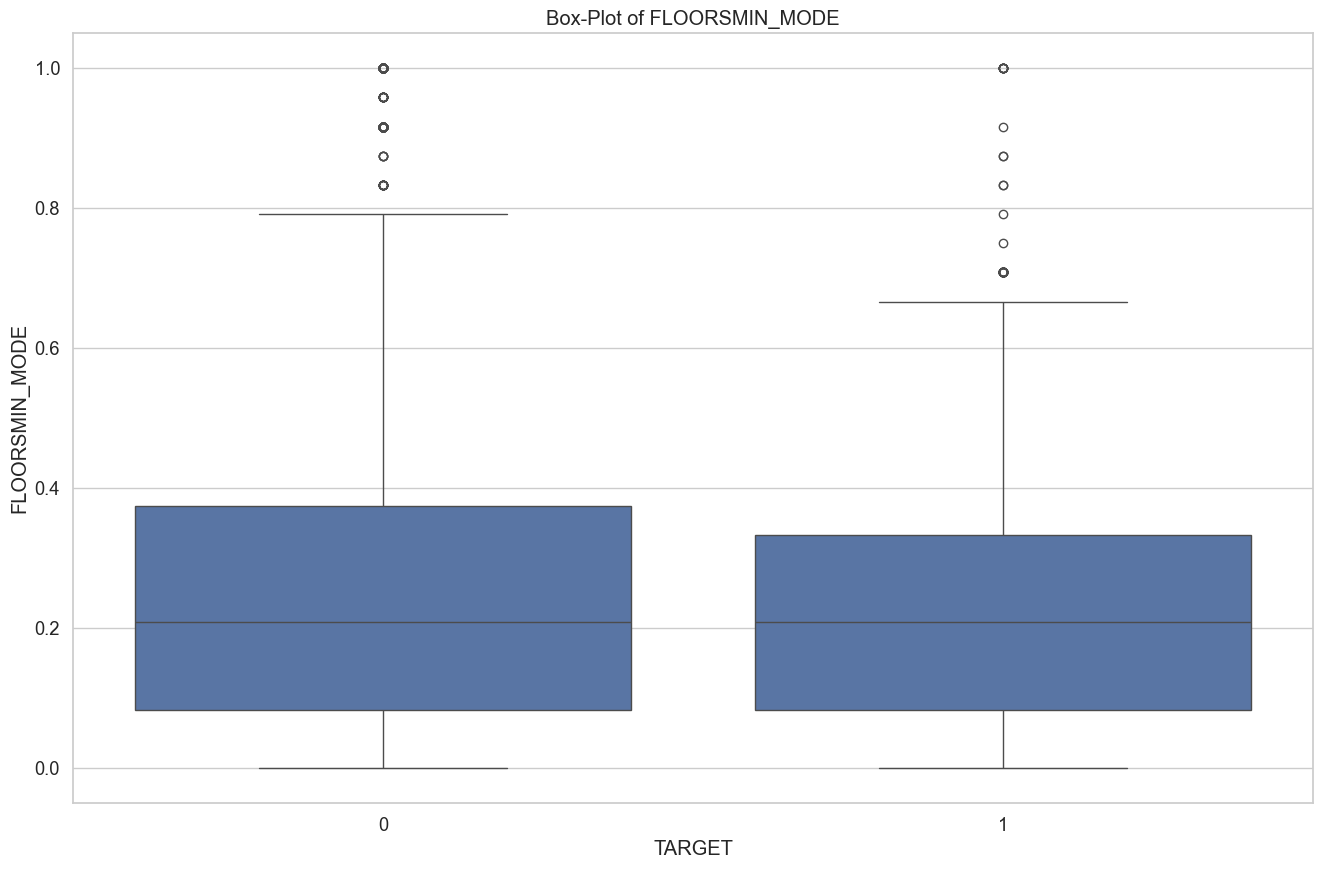

----------------------------------------------------------------------------------------------------


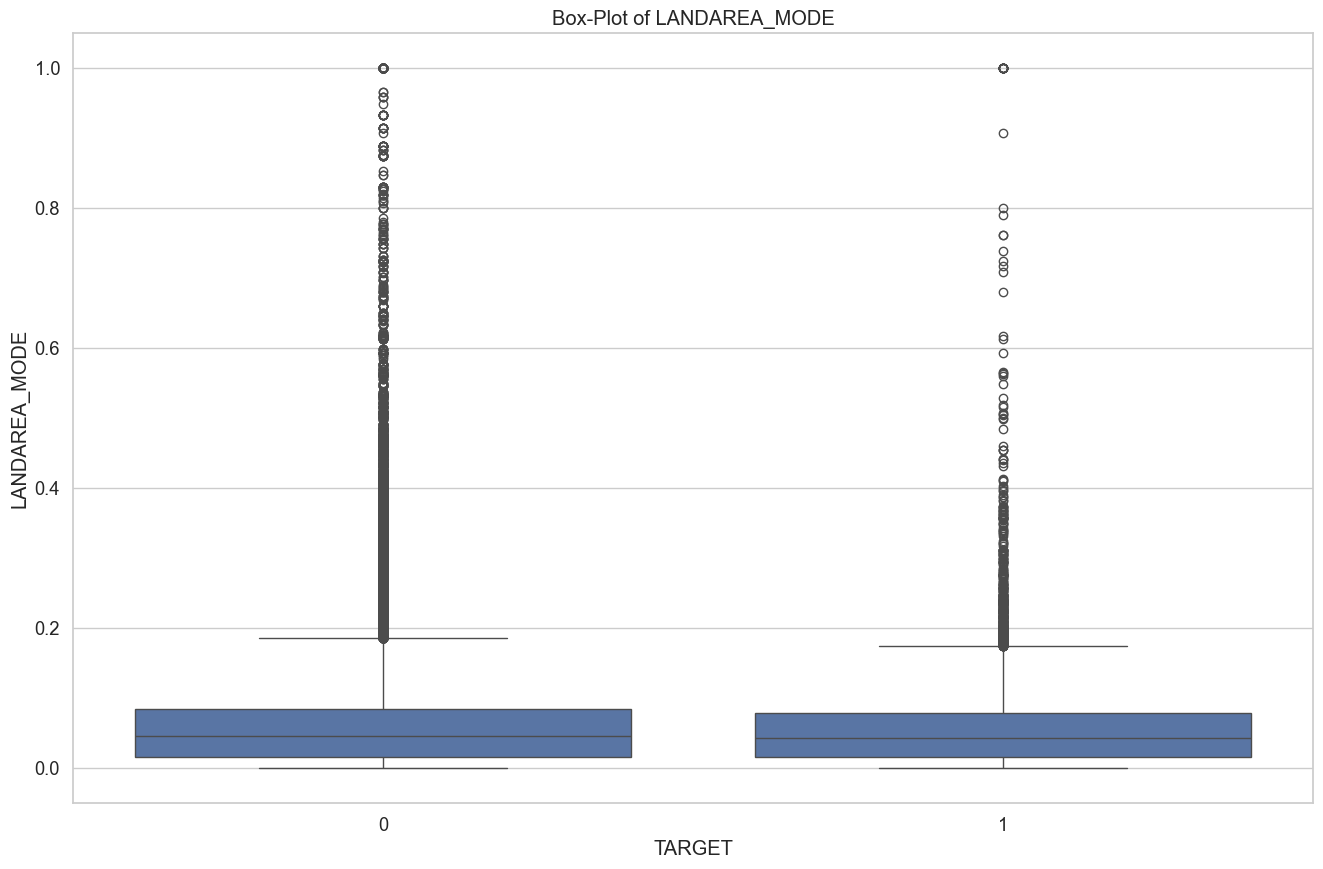

----------------------------------------------------------------------------------------------------


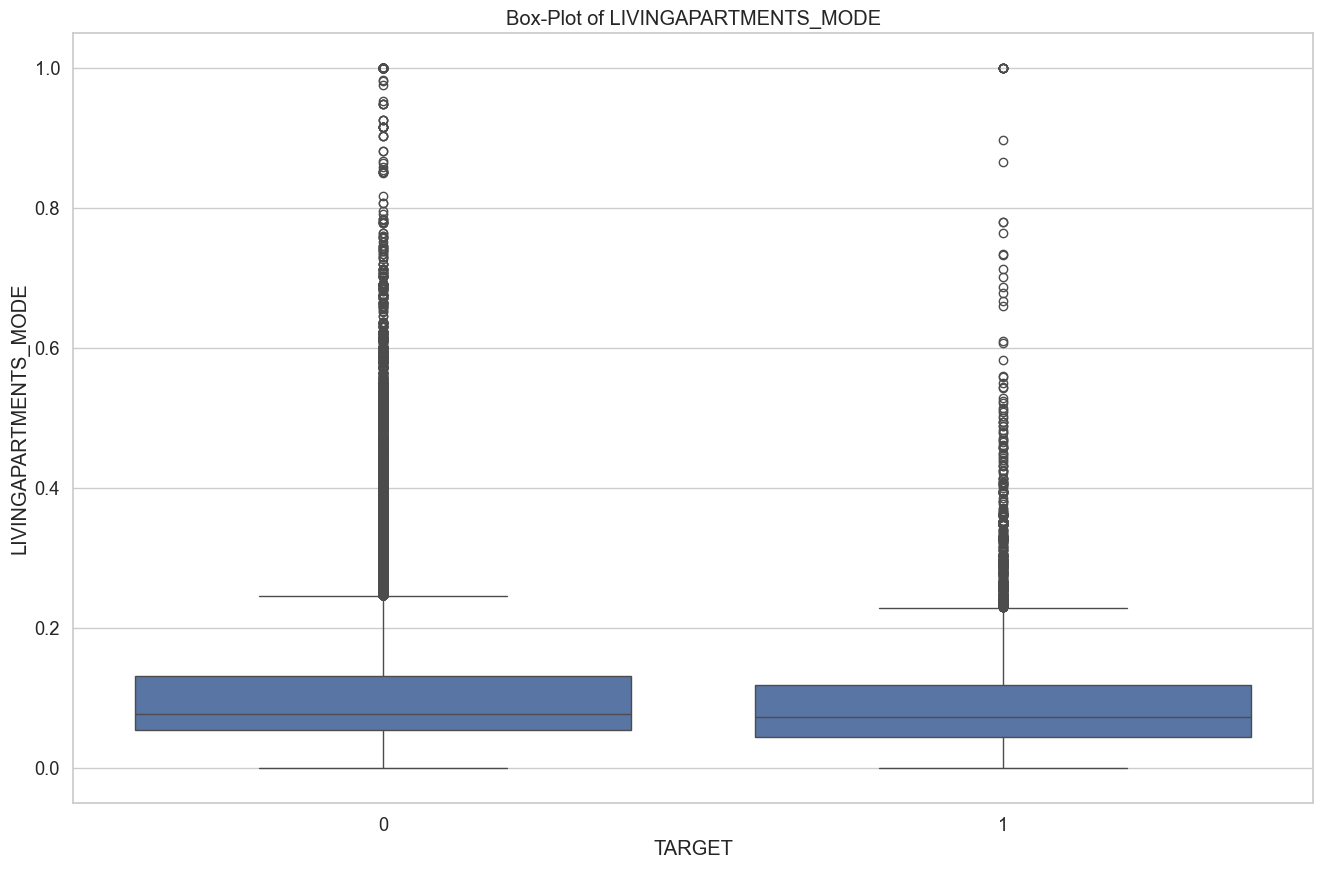

----------------------------------------------------------------------------------------------------


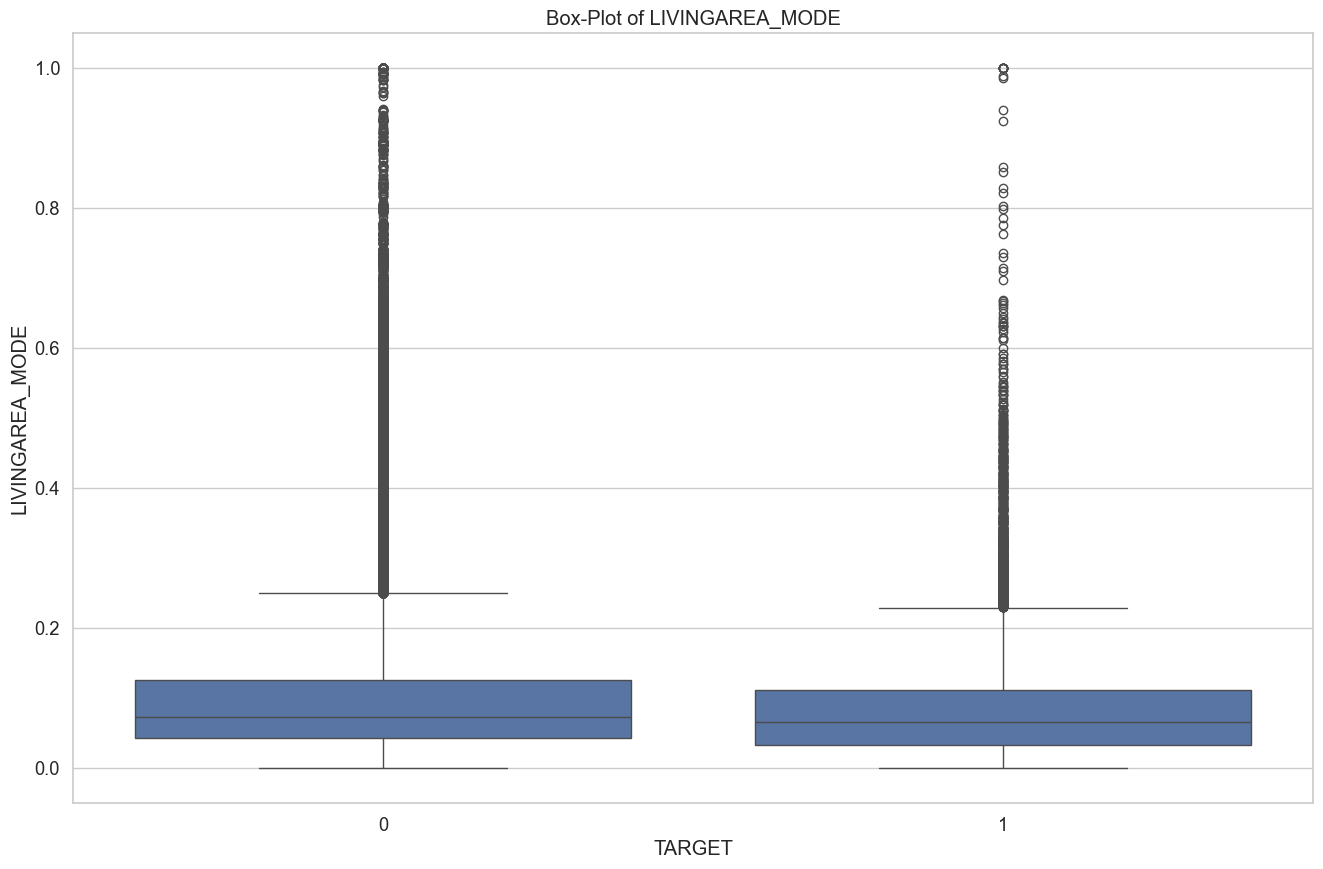

----------------------------------------------------------------------------------------------------


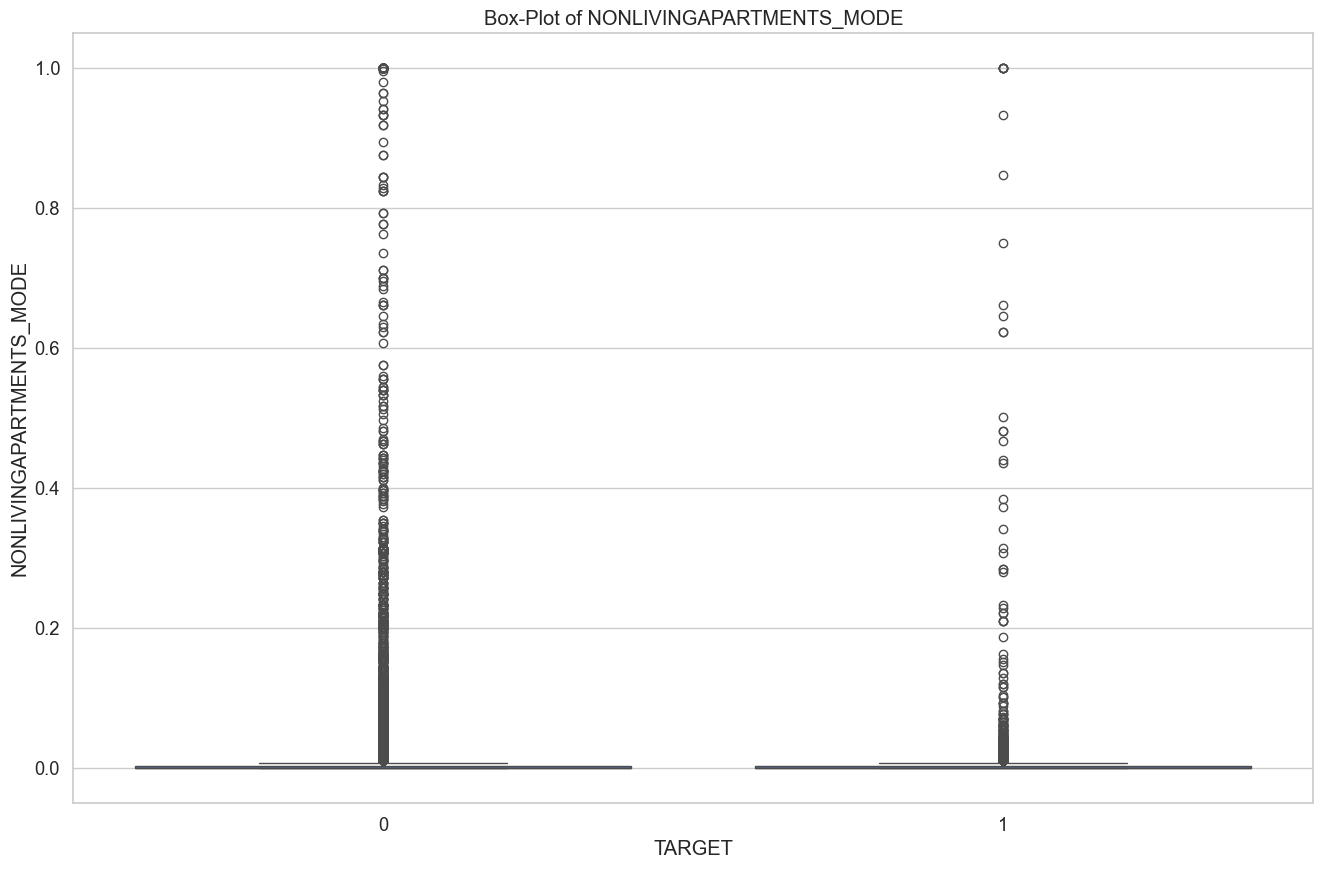

----------------------------------------------------------------------------------------------------


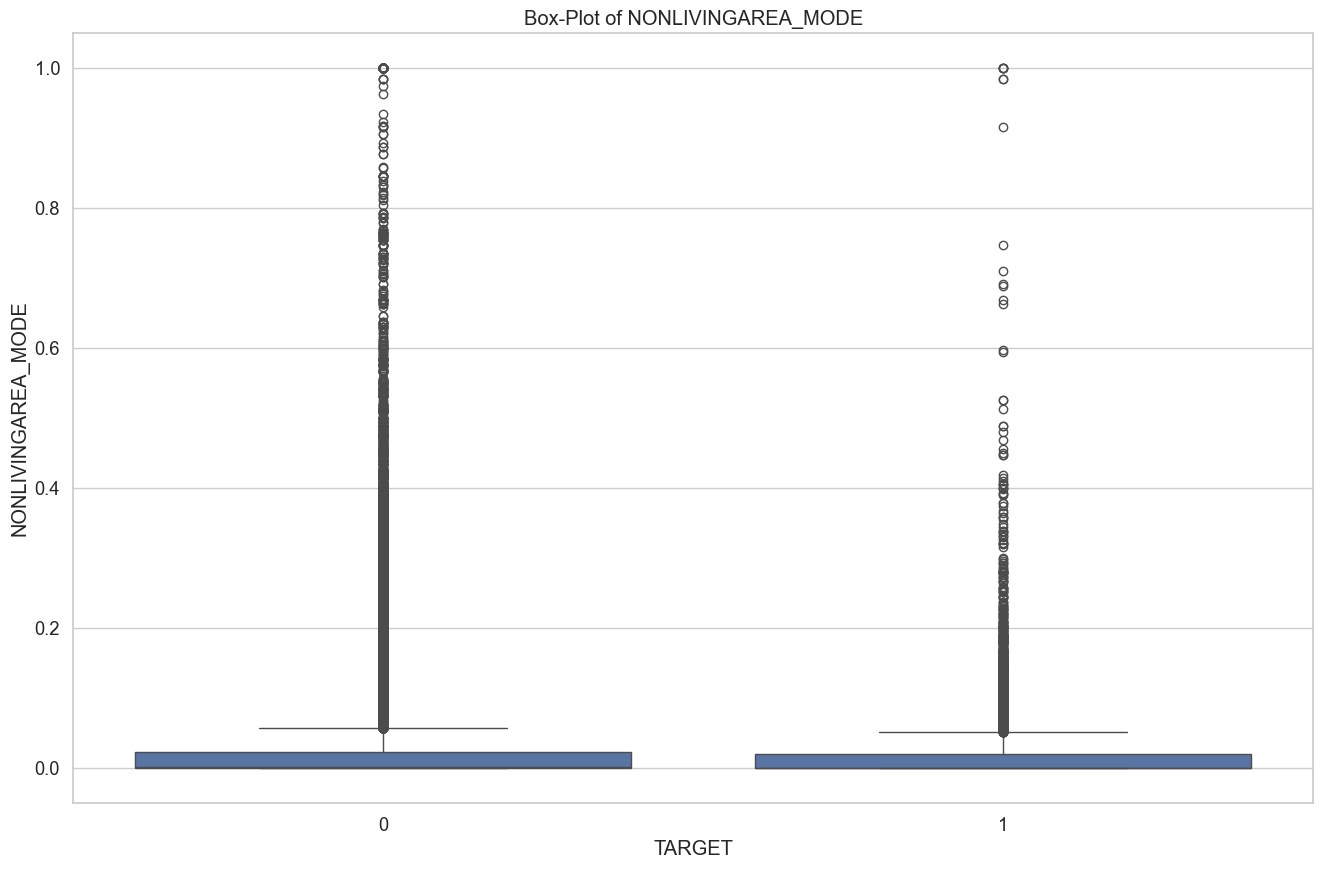

----------------------------------------------------------------------------------------------------


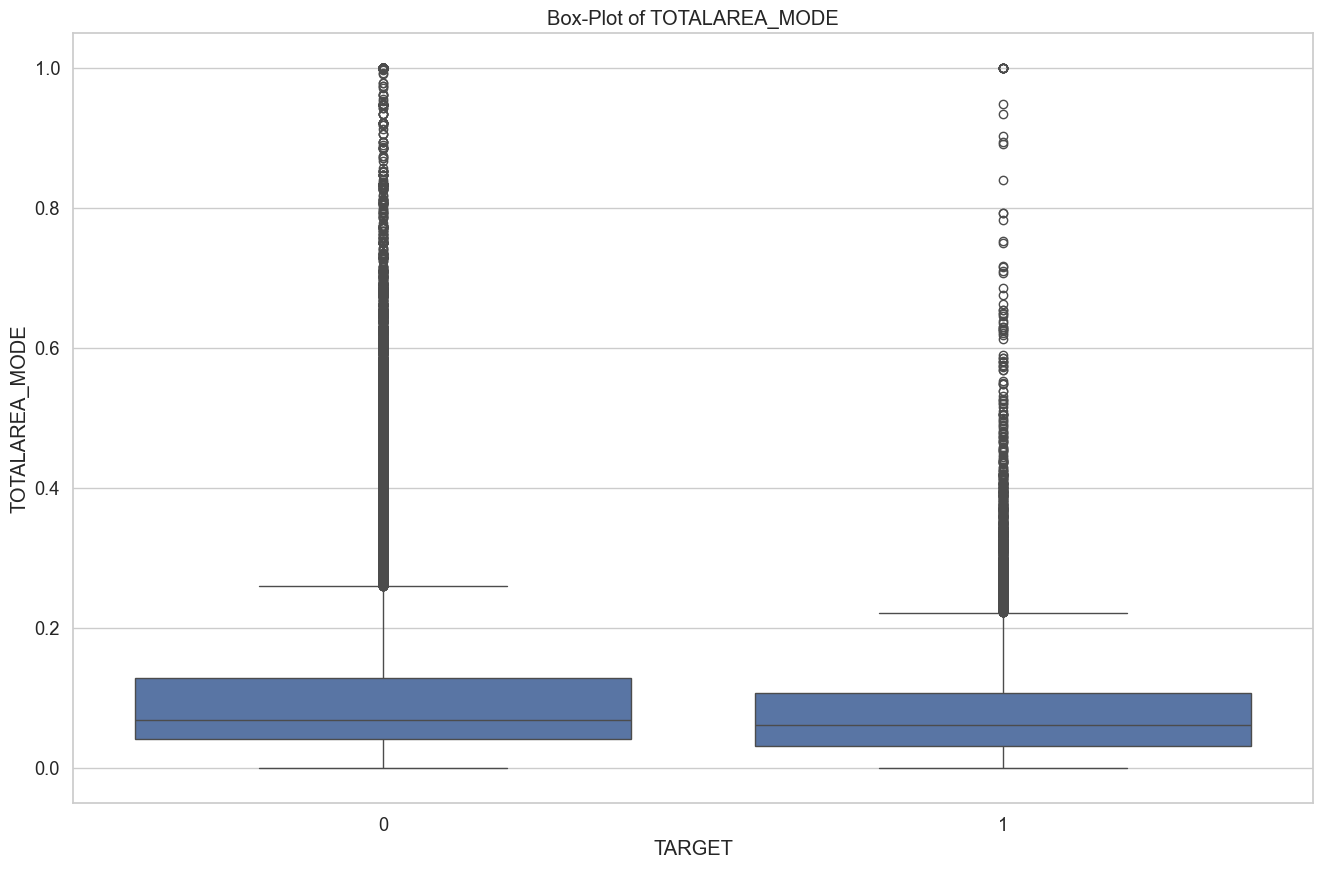

----------------------------------------------------------------------------------------------------


In [193]:
for column in columns_to_check:
    plot_continuous_variables(application_train, column_name = column, plots = ['box'], figsize = (16,10))
    print('-'*100)

#### l. Distribution of Continuous Variable 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'

In [194]:
columns_to_check =['APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',]
a = df[df['Row'].isin(columns_to_check)]['Description']
for des in a:
    print (des)

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, liv

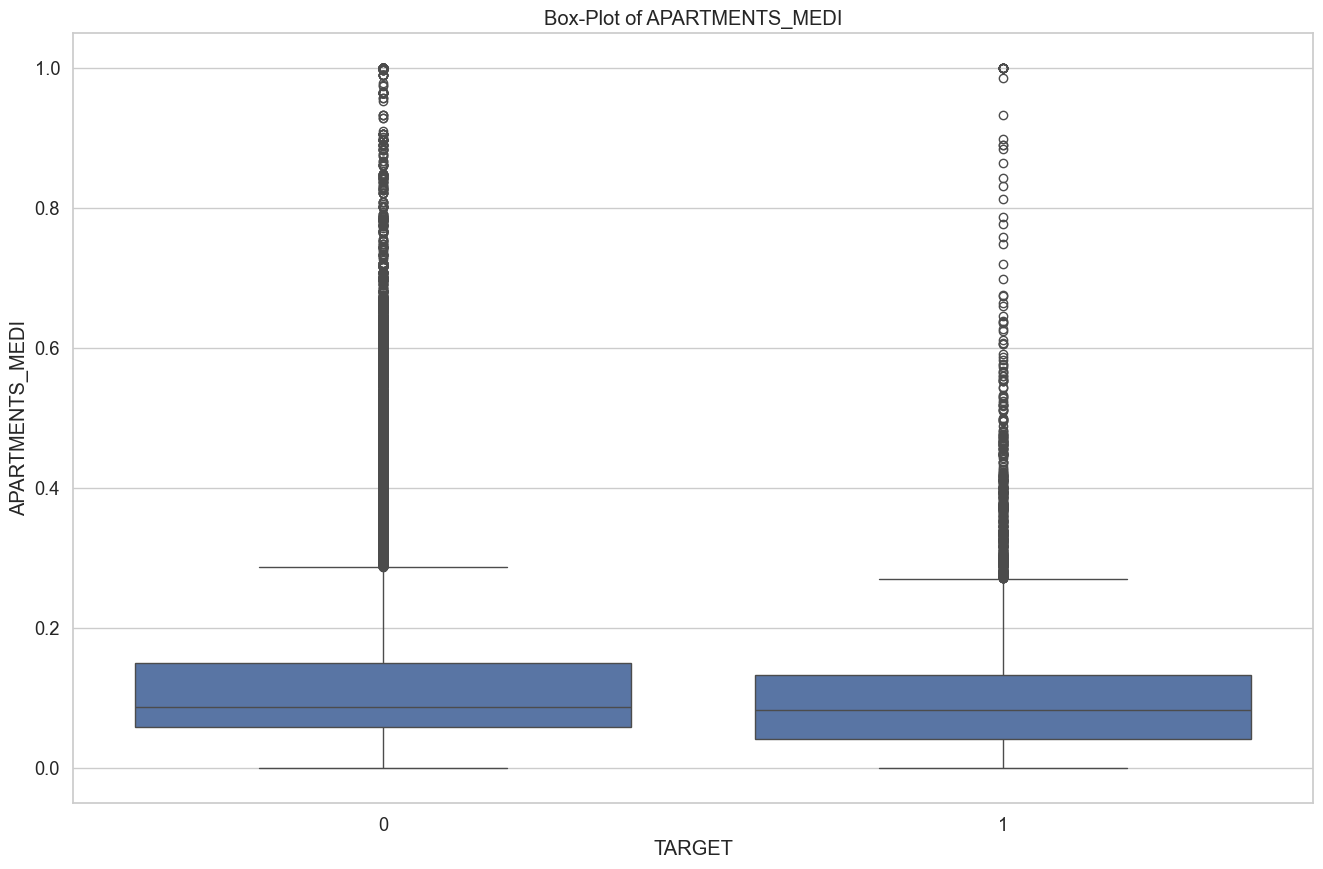

----------------------------------------------------------------------------------------------------


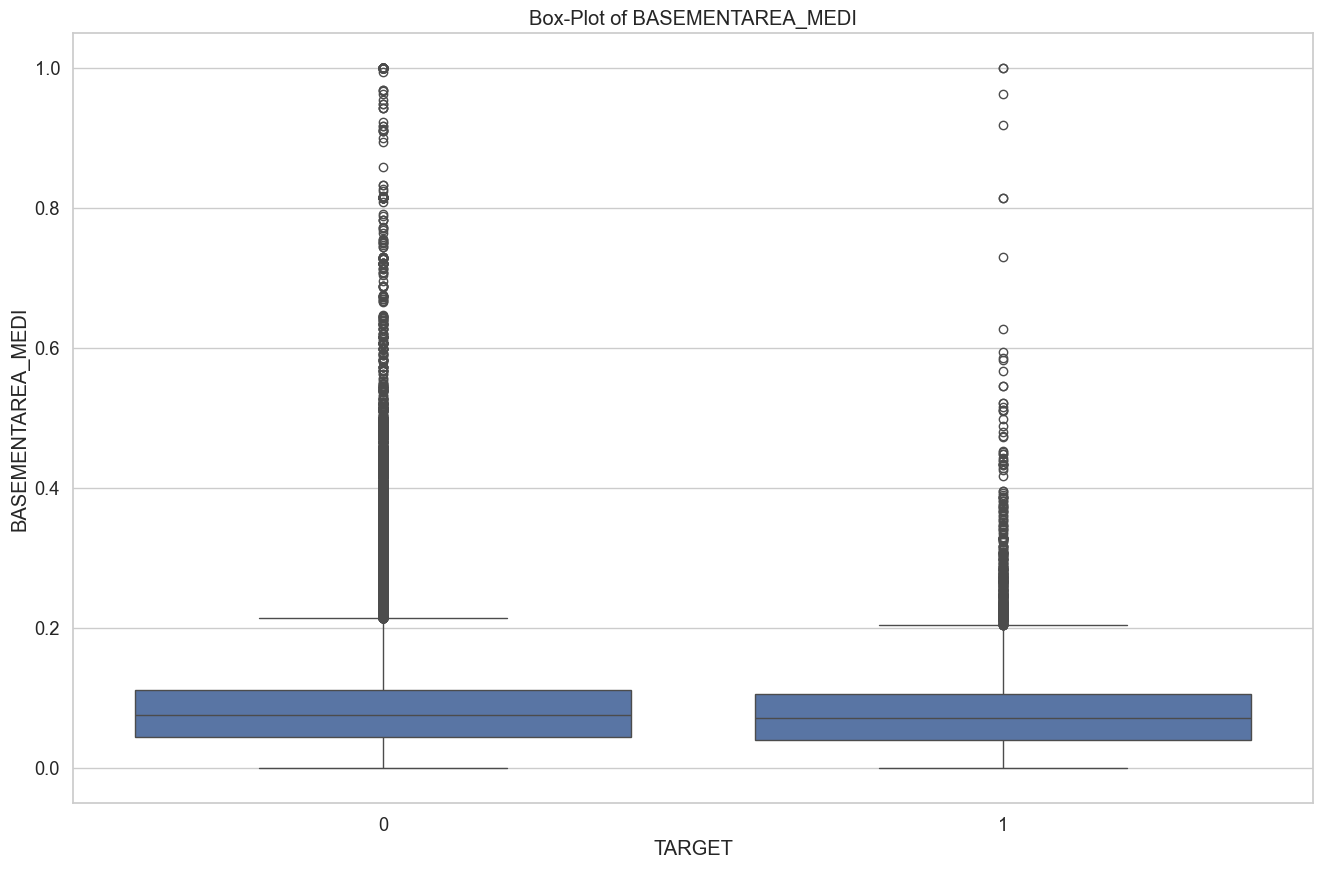

----------------------------------------------------------------------------------------------------


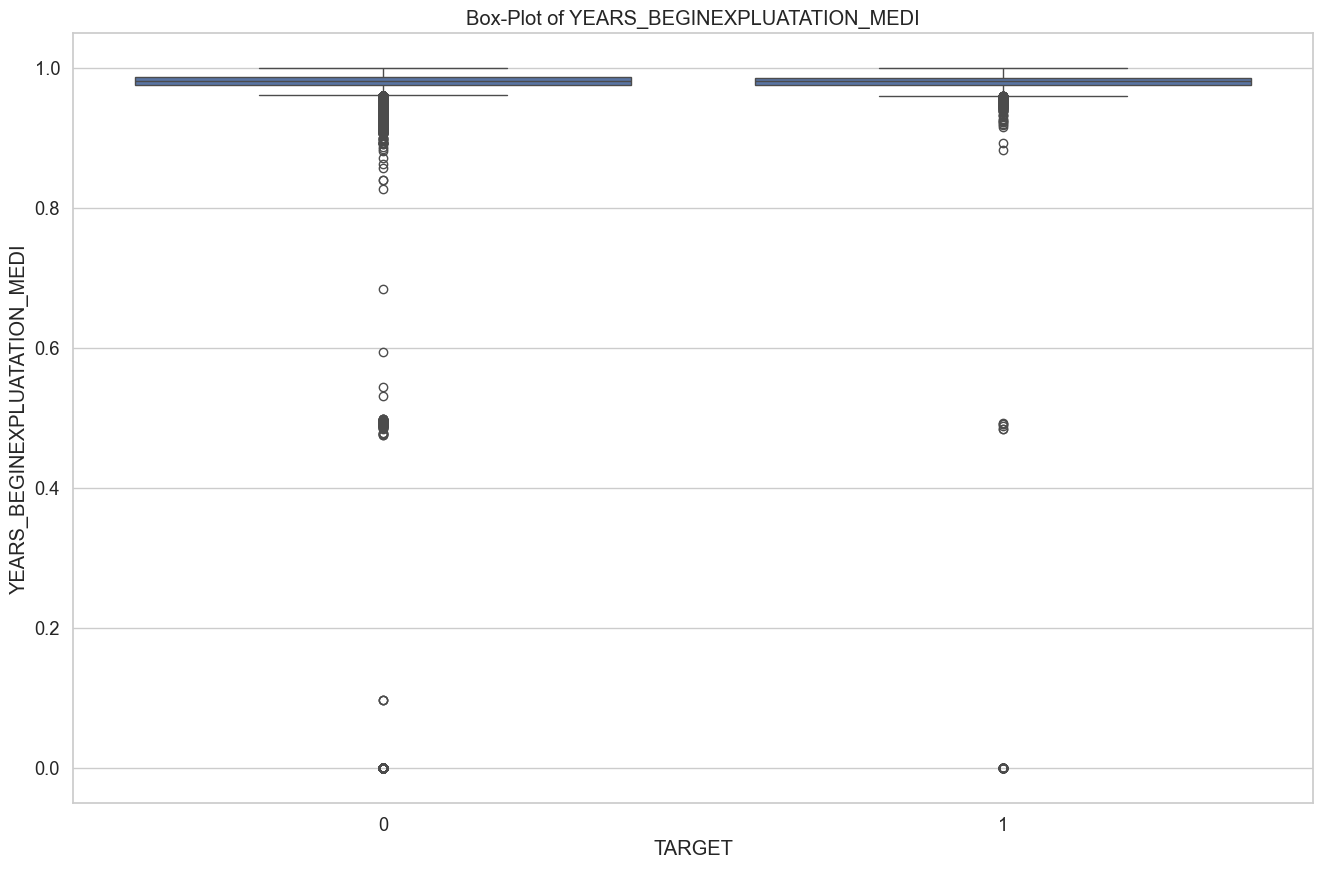

----------------------------------------------------------------------------------------------------


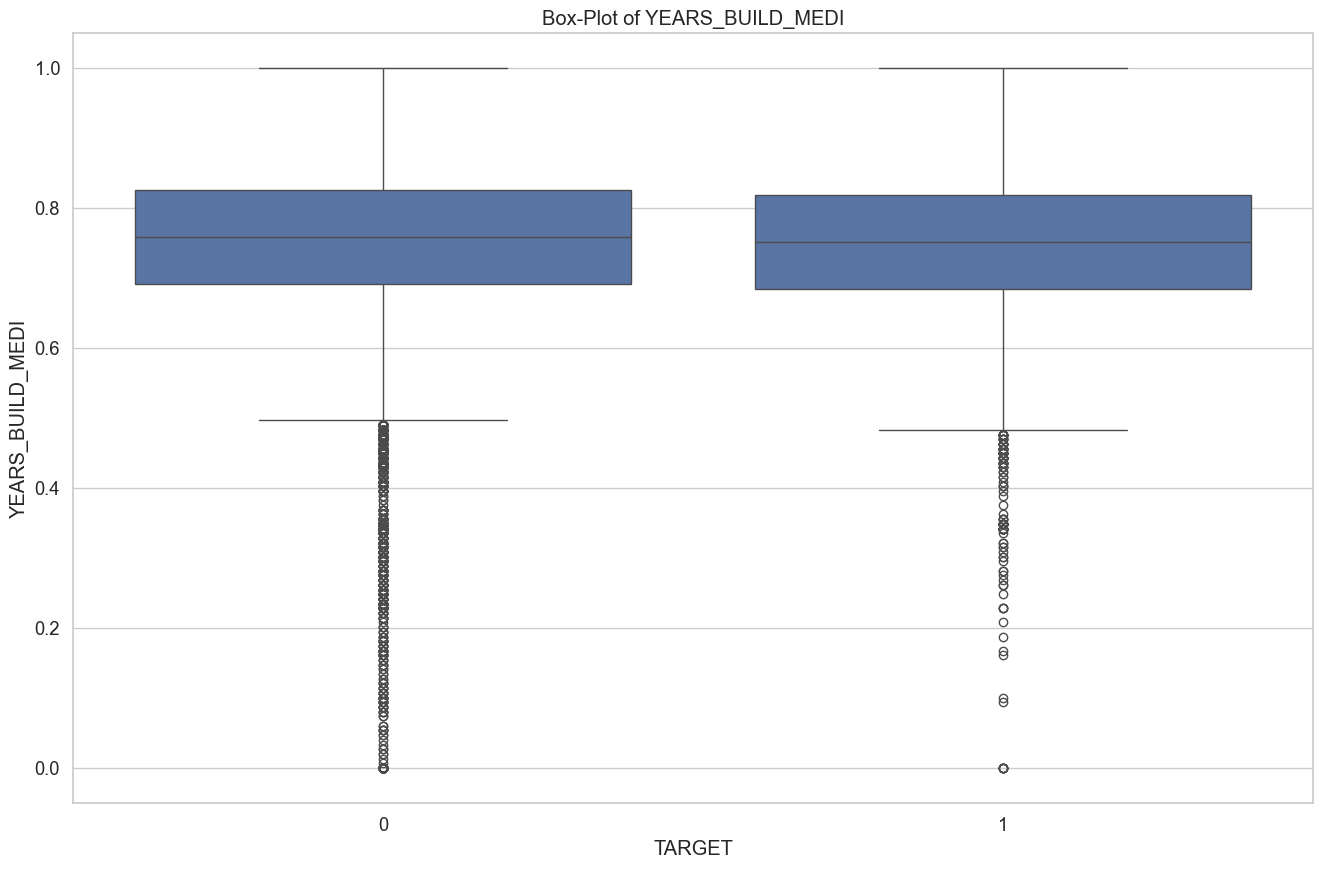

----------------------------------------------------------------------------------------------------


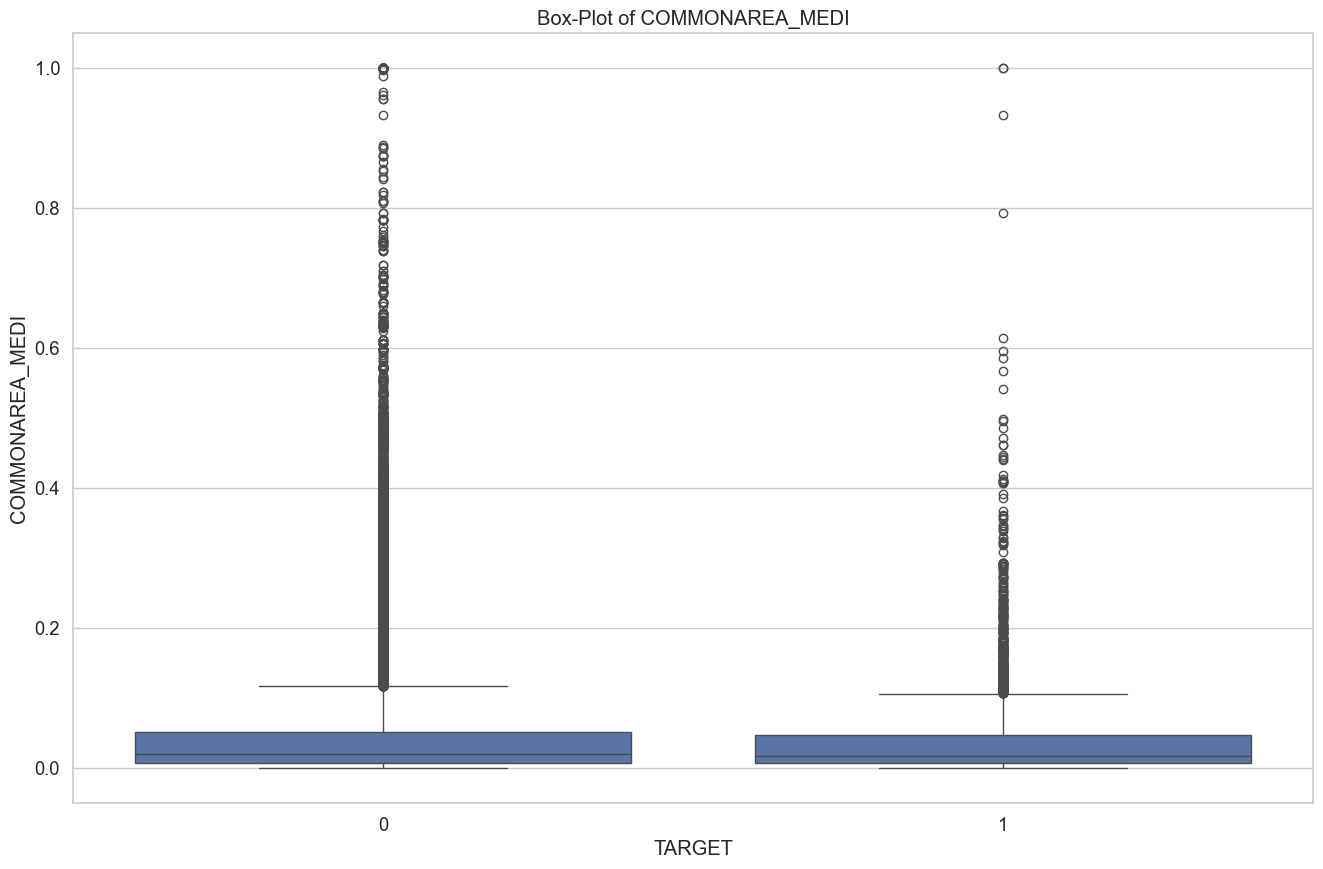

----------------------------------------------------------------------------------------------------


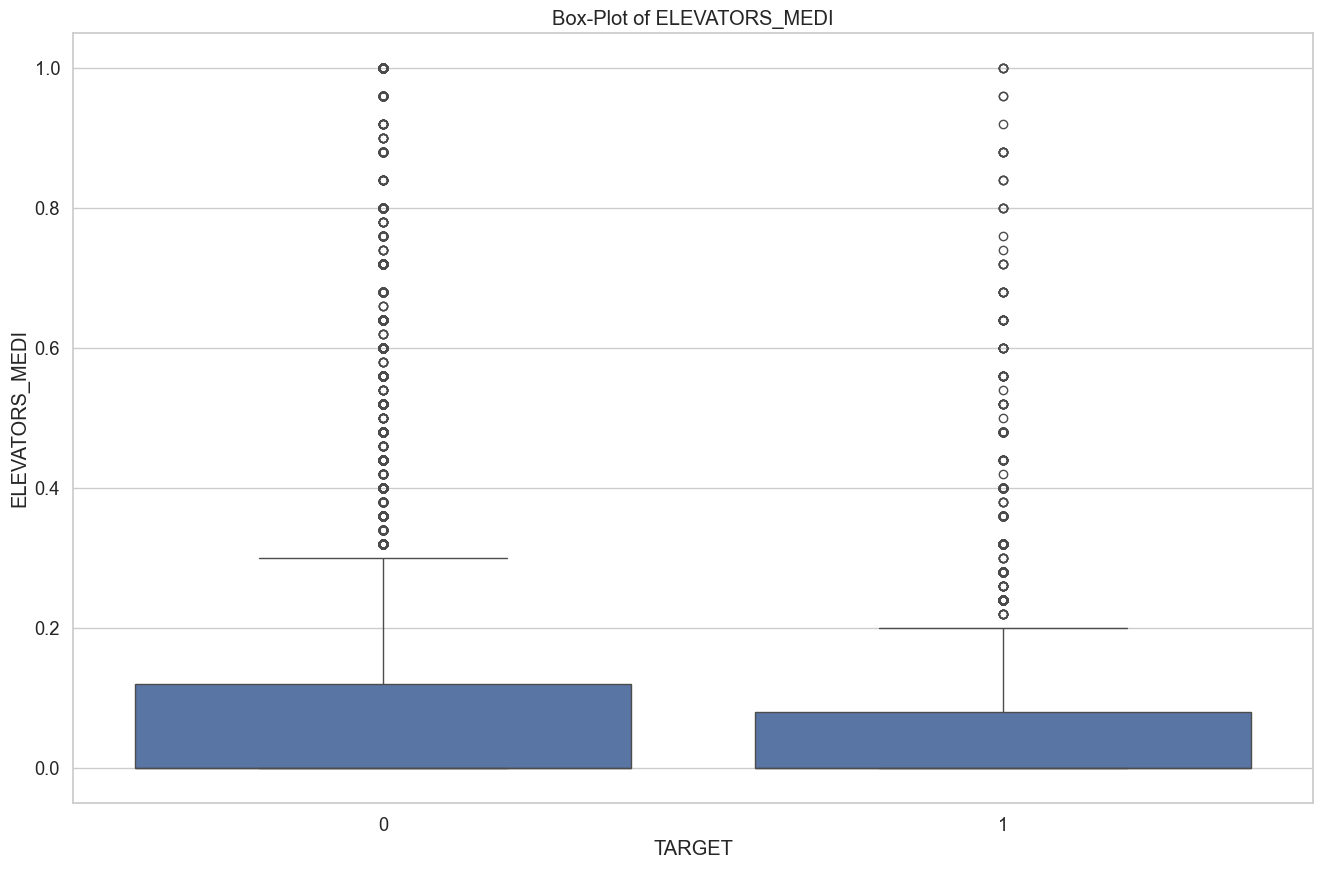

----------------------------------------------------------------------------------------------------


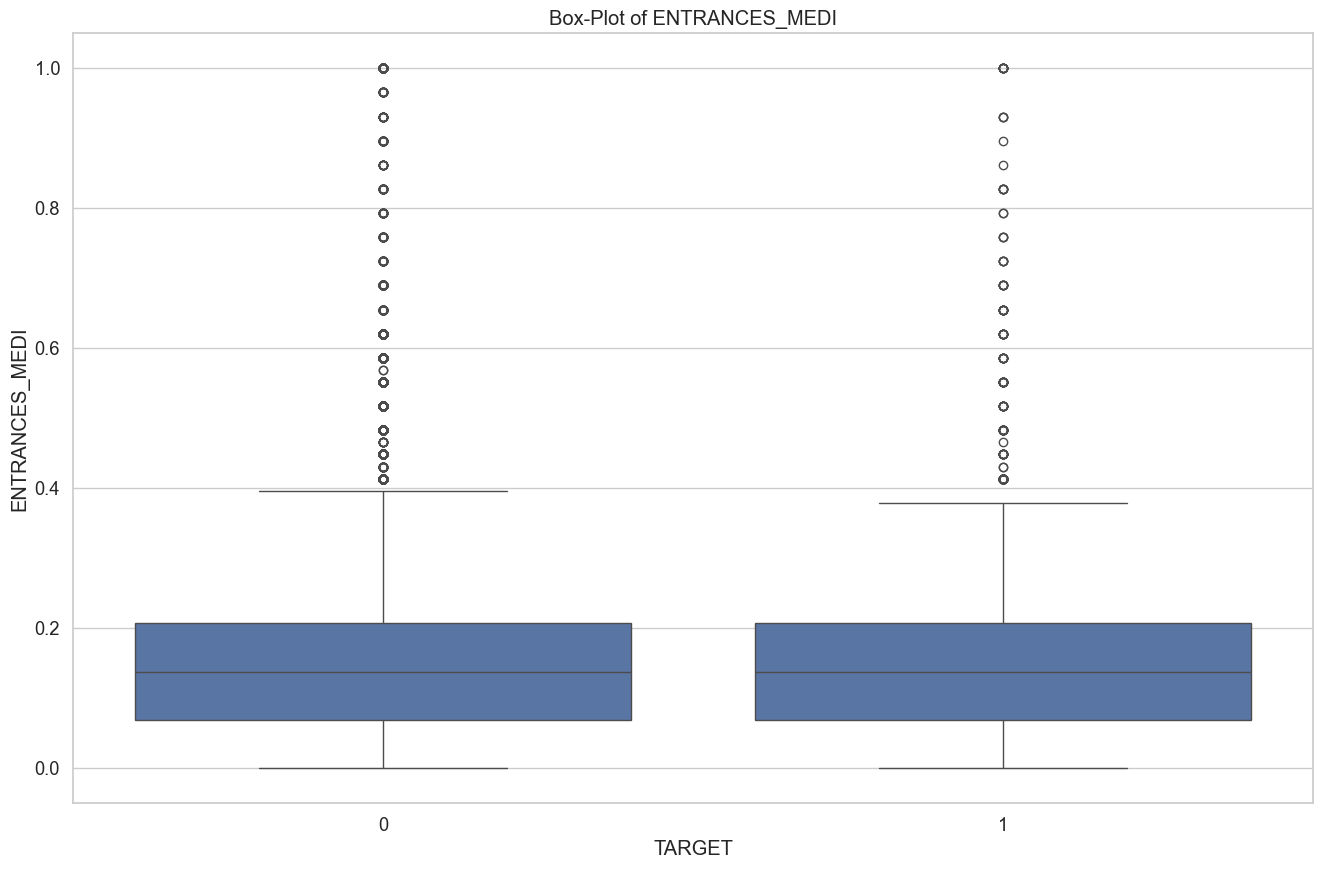

----------------------------------------------------------------------------------------------------


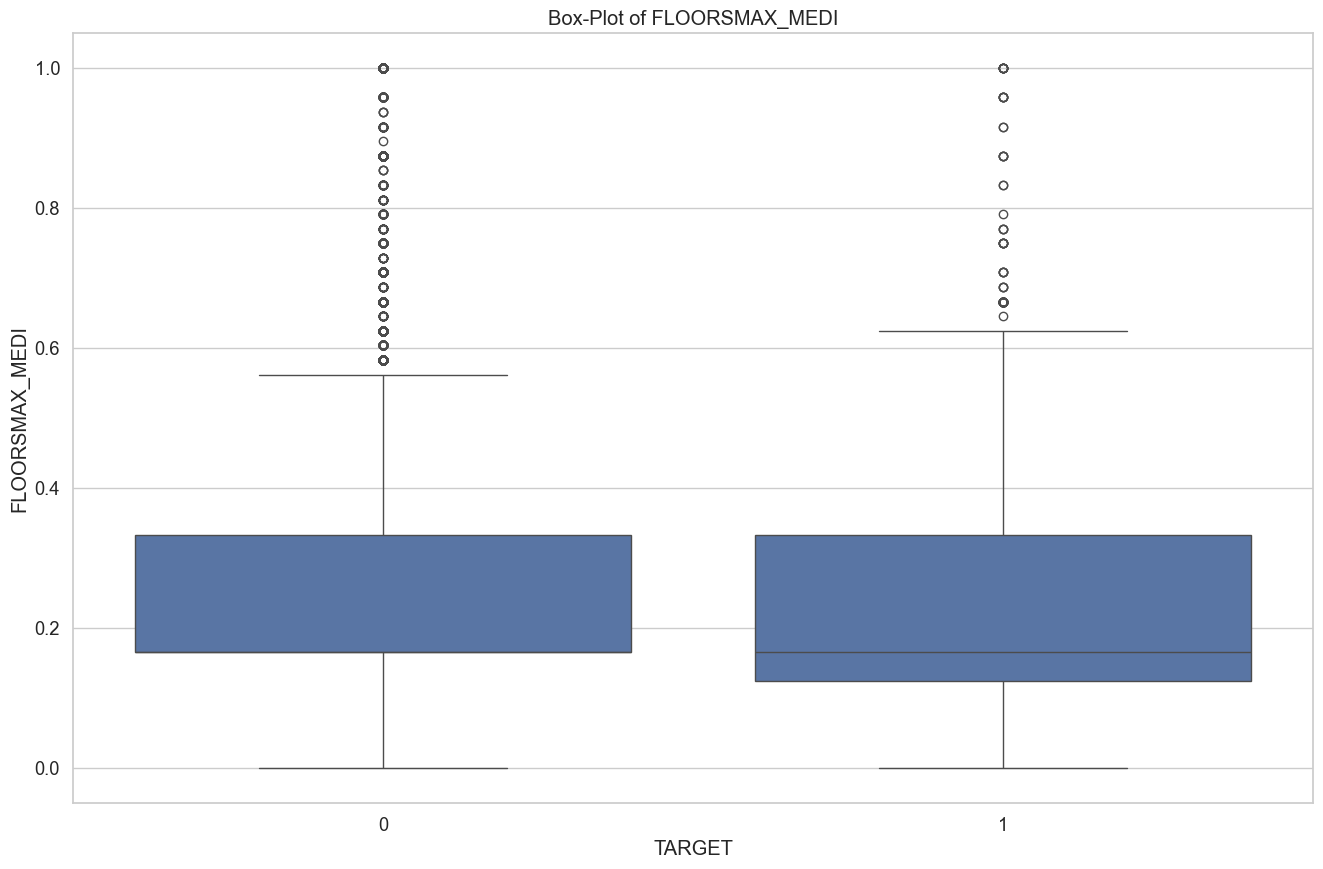

----------------------------------------------------------------------------------------------------


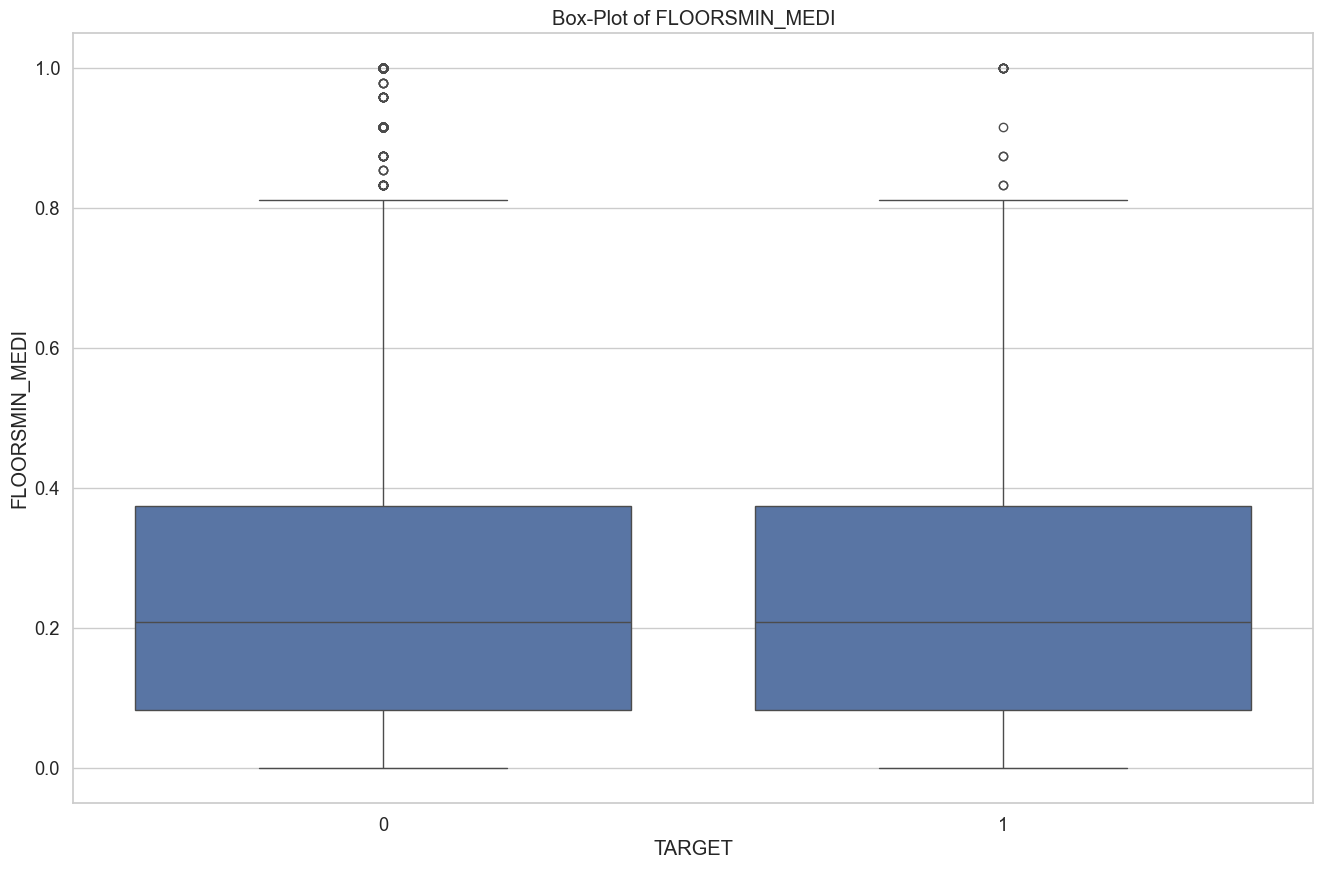

----------------------------------------------------------------------------------------------------


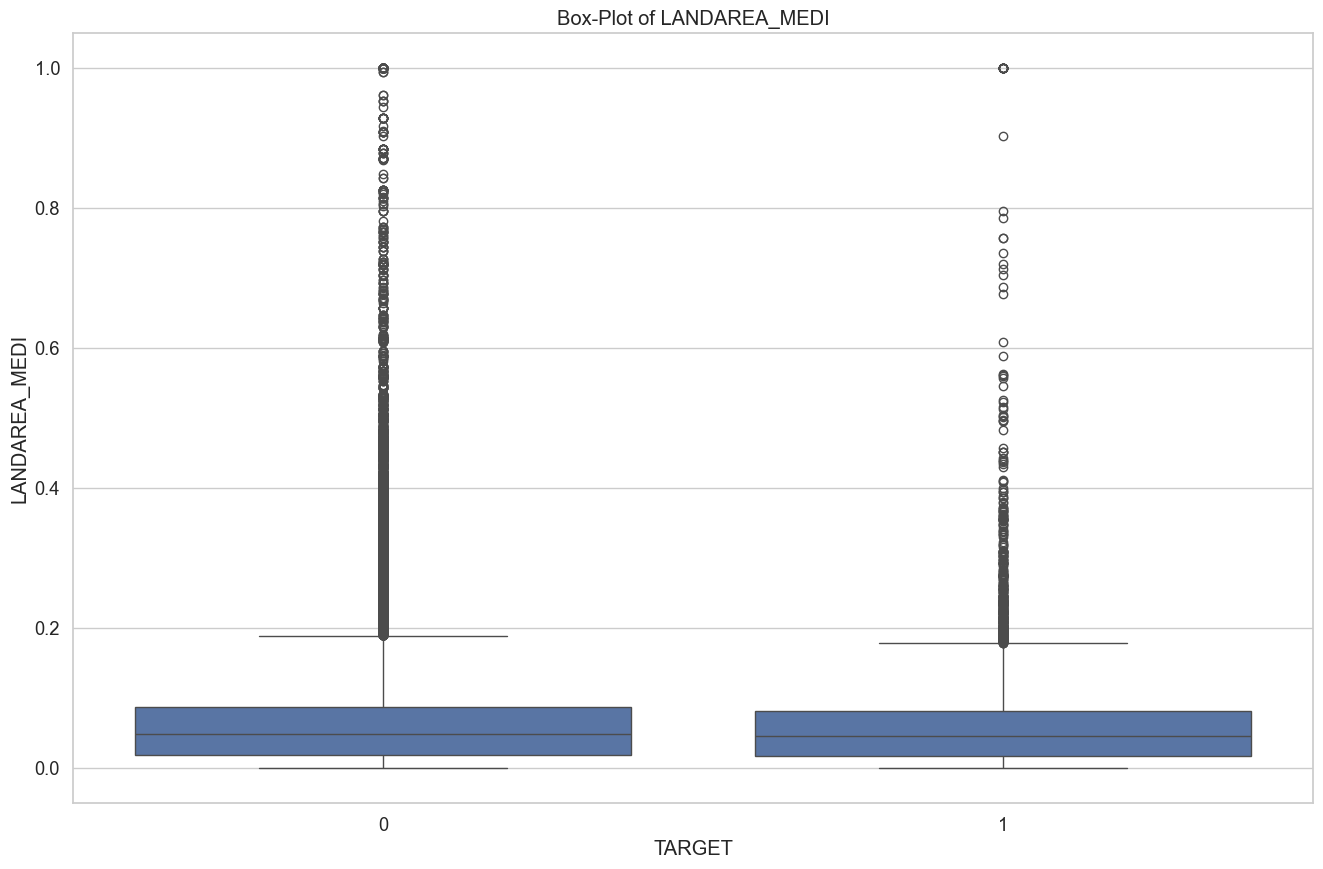

----------------------------------------------------------------------------------------------------


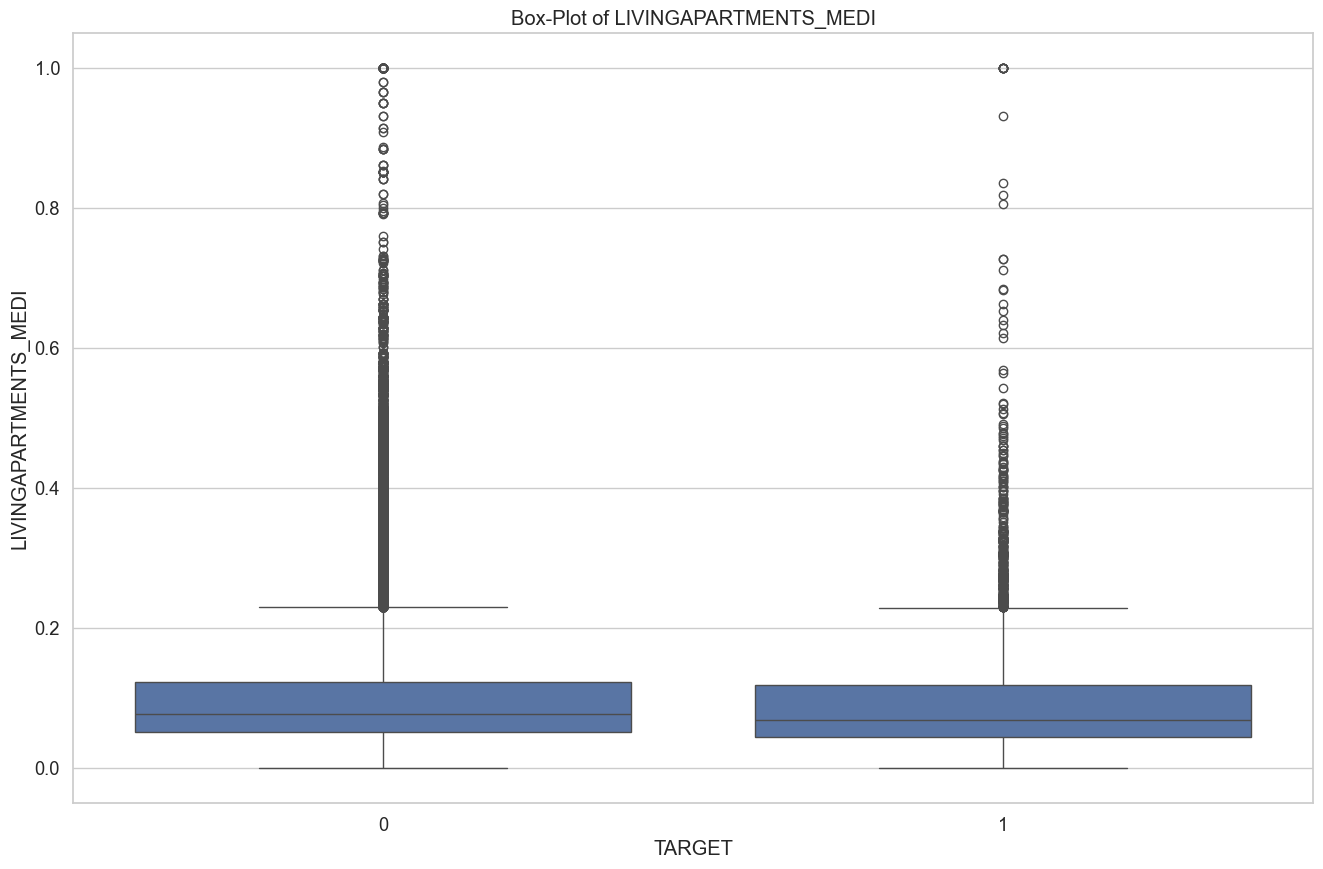

----------------------------------------------------------------------------------------------------


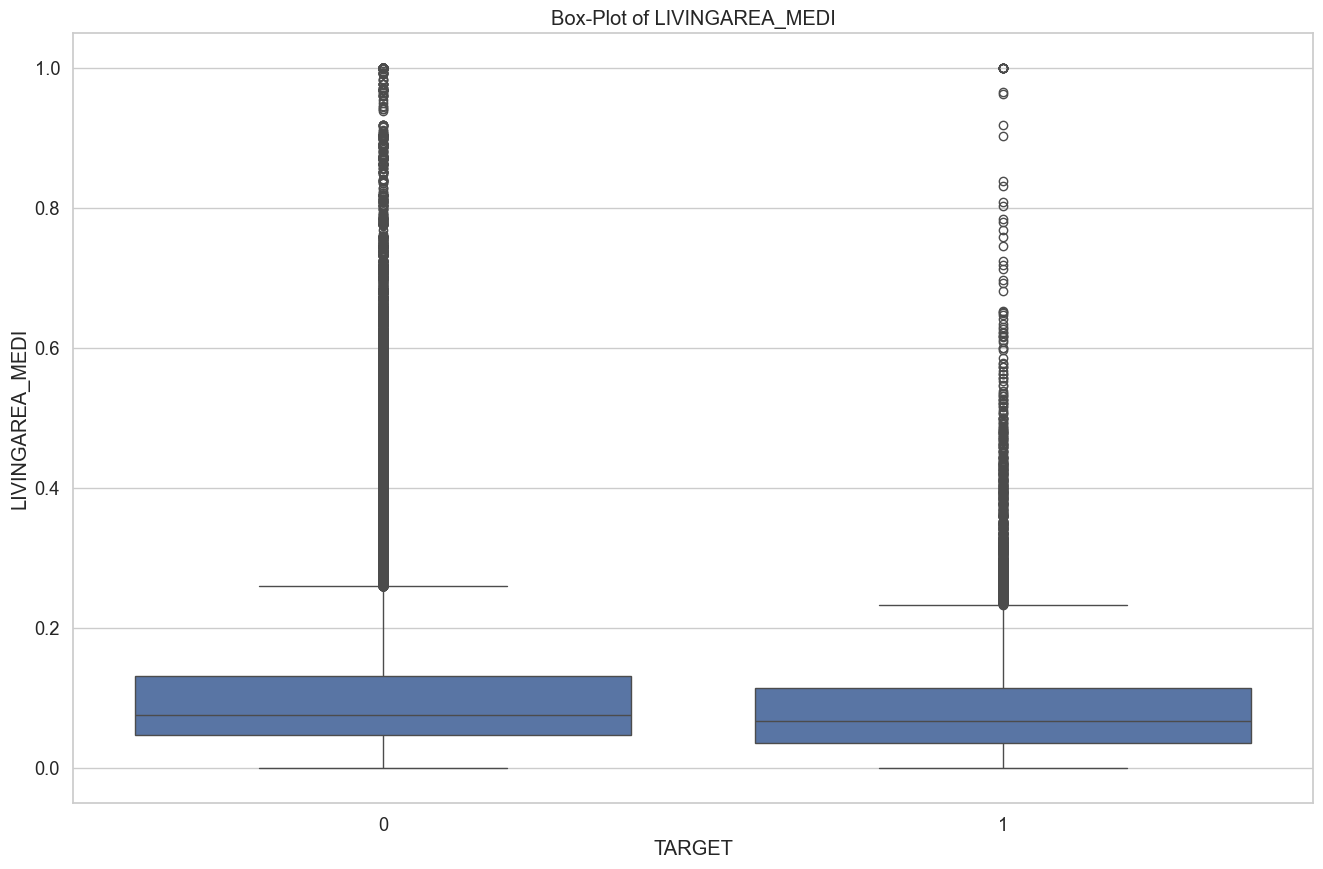

----------------------------------------------------------------------------------------------------


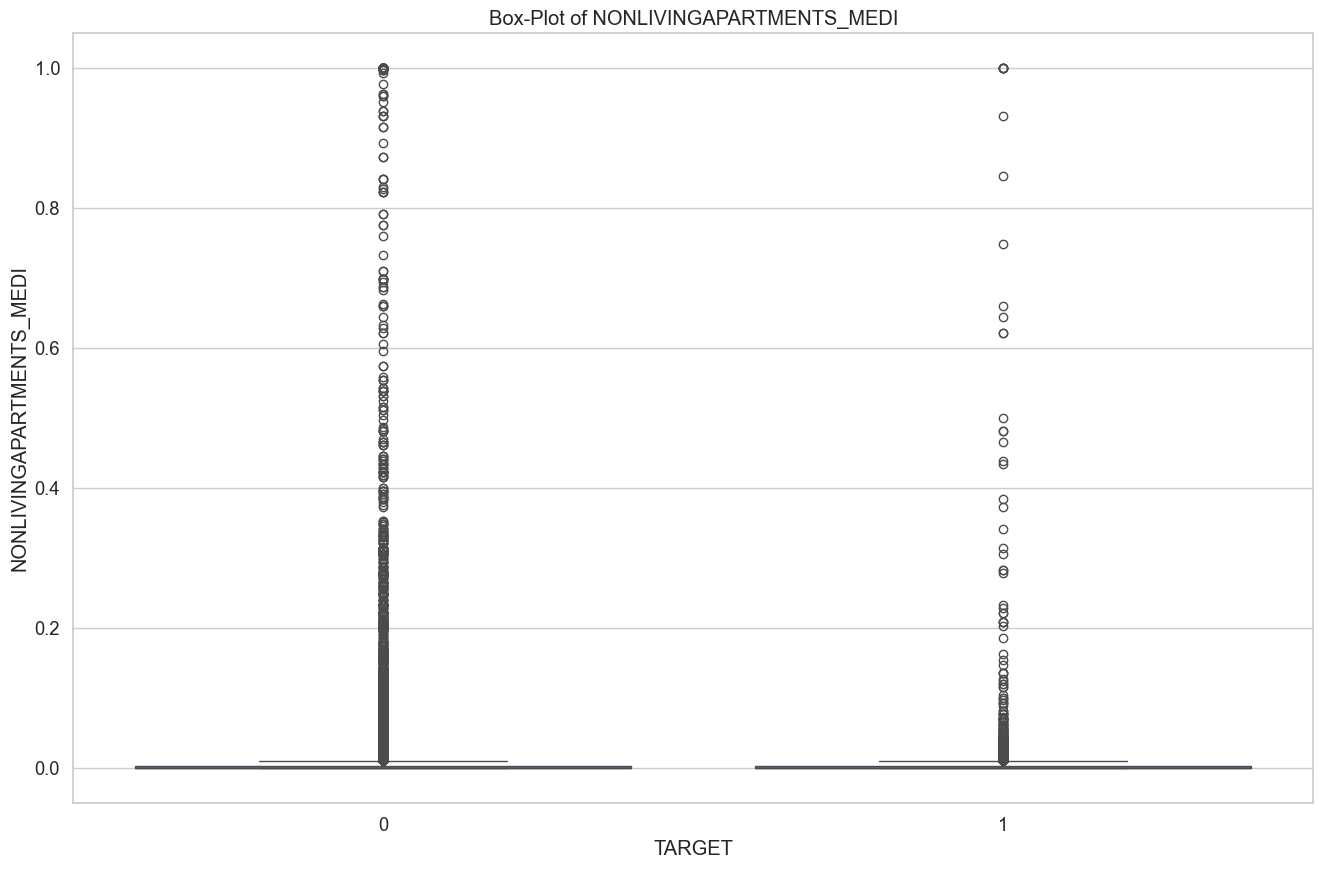

----------------------------------------------------------------------------------------------------


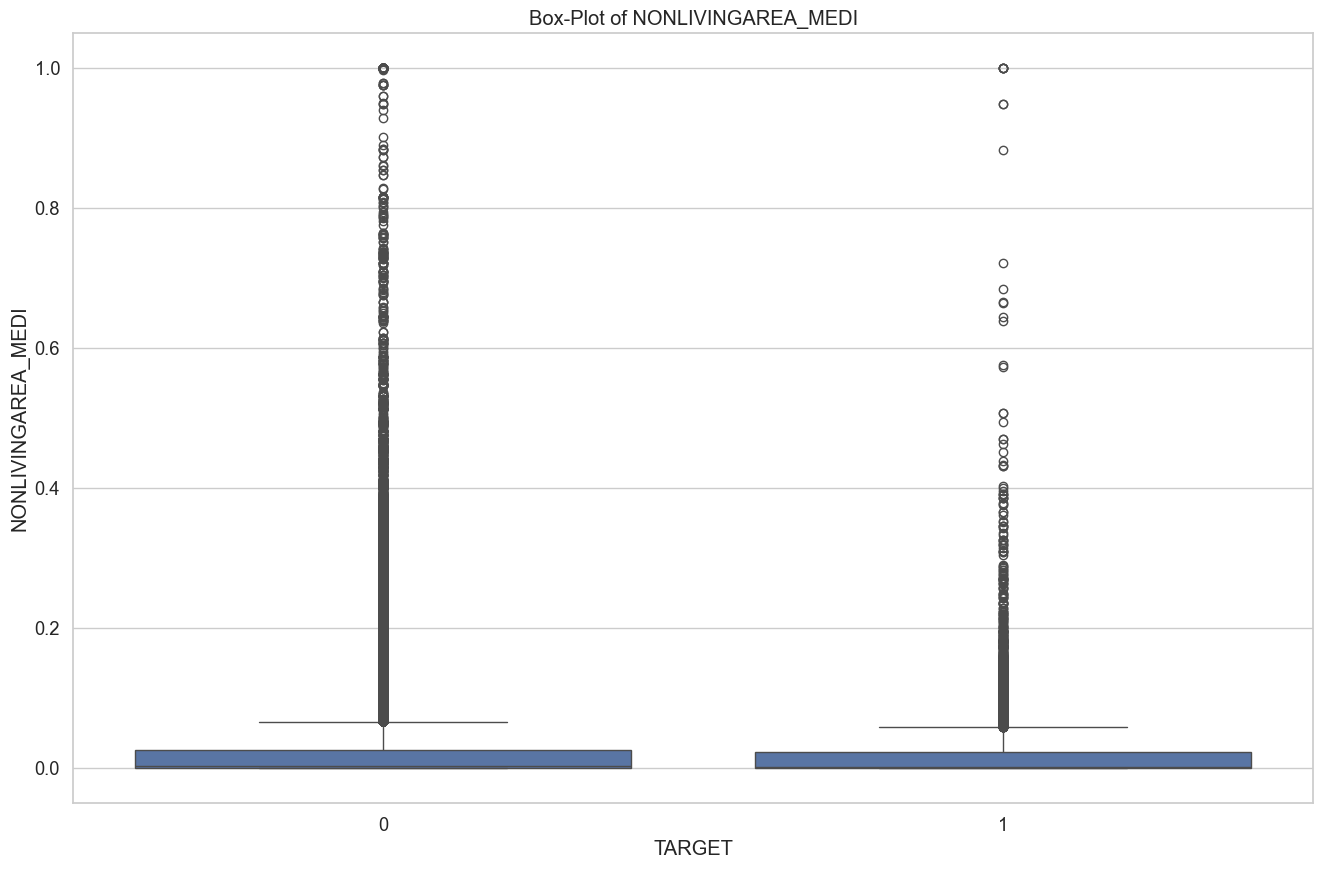

----------------------------------------------------------------------------------------------------


In [195]:
for column in columns_to_check:
    plot_continuous_variables(application_train, column_name = column, plots = ['box'], figsize = (16,10))
    print('-'*100)

#### m. Distribution of Continuous Variable 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'

In [1]:
columns_to_check =['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
a = df[df['Row'].isin(columns_to_check)]['Description']
for des in a:
    print (des)


KeyboardInterrupt



#### Chúng ta sẽ chuyển biến ngày sinh và ngày nhận việc về năm sinh và năm sau khi nhận việc để dẽ theo dõi

In [ ]:
application_train['AGE_YEARS'] = application_train['DAYS_BIRTH'] * -1 / 365
plot_continuous_variables(application_train, 'AGE_YEARS', plots = ['distplot','box'])
_ = application_train.pop('AGE_YEARS')
print('-'*100)
application_train['YEARS_EMPLOYED'] = application_train.DAYS_EMPLOYED * -1 / 365
plot_continuous_variables(application_train, 'YEARS_EMPLOYED', plots = ['distplot','box'], scale_limits = [0,70])
_ = application_train.pop('YEARS_EMPLOYED')
print('-'*100)
plot_continuous_variables(application_train, 'DAYS_REGISTRATION', plots = [ 'box'], figsize = (16,20))
print('-'*100)
plot_continuous_variables(application_train, 'DAYS_ID_PUBLISH', plots = [ 'box'], figsize = (16,20))
print('-'*100)

### Quan sát và Kết luận:

Dựa trên các biểu đồ trên, có thể rút ra những nhận xét sau:

1. Năm tuổi 'AGE_YEARS':
    Độ tuổi vỡ nợ nhiều nhất sẽ là những người 30 tuổi và trung bình là gần 40 tuổi, có vẻ nhóm người từ 30 đến 40 tuổi là nhóm thiếu ổn định về kinh tế nhất và có thể thấy trung bình những người đã qua độ tuổi 40 sẽ ít có khả năng vỡ nợ hơn.

2. Năm kể từ khi nhận việc hiện tại 'YEARS_EMPLOYED' :
     Có thể thấy người mới nhận việc sẽ có xu hướng vỡ nwoj cao hơn và họ cũng là nhóm có nhiều người vay nhất.  (có xuất hiện outliers)

3. Số ngày trước khi nộp đơn mà khách hàng thay đổi địa chỉ đăng ký của mình 'DAYS_REGISTRATION'
     Có thể thấy đăng kí càng gần ngày thì có khả năng vỡ nợ cao hơn. (có xuất hiện outliers)

4. Số ngày trước khi nộp đơn mà khách hàng thay đổi giấy tờ tùy thân được sử dụng để nộp đơn vay. 'DAYS_ID_PUBLISH'
     Có thể thấy thay đổi giấy tờ càng gần ngày càng có khả năng thuộc nhóm phá sản.